In [1]:
import requests
import io
import pandas as pd
import requests
import io
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [2]:
from pathlib import Path
import os
base_dir = r"/Users/sk3020/Downloads/data"


dfs = []
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        file_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv") 
        if os.path.exists(file_path):
            df = pd.read_csv(file_path,dtype={'CRS_DEP_TIME': str})
            df["source_folder"] = folder_name  
            dfs.append(df)
        else:
            print(f"⚠️ {file_path} not existing")
merged_df = pd.concat(dfs, ignore_index=True)
list=merged_df['ORIGIN_CITY_NAME'].unique()

In [3]:
list

array(['Allentown/Bethlehem/Easton, PA', 'Augusta, GA', 'Albany, NY',
       'Atlanta, GA', 'Austin, TX', 'Asheville, NC',
       'Scranton/Wilkes-Barre, PA', 'Hartford, CT', 'Bangor, ME',
       'Birmingham, AL', 'Nashville, TN', 'Boston, MA', 'Baton Rouge, LA',
       'Burlington, VT', 'Buffalo, NY', 'Baltimore, MD', 'Columbia, SC',
       'Akron, OH', 'Chattanooga, TN', 'Charlottesville, VA',
       'Charleston, SC', 'Cedar Rapids/Iowa City, IA', 'Cleveland, OH',
       'Charlotte, NC', 'Columbus, OH', 'Charleston/Dunbar, WV',
       'Cincinnati, OH', 'Daytona Beach, FL', 'Dallas, TX', 'Dayton, OH',
       'Washington, DC', 'Denver, CO', 'Dallas/Fort Worth, TX',
       'Des Moines, IA', 'Detroit, MI', 'Panama City, FL',
       'New Bern/Morehead/Beaufort, NC', 'Newark, NJ', 'Key West, FL',
       'Fayetteville, NC', 'Fort Lauderdale, FL', 'Flint, MI',
       'Fort Wayne, IN', 'Gainesville, FL', 'Gulfport/Biloxi, MS',
       'Grand Rapids, MI', 'Greensboro/High Point, NC', 'Greer, SC

In [4]:
merged_df

YEAR  QUARTER  MONTH  DAY_OF_MONTH                FL_DATE  \
0        2022        3      8             1   8/1/2022 12:00:00 AM   
1        2022        3      8             1   8/1/2022 12:00:00 AM   
2        2022        3      8             1   8/1/2022 12:00:00 AM   
3        2022        3      8             1   8/1/2022 12:00:00 AM   
4        2022        3      8             1   8/1/2022 12:00:00 AM   
...       ...      ...    ...           ...                    ...   
1690519  2022        1      1            31  1/31/2022 12:00:00 AM   
1690520  2022        1      1            31  1/31/2022 12:00:00 AM   
1690521  2022        1      1            31  1/31/2022 12:00:00 AM   
1690522  2022        1      1            31  1/31/2022 12:00:00 AM   
1690523  2022        1      1            31  1/31/2022 12:00:00 AM   

         ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  \
0                    10135                1013506                  30135   
1                    10135                1013506                  30135   
2                    10135                1013506                  30135   
3                    10208                1020803                  30208   
4                    10208                1020803                  30208   
...                    ...                    ...                    ...   
1690519              15624                1562404                  31504   
1690520              15624                1562404                  31504   
1690521              15624                1562404                  31504   
1690522              15919                1591904                  31834   
1690523              15919                1591904                  31834   

        ORIGIN                ORIGIN_CITY_NAME  ... DEST_CITY_NAME  \
0          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
1          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
2          ABE  Allentown/Bethlehem/Easton, PA  ...  Charlotte, NC   
3          AGS                     Augusta, GA  ...  Charlotte, NC   
4          AGS                     Augusta, GA  ...  Charlotte, NC   
...        ...                             ...  ...            ...   
1690519    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690520    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690521    VPS                  Valparaiso, FL  ...  Charlotte, NC   
1690522    XNA                Fayetteville, AR  ...  Charlotte, NC   
1690523    XNA                Fayetteville, AR  ...  Charlotte, NC   

         DEST_STATE_ABR  CRS_DEP_TIME  DEP_TIME DEP_DELAY DEP_DELAY_NEW  \
0                    NC          0600     553.0      -7.0           0.0   
1                    NC          1157    1147.0     -10.0           0.0   
2                    NC          1854    1847.0      -7.0           0.0   
3                    NC          0515     515.0       0.0           0.0   
4                    NC          1113    1105.0      -8.0           0.0   
...                 ...           ...       ...       ...           ...   
1690519              NC          0635     628.0      -7.0           0.0   
1690520              NC          1048    1037.0     -11.0           0.0   
1690521              NC          1435    1433.0      -2.0           0.0   
1690522              NC          0708     703.0      -5.0           0.0   
1690523              NC          1159    1155.0      -4.0           0.0   

        DEP_DEL15 CANCELLED  WEATHER_DELAY                       source_folder  
0             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
1             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
2             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
3             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
4             0.0       0.0            NaN  T_ONTIME_REPORTING_20251020_125807  
...           ...       ...

In [5]:
merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])
merged_df = merged_df.sort_values('FL_DATE')
merged_df

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_51734/2786502895.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])


YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
1647650  2022        1      1             1 2022-01-01              14107   
1647476  2022        1      1             1 2022-01-01              12478   
1647475  2022        1      1             1 2022-01-01              12478   
1647474  2022        1      1             1 2022-01-01              12478   
1647473  2022        1      1             1 2022-01-01              12478   
...       ...      ...    ...           ...        ...                ...   
237196   2024        4     12            31 2024-12-31              11057   
237195   2024        4     12            31 2024-12-31              11057   
237194   2024        4     12            31 2024-12-31              11057   
237202   2024        4     12            31 2024-12-31              11057   
238111   2024        4     12            31 2024-12-31              15919   

         ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
1647650                1410702                  30466    PHX   
1647476                1247805                  31703    JFK   
1647475                1247805                  31703    JFK   
1647474                1247805                  31703    JFK   
1647473                1247805                  31703    JFK   
...                        ...                    ...    ...   
237196                 1105703                  31057    CLT   
237195                 1105703                  31057    CLT   
237194                 1105703                  31057    CLT   
237202                 1105703                  31057    CLT   
238111                 1591905                  31834    XNA   

         ORIGIN_CITY_NAME  ...      DEST_CITY_NAME  DEST_STATE_ABR  \
1647650       Phoenix, AZ  ...       Charlotte, NC              NC   
1647476      New York, NY  ...  Raleigh/Durham, NC              NC   
1647475      New York, NY  ...  Raleigh/Durham, NC              NC   
1647474      New York, NY  ...  Raleigh/Durham, NC              NC   
1647473      New York, NY  ...  Raleigh/Durham, NC              NC   
...                   ...  ...                 ...             ...   
237196      Charlotte, NC  ...         Memphis, TN              TN   
237195      Charlotte, NC  ...         Memphis, TN              TN   
237194      Charlotte, NC  ...         Memphis, TN              TN   
237202      Charlotte, NC  ...           Miami, FL              FL   
238111   Fayetteville, AR  ...       Charlotte, NC              NC   

         CRS_DEP_TIME  DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 CANCELLED  \
1647650          2358       6.0       8.0           8.0       0.0       0.0   
1647476          1710    1658.0     -12.0           0.0       0.0       0.0   
1647475          1520    1517.0      -3.0           0.0       0.0       0.0   
1647474          1100    1054.0      -6.0           0.0       0.0       0.0   
1647473          0840       NaN       NaN           NaN       NaN       1.0   
...               ...       ...       ...           ...       ...       ...   
237196           1301    1254.0      -7.0           0.0       0.0       0.0   
237195           0910     910.0       0.0           0.0       0.0       0.0   
237194           0734     739.0       5.0           5.0       0.0       0.0   
237202           0710     709.0      -1.0           0.0       0.0       0.0   
238111           0854     850.0      -4.0           0.0       0.0       0.0   

         WEATHER_DELAY                       source_folder  
1647650            NaN  T_ONTIME_REPORTING_20251020_125620  
1647476            NaN  T_ONTIME_REPORTING_20251020_125620  
1647475            NaN  T_ONTIME_REPORTING_20251020_125620  
1647474            NaN  T_ONTIME_REPORTING_20251020_125620  
1647473            NaN  T_ONTIME_REPORTING_20251020_125620  
...                ...                                 ...  
237196             NaN  T_ONTIME_REPORTING_20251020_125319  
237195             0.0  T_ONTIME_REPO

In [6]:
base_dir = "/Users/sk3020/Downloads/"
w1 = pd.read_csv(base_dir+'LCD_USW00013881_2022.csv')
w2 = pd.read_csv(base_dir+'LCD_USW00013881_2023.csv')
w3= pd.read_csv(base_dir+'LCD_USW00013881_2024.csv')
w1["DATE"] = pd.to_datetime(w1["DATE"])
w2["DATE"] = pd.to_datetime(w2["DATE"])
w3["DATE"] = pd.to_datetime(w3["DATE"])

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_51734/1414118290.py:2: DtypeWarning: Columns (19,41,42,64,65,78) have mixed types. Specify dtype option on import or set low_memory=False.
  w1 = pd.read_csv(base_dir+'LCD_USW00013881_2022.csv')
/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_51734/1414118290.py:4: DtypeWarning: Columns (42,64,65,78) have mixed types. Specify dtype option on import or set low_memory=False.
  w3= pd.read_csv(base_dir+'LCD_USW00013881_2024.csv')


In [7]:
weather = pd.concat([w1,w2,w3], ignore_index=True)

In [8]:
flight=merged_df
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.strip()
valid_mask = flight['CRS_DEP_TIME'].str.fullmatch(r'\d{4}', na=False)
invalid_rows = flight[~valid_mask]
invalid_count = len(invalid_rows)
invalid_ratio = invalid_count / len(flight) * 100
print(invalid_rows)
print(invalid_count)
print(invalid_ratio)

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, FL_DATE, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, CANCELLED, WEATHER_DELAY, source_folder]
Index: []

[0 rows x 25 columns]
0
0.0


In [9]:
flight = flight[valid_mask].copy()
flight = flight.reset_index(drop=True)

In [10]:
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.zfill(4)
flight['CRS_DEP_HOUR'] = flight['CRS_DEP_TIME'].str[:2].astype(int)
flight['CRS_DEP_MIN'] = flight['CRS_DEP_TIME'].str[2:].astype(int)
flight['CRS_DEP_DATETIME'] = flight.apply(
    lambda row: row['FL_DATE'] + pd.Timedelta(hours=row['CRS_DEP_HOUR'], minutes=row['CRS_DEP_MIN']),
    axis=1
)

In [11]:
flight = flight.sort_values('CRS_DEP_DATETIME')

In [12]:
merged = pd.merge_asof(
    flight,
    weather,
    left_on="CRS_DEP_DATETIME",
    right_on="DATE",
    direction="nearest",   
    tolerance=pd.Timedelta("1H")  
)
merged

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_51734/1250268331.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta("1H")


YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
0        2022        1      1             1 2022-01-01              11292   
1        2022        1      1             1 2022-01-01              14869   
2        2022        1      1             1 2022-01-01              13495   
3        2022        1      1             1 2022-01-01              13198   
4        2022        1      1             1 2022-01-01              11618   
...       ...      ...    ...           ...        ...                ...   
1690519  2024        4     12            31 2024-12-31              14747   
1690520  2024        4     12            31 2024-12-31              14107   
1690521  2024        4     12            31 2024-12-31              12889   
1690522  2024        4     12            31 2024-12-31              14869   
1690523  2024        4     12            31 2024-12-31              12892   

         ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
0                      1129202                  30325    DEN   
1                      1486903                  34614    SLC   
2                      1349505                  33495    MSY   
3                      1319801                  33198    MCI   
4                      1161802                  31703    EWR   
...                        ...                    ...    ...   
1690519                1474703                  30559    SEA   
1690520                1410702                  30466    PHX   
1690521                1288904                  32211    LAS   
1690522                1486903                  34614    SLC   
1690523                1289208                  32575    LAX   

           ORIGIN_CITY_NAME  ... BackupDirection  BackupDistance  \
0                Denver, CO  ...              SE             1.4   
1        Salt Lake City, UT  ...              SE             1.4   
2           New Orleans, LA  ...              SE             1.4   
3           Kansas City, MO  ...              SE             1.4   
4                Newark, NJ  ...              SE             1.4   
...                     ...  ...             ...             ...   
1690519         Seattle, WA  ...              SE             1.4   
1690520         Phoenix, AZ  ...              SE             1.4   
1690521       Las Vegas, NV  ...              SE             1.4   
1690522  Salt Lake City, UT  ...              SE             1.4   
1690523     Los Angeles, CA  ...              SE             1.4   

         BackupDistanceUnit      BackupElements BackupElevation  \
0                        mi  TEMP, PRECIP, SNOW             NaN   
1                        mi  TEMP, PRECIP, SNOW             NaN   
2                        mi  TEMP, PRECIP, SNOW             NaN   
3                        mi  TEMP, PRECIP, SNOW             NaN   
4                        mi  TEMP, PRECIP, SNOW             NaN   
...                     ...                 ...             ...   
1690519                  mi  TEMP, PRECIP, SNOW             NaN   
1690520                  mi  TEMP, PRECIP, SNOW             NaN   
1690521                  mi  TEMP, PRECIP, SNOW             NaN   
1690522                  mi  TEMP, PRECIP, SNOW             NaN   
1690523                  mi  TEMP, PRECIP, SNOW             NaN   

             BackupEquipment BackupLatitude BackupLongitude  BackupName  \
0        PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
1        PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
2        PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
3        PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
4        PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
...                      ...            ...             ...         ...   
1690519  PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
1690520  PSY, SRG, SNOWBOARD            NaN             NaN     FAA CWO   
1690521  PSY, SRG,

In [13]:
merged["time_diff_min"] = (merged["CRS_DEP_DATETIME"] - merged["DATE"]).abs().dt.total_seconds() / 60

In [14]:
merged.to_csv("new_data.csv", index=False)

In [15]:
df=merged[['DEP_DELAY','CANCELLED','CRS_DEP_DATETIME','HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
'HourlyPrecipitation','HourlyPresentWeatherType','HourlyPressureChange','HourlyPressureTendency','HourlyRelativeHumidity','HourlySkyConditions',
'HourlySeaLevelPressure','HourlyVisibility','HourlyWindDirection','HourlyWindGustSpeed','HourlyWindSpeed','time_diff_min','ORIGIN_AIRPORT_ID','ORIGIN','DEST_AIRPORT_ID','DEST']]
print(df)

         DEP_DELAY  CANCELLED    CRS_DEP_DATETIME  HourlyAltimeterSetting  \
0             -4.0        0.0 2022-01-01 00:29:00                  1014.2   
1              3.0        0.0 2022-01-01 00:42:00                  1013.9   
2             -4.0        0.0 2022-01-01 05:00:00                  1011.9   
3              NaN        1.0 2022-01-01 05:00:00                  1011.9   
4              NaN        1.0 2022-01-01 05:00:00                  1011.9   
...            ...        ...                 ...                     ...   
1690519       -6.0        0.0 2024-12-31 23:59:00                     NaN   
1690520       -6.0        0.0 2024-12-31 23:59:00                     NaN   
1690521        0.0        0.0 2024-12-31 23:59:00                     NaN   
1690522       -4.0        0.0 2024-12-31 23:59:00                     NaN   
1690523       -8.0        0.0 2024-12-31 23:59:00                     NaN   

         HourlyDewPointTemperature  HourlyDryBulbTemperature  \
0          

In [16]:
# Check the unique destination airports and their counts
unique_dests = df['DEST'].unique()
num_unique_dests = len(unique_dests)

print(f"Number of unique destination airports: {num_unique_dests}")
print("\nUnique destination airports:")
print(unique_dests)

# Show the count of flights to each destination
print("\nFlight counts per destination:")
dest_counts = df['DEST'].value_counts()
print(dest_counts.head(20))  # Show top 20 destinations

# If you want to see all destinations
print(f"\nAll {num_unique_dests} destination airports:")
for i, airport in enumerate(sorted(unique_dests), 1):
    print(f"{i:3d}. {airport}")

# Additional analysis - check if there are any missing values in DEST column
missing_dests = df['DEST'].isna().sum()
print(f"\nMissing values in DEST column: {missing_dests}")

# Check the most common destinations
print("\nTop 20 most common destinations:")
top_dests = dest_counts.head(20)
for airport, count in top_dests.items():
    print(f"{airport}: {count:,} flights")

Number of unique destination airports: 153

Unique destination airports:
['CLT' 'MCO' 'MIA' 'LGA' 'SJU' 'DFW' 'ATL' 'FLL' 'DTW' 'EWR' 'MSP' 'PHL'
 'MDW' 'BNA' 'LAX' 'SFO' 'ORD' 'IAH' 'BOS' 'BWI' 'TPA' 'JFK' 'SEA' 'RDU'
 'SLC' 'PHX' 'DCA' 'IAD' 'AUS' 'DEN' 'ILM' 'LAS' 'SAN' 'MEM' 'PVD' 'BHM'
 'LEX' 'AVP' 'GNV' 'SHV' 'FWA' 'ORF' 'SRQ' 'TLH' 'ALB' 'BTR' 'BDL' 'EYW'
 'SYR' 'HSV' 'RIC' 'RSW' 'BUF' 'ROC' 'CRW' 'ABE' 'SAV' 'CAE' 'PIT' 'BZN'
 'HNL' 'CHS' 'VPS' 'GSP' 'OMA' 'MYR' 'HHH' 'SBN' 'ECP' 'IND' 'JAC' 'GSO'
 'MLB' 'DAB' 'CMH' 'MCI' 'AVL' 'BTV' 'CVG' 'STT' 'STX' 'SGF' 'MKE' 'SAT'
 'LIT' 'DAL' 'OAJ' 'MSY' 'HPN' 'OKC' 'STL' 'PBI' 'CSG' 'PNS' 'USA' 'PWM'
 'DAY' 'MDT' 'DSM' 'CLE' 'SDF' 'MHT' 'CID' 'FAY' 'MSN' 'SFB' 'EWN' 'JAN'
 'GRR' 'GPT' 'JAX' 'ERI' 'LFT' 'TUL' 'TTN' 'FNT' 'PIA' 'TYS' 'XNA' 'CHO'
 'PIE' 'CAK' 'SMF' 'PDX' 'AEX' 'FSD' 'ATW' 'BGR' 'PGD' 'HOU' 'AGS' 'TRI'
 'PHF' 'ITH' 'CHA' 'LYH' 'MOB' 'ISP' 'SWF' 'RAP' 'ONT' 'TVC' 'ACK' 'MVY'
 'PGV' 'FLO' 'SJC' 'HTS' 'ROA' 'SNA' 'MLI' 'GEG' 'E

In [17]:
!pip install cartopy

In [18]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Data preprocessing
df_clean = df[(df['CANCELLED'] == 0) & (df['DEP_DELAY'].notna())].copy()

# Calculate average delay for each route
route_delays = df_clean.groupby(['ORIGIN', 'DEST']).agg({
    'DEP_DELAY': 'mean'
}).reset_index()

# Get top 20 routes with highest delays
top_10_routes = route_delays.nlargest(10, 'DEP_DELAY')

print("Top 20 routes with highest departure delays:")
print(top_10_routes)

Top 20 routes with highest departure delays:
    ORIGIN DEST   DEP_DELAY
43     AVL  USA  240.000000
469    SDF  RDU   79.750000
365    MVY  CLT   57.470588
63     BZN  CLT   50.384615
441    RDU  PGD   49.637931
511    VPS  AVL   47.844444
316    JAC  CLT   47.661765
271    GEG  CLT   43.066667
221    CVG  AVL   43.000000
123    CLT  GEG   38.333333


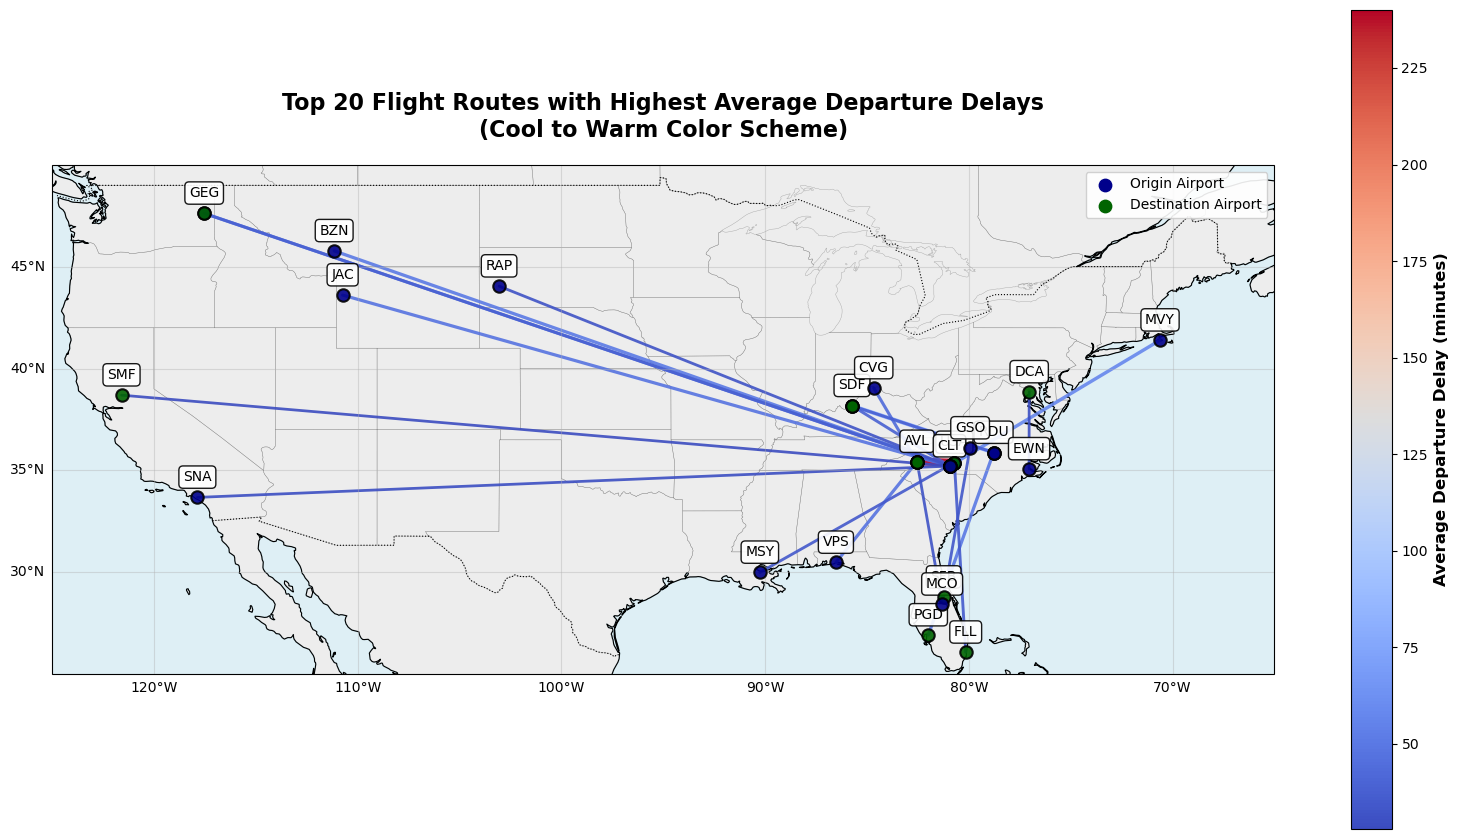

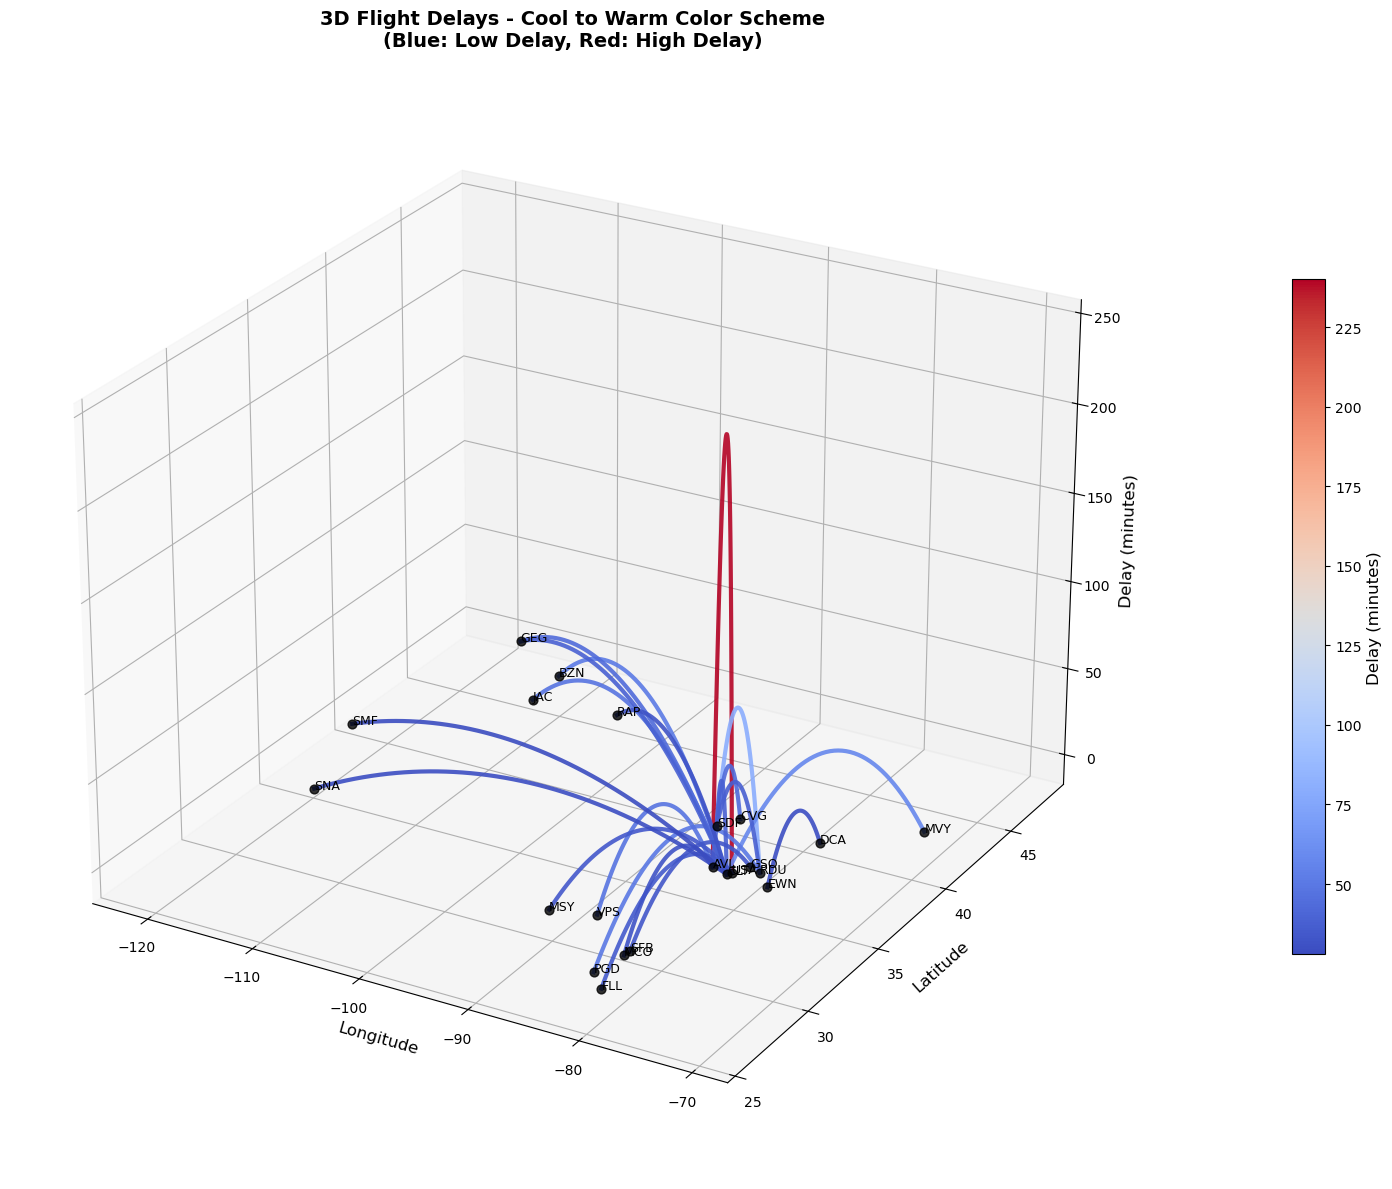

Top 20 Routes with Highest Departure Delays:
 1. AVL → USA: 240.00 minutes
 2. SDF → RDU: 79.75 minutes
 3. MVY → CLT: 57.47 minutes
 4. BZN → CLT: 50.38 minutes
 5. RDU → PGD: 49.64 minutes
 6. VPS → AVL: 47.84 minutes
 7. JAC → CLT: 47.66 minutes
 8. GEG → CLT: 43.07 minutes
 9. CVG → AVL: 43.00 minutes
10. CLT → GEG: 38.33 minutes
11. CLT → SDF: 38.25 minutes
12. RDU → SDF: 37.26 minutes
13. USA → FLL: 35.19 minutes
14. MSY → USA: 34.46 minutes
15. GSO → SFB: 33.21 minutes
16. RAP → CLT: 31.87 minutes
17. MCO → AVL: 31.85 minutes
18. EWN → DCA: 29.55 minutes
19. SNA → CLT: 29.04 minutes
20. CLT → SMF: 27.99 minutes

Statistics:
Route with highest delay: AVL → USA: 240.0 minutes
Route with lowest delay (top 20): CLT → SMF: 27.99 minutes
Number of unique airports in top routes: 22


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.mplot3d import Axes3D

# Create the top routes dataframe
top_routes_data = {
    'ORIGIN': ['AVL', 'SDF', 'MVY', 'BZN', 'RDU', 'VPS', 'JAC', 'GEG', 'CVG', 'CLT', 
               'CLT', 'RDU', 'USA', 'MSY', 'GSO', 'RAP', 'MCO', 'EWN', 'SNA', 'CLT'],
    'DEST': ['USA', 'RDU', 'CLT', 'CLT', 'PGD', 'AVL', 'CLT', 'CLT', 'AVL', 'GEG', 
             'SDF', 'SDF', 'FLL', 'USA', 'SFB', 'CLT', 'AVL', 'DCA', 'CLT', 'SMF'],
    'DEP_DELAY': [240.0, 79.75, 57.47, 50.38, 49.64, 47.84, 47.66, 43.07, 43.0, 38.33,
                  38.25, 37.26, 35.19, 34.46, 33.21, 31.87, 31.85, 29.55, 29.04, 27.99]
}

top_routes = pd.DataFrame(top_routes_data)

# Airport coordinates
airport_coords = {
    'AVL': (35.4362, -82.5418),   # Asheville Regional Airport
    'USA': (35.3878, -80.7091),   # Concord Regional Airport
    'SDF': (38.1744, -85.7364),   # Louisville International Airport
    'RDU': (35.8776, -78.7875),   # Raleigh-Durham International Airport
    'MVY': (41.3931, -70.6144),   # Martha's Vineyard Airport
    'CLT': (35.2144, -80.9473),   # Charlotte Douglas International Airport
    'BZN': (45.7775, -111.1525),  # Bozeman Yellowstone International Airport
    'PGD': (26.9197, -81.9906),   # Punta Gorda Airport
    'VPS': (30.4832, -86.5254),   # Destin-Fort Walton Beach Airport
    'JAC': (43.6073, -110.7377),  # Jackson Hole Airport
    'GEG': (47.6199, -117.5338),  # Spokane International Airport
    'CVG': (39.0488, -84.6678),   # Cincinnati/Northern Kentucky International Airport
    'FLL': (26.0726, -80.1528),   # Fort Lauderdale-Hollywood International Airport
    'MSY': (29.9934, -90.2580),   # Louis Armstrong New Orleans International Airport
    'GSO': (36.0978, -79.9373),   # Piedmont Triad International Airport
    'SFB': (28.7776, -81.2375),   # Orlando Sanford International Airport
    'RAP': (44.0453, -103.0574),  # Rapid City Regional Airport
    'MCO': (28.4294, -81.3090),   # Orlando International Airport
    'EWN': (35.0730, -77.0429),   # Coastal Carolina Regional Airport
    'DCA': (38.8521, -77.0377),   # Ronald Reagan Washington National Airport
    'SNA': (33.6757, -117.8682),  # John Wayne Airport
    'SMF': (38.6954, -121.5908),  # Sacramento International Airport
}

# Create 2D map with Cool to Warm color scheme
plt.figure(figsize=(16, 12))

# Use PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  # Continental US extent

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.3, alpha=0.3)
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.4)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)

# Plot routes with Cool to Warm color scheme
delays = top_routes['DEP_DELAY'].values
norm = plt.Normalize(vmin=delays.min(), vmax=delays.max())
cmap = plt.cm.coolwarm  # Using coolwarm colormap

# Create a set to track which airports we've already labeled
labeled_airports = set()

for _, route in top_routes.iterrows():
    origin = route['ORIGIN']
    dest = route['DEST']
    avg_delay = route['DEP_DELAY']
    
    if origin in airport_coords and dest in airport_coords:
        # Get airport coordinates
        orig_lat, orig_lon = airport_coords[origin]
        dest_lat, dest_lon = airport_coords[dest]
        
        # Calculate line width based on delay
        linewidth = 1.5 + (avg_delay / delays.max()) * 4
        
        # Get color from coolwarm colormap
        color = cmap(norm(avg_delay))
        
        # Plot route line
        plt.plot([orig_lon, dest_lon], [orig_lat, dest_lat], 
                color=color, linewidth=linewidth, alpha=0.9, 
                transform=ccrs.PlateCarree(), solid_capstyle='round')
        
        # Mark origin airport
        plt.scatter(orig_lon, orig_lat, color='darkblue', s=80, alpha=0.9,
                   transform=ccrs.PlateCarree(), zorder=5, 
                   edgecolors='black', linewidth=1.5)
        
        # Mark destination airport
        plt.scatter(dest_lon, dest_lat, color='darkgreen', s=80, alpha=0.9,
                   transform=ccrs.PlateCarree(), zorder=5, 
                   edgecolors='black', linewidth=1.5)
        
        # Add airport codes as labels
        if origin not in labeled_airports:
            plt.text(orig_lon, orig_lat + 0.8, origin, 
                    fontsize=10, ha='center', transform=ccrs.PlateCarree(),
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                             edgecolor='black', alpha=0.9))
            labeled_airports.add(origin)
            
        if dest not in labeled_airports:
            plt.text(dest_lon, dest_lat + 0.8, dest,
                    fontsize=10, ha='center', transform=ccrs.PlateCarree(),
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                             edgecolor='black', alpha=0.9))
            labeled_airports.add(dest)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('Average Departure Delay (minutes)', fontsize=12, fontweight='bold')

# Add grid and labels
gl = ax.gridlines(draw_labels=True, alpha=0.4)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Top 20 Flight Routes with Highest Average Departure Delays\n(Cool to Warm Color Scheme)', 
          fontsize=16, fontweight='bold', pad=20)

# Add legend
origin_scatter = plt.scatter([], [], color='darkblue', s=80, label='Origin Airport')
dest_scatter = plt.scatter([], [], color='darkgreen', s=80, label='Destination Airport')
plt.legend(loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Create 3D visualization with Cool to Warm color scheme
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot airports
for airport, coords in airport_coords.items():
    lat, lon = coords
    ax.scatter(lon, lat, 0, color='black', s=40, alpha=0.8)
    ax.text(lon, lat, 0, airport, fontsize=9, zorder=10)

# Plot routes with height proportional to delay
for _, route in top_routes.iterrows():
    origin = route['ORIGIN']
    dest = route['DEST']
    avg_delay = route['DEP_DELAY']
    
    if origin in airport_coords and dest in airport_coords:
        orig_lat, orig_lon = airport_coords[origin]
        dest_lat, dest_lon = airport_coords[dest]
        
        # Create a curve in 3D space
        t = np.linspace(0, 1, 50)
        
        # Linear interpolation for the curve
        curve_lon = orig_lon + t * (dest_lon - orig_lon)
        curve_lat = orig_lat + t * (dest_lat - orig_lat)
        
        # Create an arc for the z-values (height)
        curve_z = 4 * avg_delay * t * (1 - t)
        
        # Color based on delay using coolwarm colormap
        color = cmap(norm(avg_delay))
        
        # Plot the 3D curve
        ax.plot(curve_lon, curve_lat, curve_z, 
                color=color, linewidth=3, alpha=0.9)

# Set labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_zlabel('Delay (minutes)', fontsize=12)
ax.set_title('3D Flight Delays - Cool to Warm Color Scheme\n(Blue: Low Delay, Red: High Delay)', 
             fontsize=14, fontweight='bold')

# Set the view angle for better 3D perspective
ax.view_init(elev=25, azim=-60)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Delay (minutes)', fontsize=12)

plt.tight_layout()
plt.show()

# Display statistics
print("Top 20 Routes with Highest Departure Delays:")
for i, (_, route) in enumerate(top_routes.iterrows(), 1):
    print(f"{i:2d}. {route['ORIGIN']} → {route['DEST']}: {route['DEP_DELAY']:.2f} minutes")

print(f"\nStatistics:")
print(f"Route with highest delay: {top_routes.iloc[0]['ORIGIN']} → {top_routes.iloc[0]['DEST']}: {top_routes.iloc[0]['DEP_DELAY']} minutes")
print(f"Route with lowest delay (top 20): {top_routes.iloc[-1]['ORIGIN']} → {top_routes.iloc[-1]['DEST']}: {top_routes.iloc[-1]['DEP_DELAY']:.2f} minutes")
print(f"Number of unique airports in top routes: {len(labeled_airports)}")

In [20]:
import pandas as pd
import numpy as np

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_processed = df.copy()

# Convert CRS_DEP_DATETIME to datetime format and extract season
df_processed['CRS_DEP_DATETIME'] = pd.to_datetime(df_processed['CRS_DEP_DATETIME'])
df_processed['month'] = df_processed['CRS_DEP_DATETIME'].dt.month

# Define seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

df_processed['season'] = df_processed['month'].apply(get_season)

# Data preprocessing - remove cancelled flights and missing delay data
df_clean = df_processed[(df_processed['CANCELLED'] == 0) & (df_processed['DEP_DELAY'].notna())].copy()

print("Data Statistics:")
print(f"Total flights: {len(df_processed)}")
print(f"Valid flights (not cancelled and with delay data): {len(df_clean)}")
print(f"Season distribution:")
print(df_clean['season'].value_counts())

# Calculate top 20 routes for each season
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
season_top_routes = {}

for season in seasons:
    season_data = df_clean[df_clean['season'] == season]
    
    # Calculate average delay for each route - fix column name conflict
    route_delays = season_data.groupby(['ORIGIN', 'DEST']).agg({
        'DEP_DELAY': ['mean', 'count']
    }).reset_index()
    
    # Flatten multi-level column names
    route_delays.columns = ['ORIGIN', 'DEST', 'avg_delay', 'flight_count']
    
    # Get top 20 routes with highest delays, ensuring sufficient flight count (at least 5)
    top_routes = route_delays[route_delays['flight_count'] >= 5].nlargest(20, 'avg_delay')
    
    season_top_routes[season] = top_routes
    
    print(f"\n{season} Season - Top 20 Routes with Highest Delays:")
    print(f"Total routes: {len(route_delays)}")
    print(f"Routes meeting criteria: {len(top_routes)}")
    
    for i, (_, route) in enumerate(top_routes.iterrows(), 1):
        print(f"{i:2d}. {route['ORIGIN']} → {route['DEST']}: {route['avg_delay']:.2f} min (flights: {route['flight_count']})")

# Display summary for all seasons
print("\n" + "="*50)
print("All Seasons Summary:")
for season in seasons:
    top_routes = season_top_routes[season]
    if len(top_routes) > 0:
        max_delay = top_routes['avg_delay'].max()
        min_delay = top_routes['avg_delay'].min()
        print(f"{season}: Max delay {max_delay:.2f} min, Min delay {min_delay:.2f} min, Routes {len(top_routes)}")
    else:
        print(f"{season}: No routes meeting criteria")

# Check all airports that appear to ensure we have coordinates
all_airports = set()
for season in seasons:
    top_routes = season_top_routes[season]
    all_airports.update(top_routes['ORIGIN'].unique())
    all_airports.update(top_routes['DEST'].unique())

print(f"\nUnique airports across all seasons: {len(all_airports)}")
print("Airport list:", sorted(all_airports))

Data Statistics:
Total flights: 1690524
Valid flights (not cancelled and with delay data): 1660384
Season distribution:
season
Summer    435879
Autumn    427093
Spring    414667
Winter    382745
Name: count, dtype: int64

Spring Season - Top 20 Routes with Highest Delays:
Total routes: 478
Routes meeting criteria: 20
 1. JAC → CLT: 241.00 min (flights: 5)
 2. BZN → CLT: 218.40 min (flights: 5)
 3. SNA → CLT: 73.37 min (flights: 91)
 4. USA → FLL: 46.95 min (flights: 160)
 5. RDU → PGD: 41.56 min (flights: 16)
 6. MSY → USA: 36.36 min (flights: 22)
 7. PGD → AVL: 35.71 min (flights: 153)
 8. AVL → LAS: 35.38 min (flights: 77)
 9. FLL → AVL: 32.55 min (flights: 473)
10. ONT → CLT: 32.03 min (flights: 154)
11. PBI → AVL: 31.15 min (flights: 75)
12. EYW → CLT: 31.02 min (flights: 975)
13. CLT → SMF: 30.71 min (flights: 199)
14. AVL → PBI: 29.00 min (flights: 78)
15. CLT → PDX: 28.59 min (flights: 230)
16. FLL → RDU: 28.16 min (flights: 989)
17. RDU → HOU: 28.12 min (flights: 95)
18. CLT → 

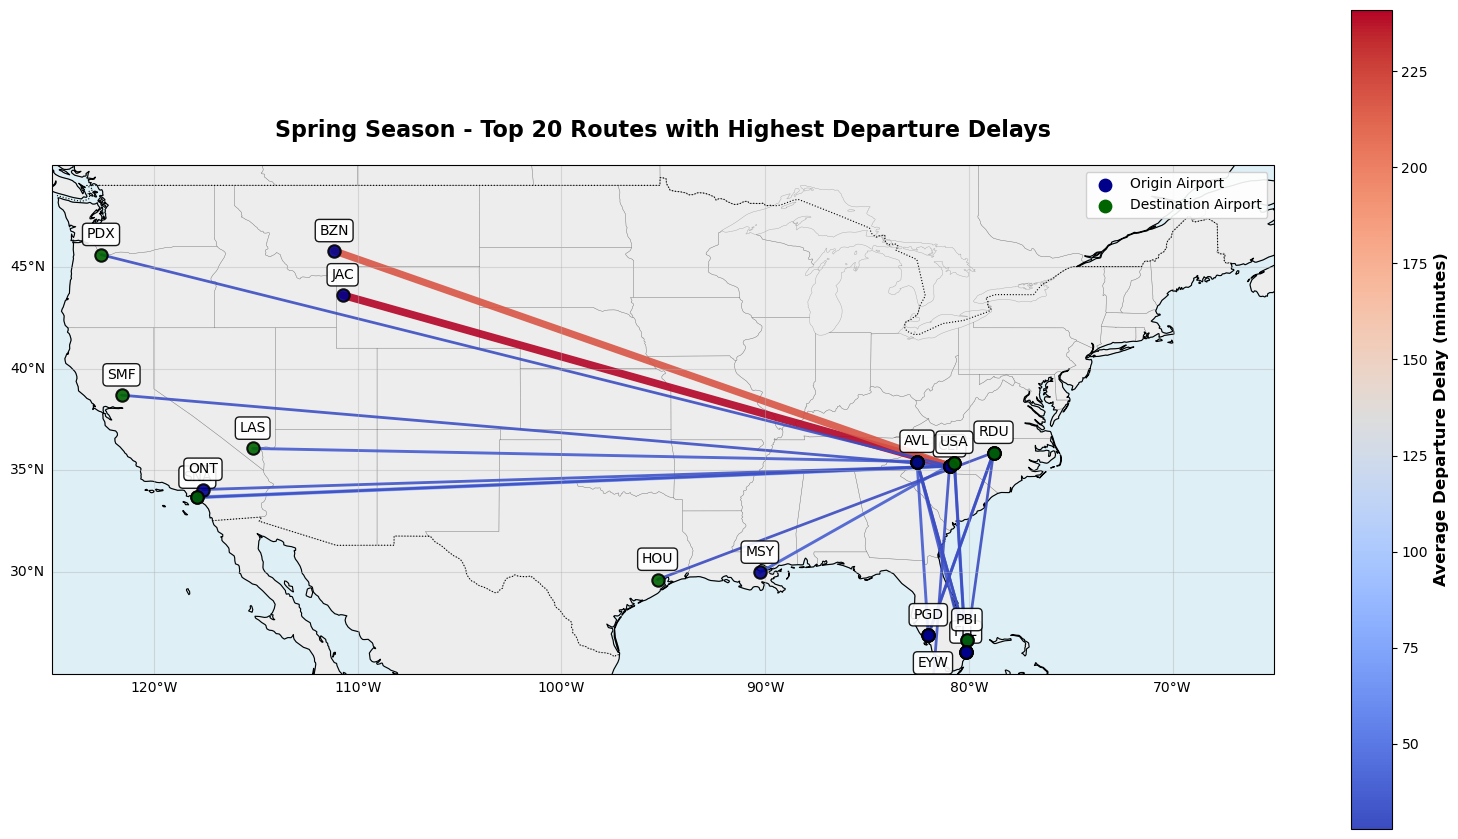

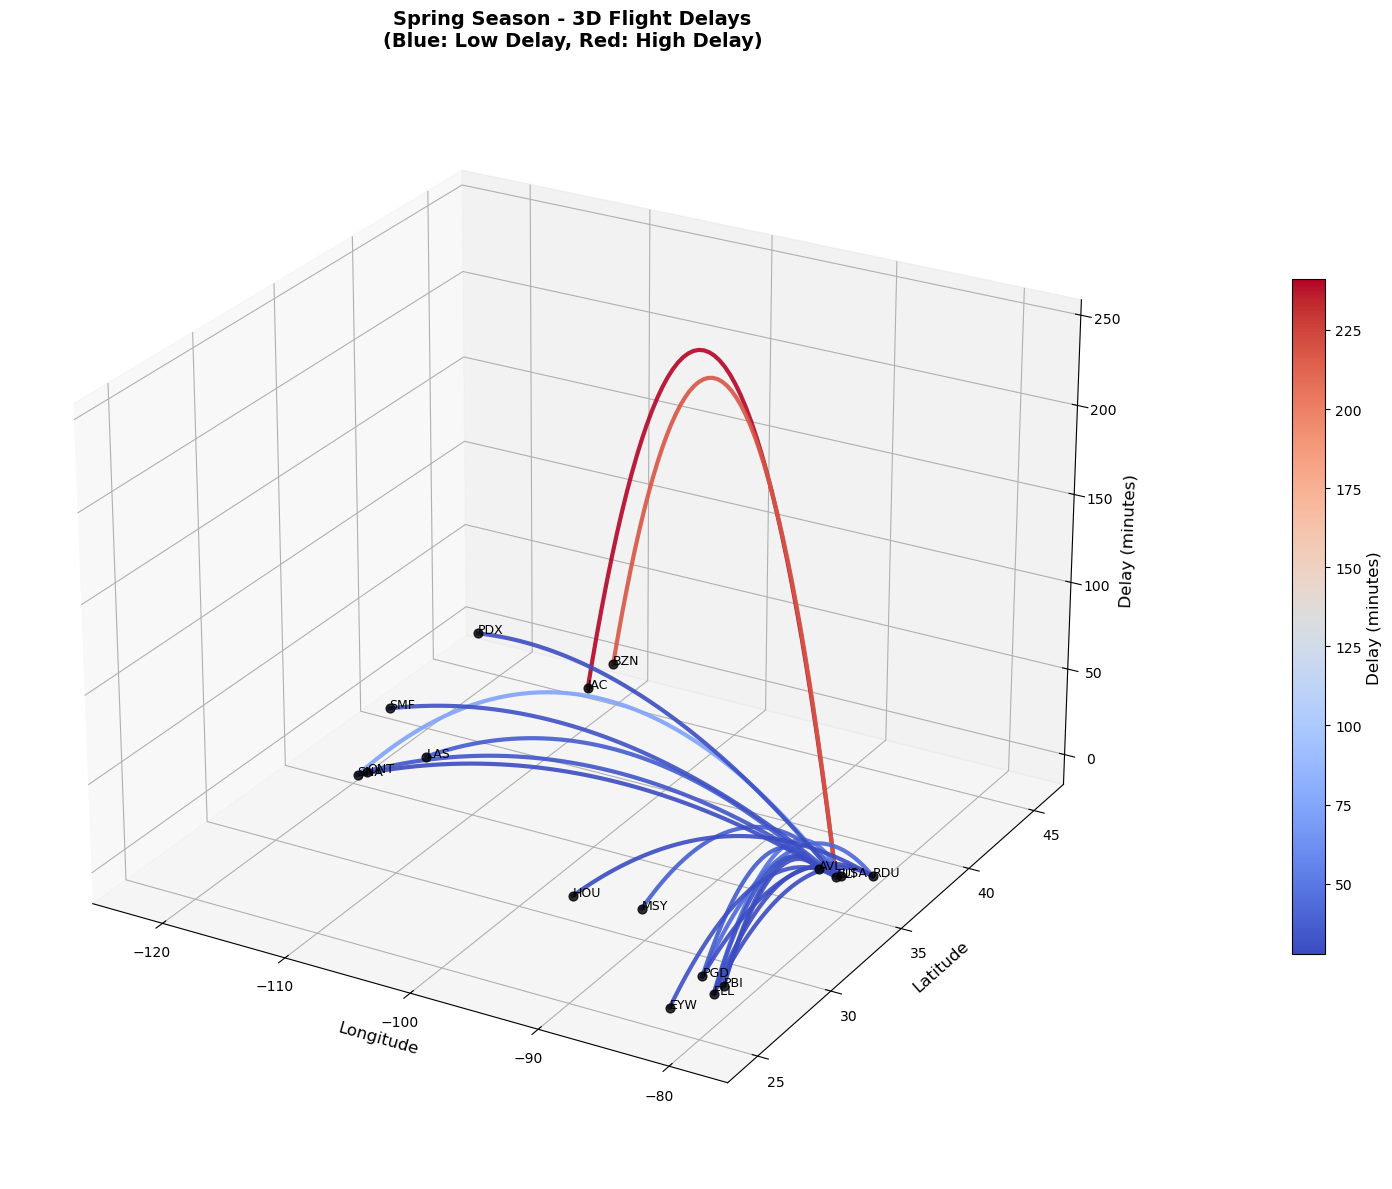

Spring Season Statistics:
Highest delay: 241.00 minutes
Lowest delay: 27.75 minutes
Average delay: 54.18 minutes
Number of unique airports: 17
--------------------------------------------------


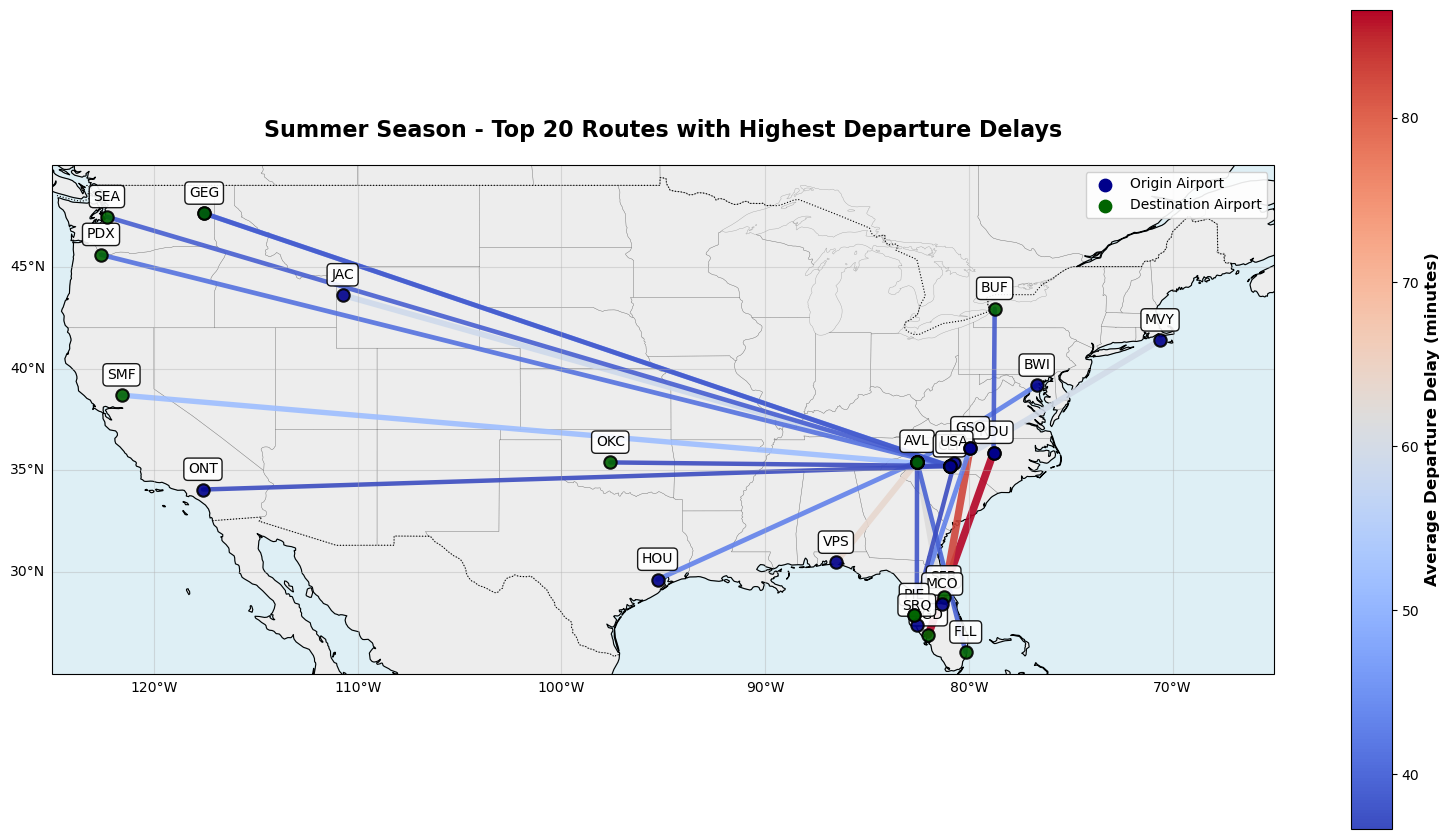

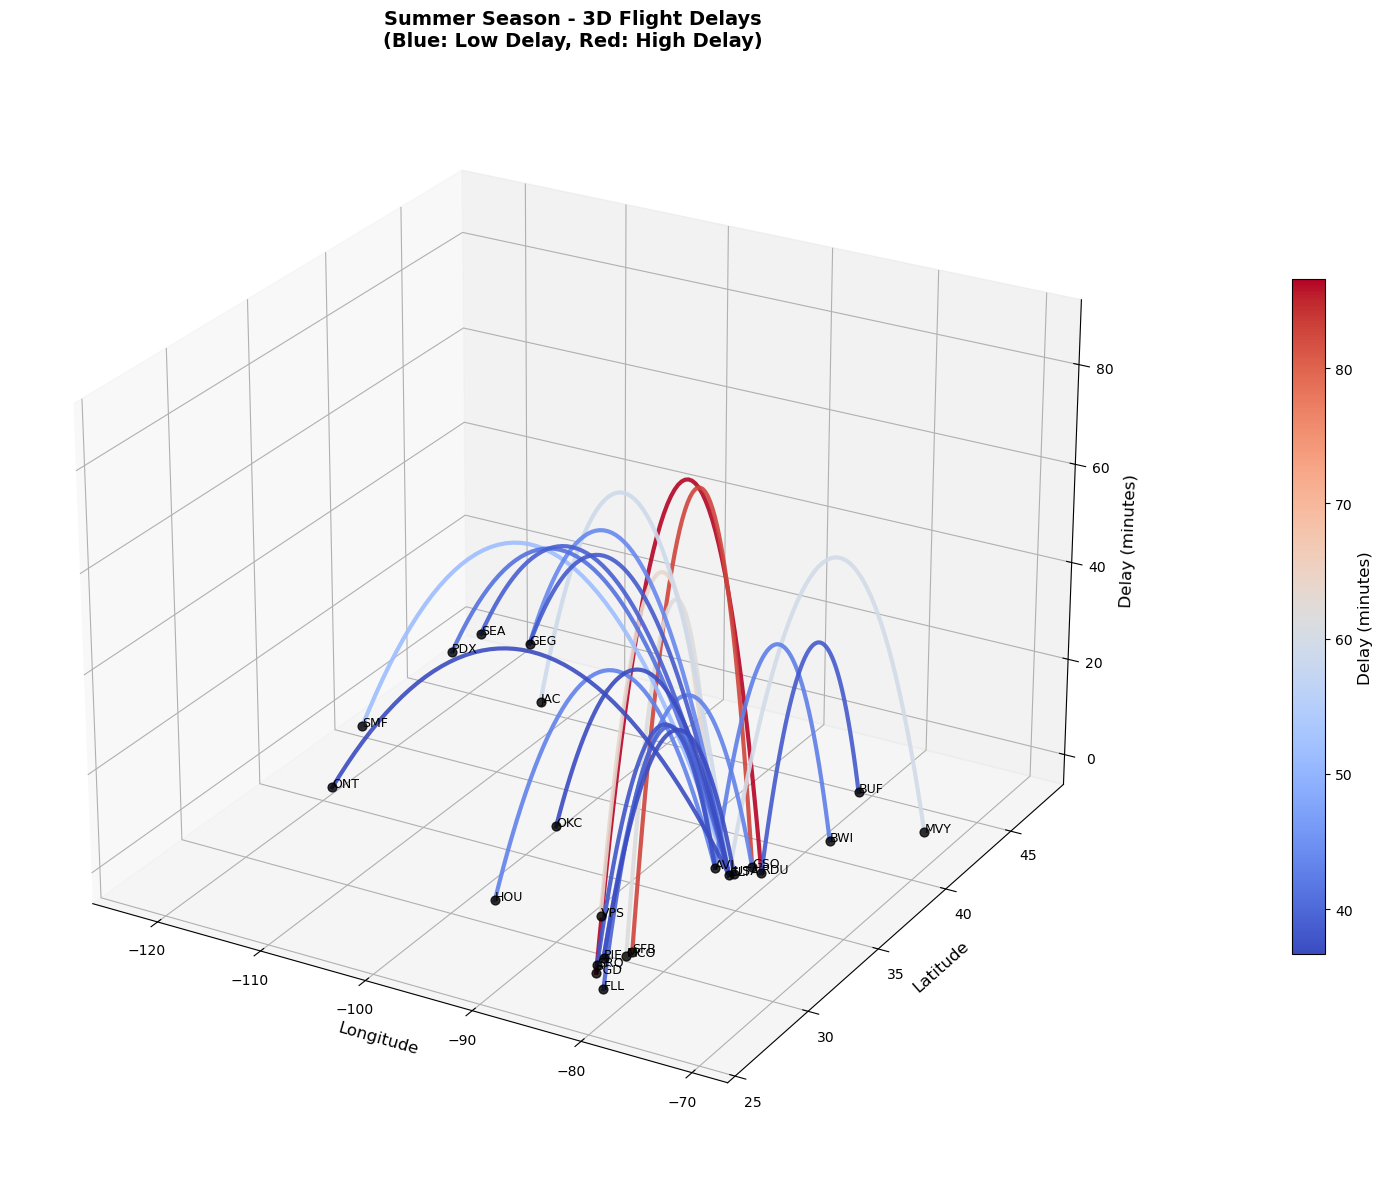

Summer Season Statistics:
Highest delay: 86.58 minutes
Lowest delay: 36.67 minutes
Average delay: 49.05 minutes
Number of unique airports: 23
--------------------------------------------------


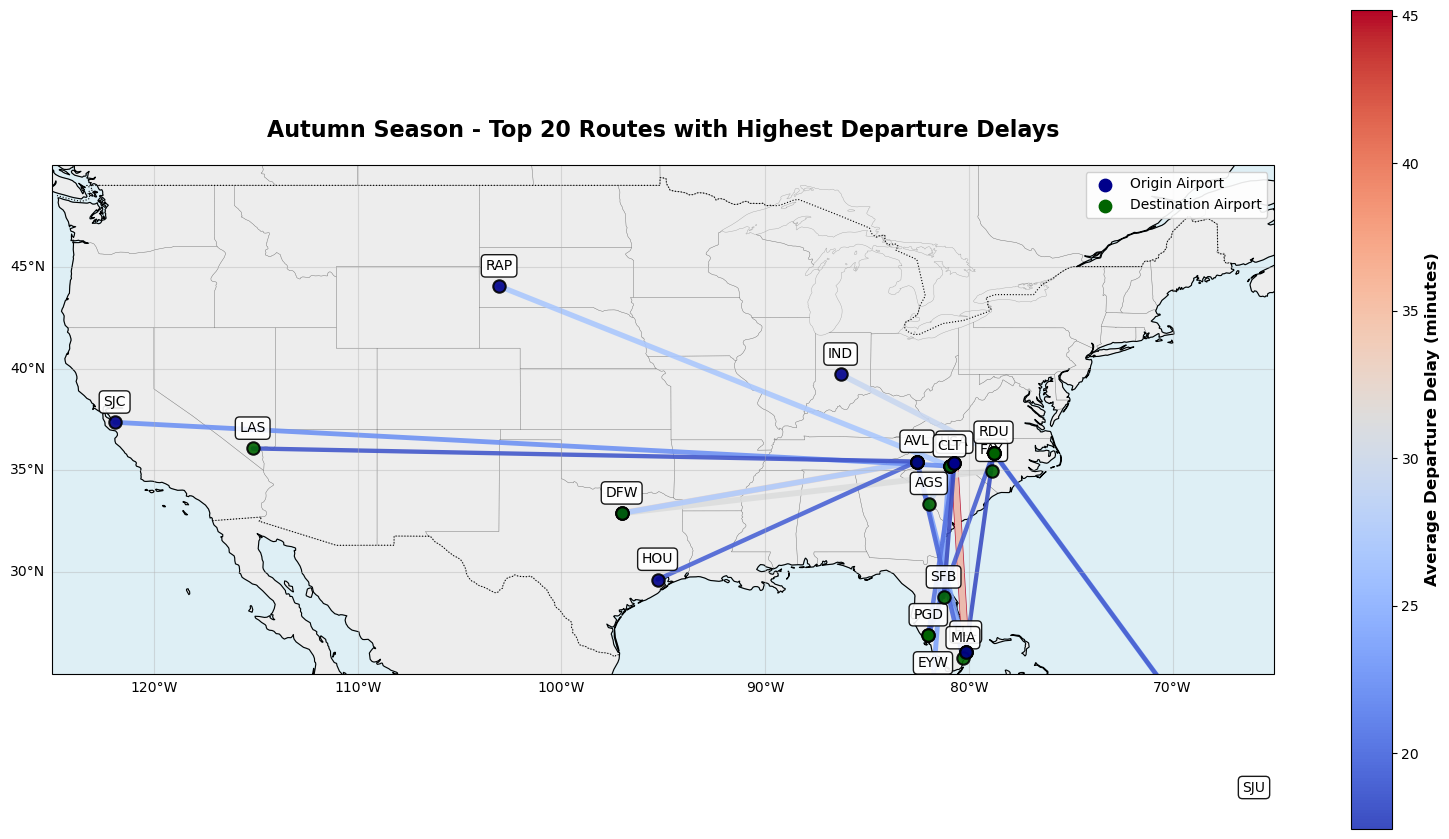

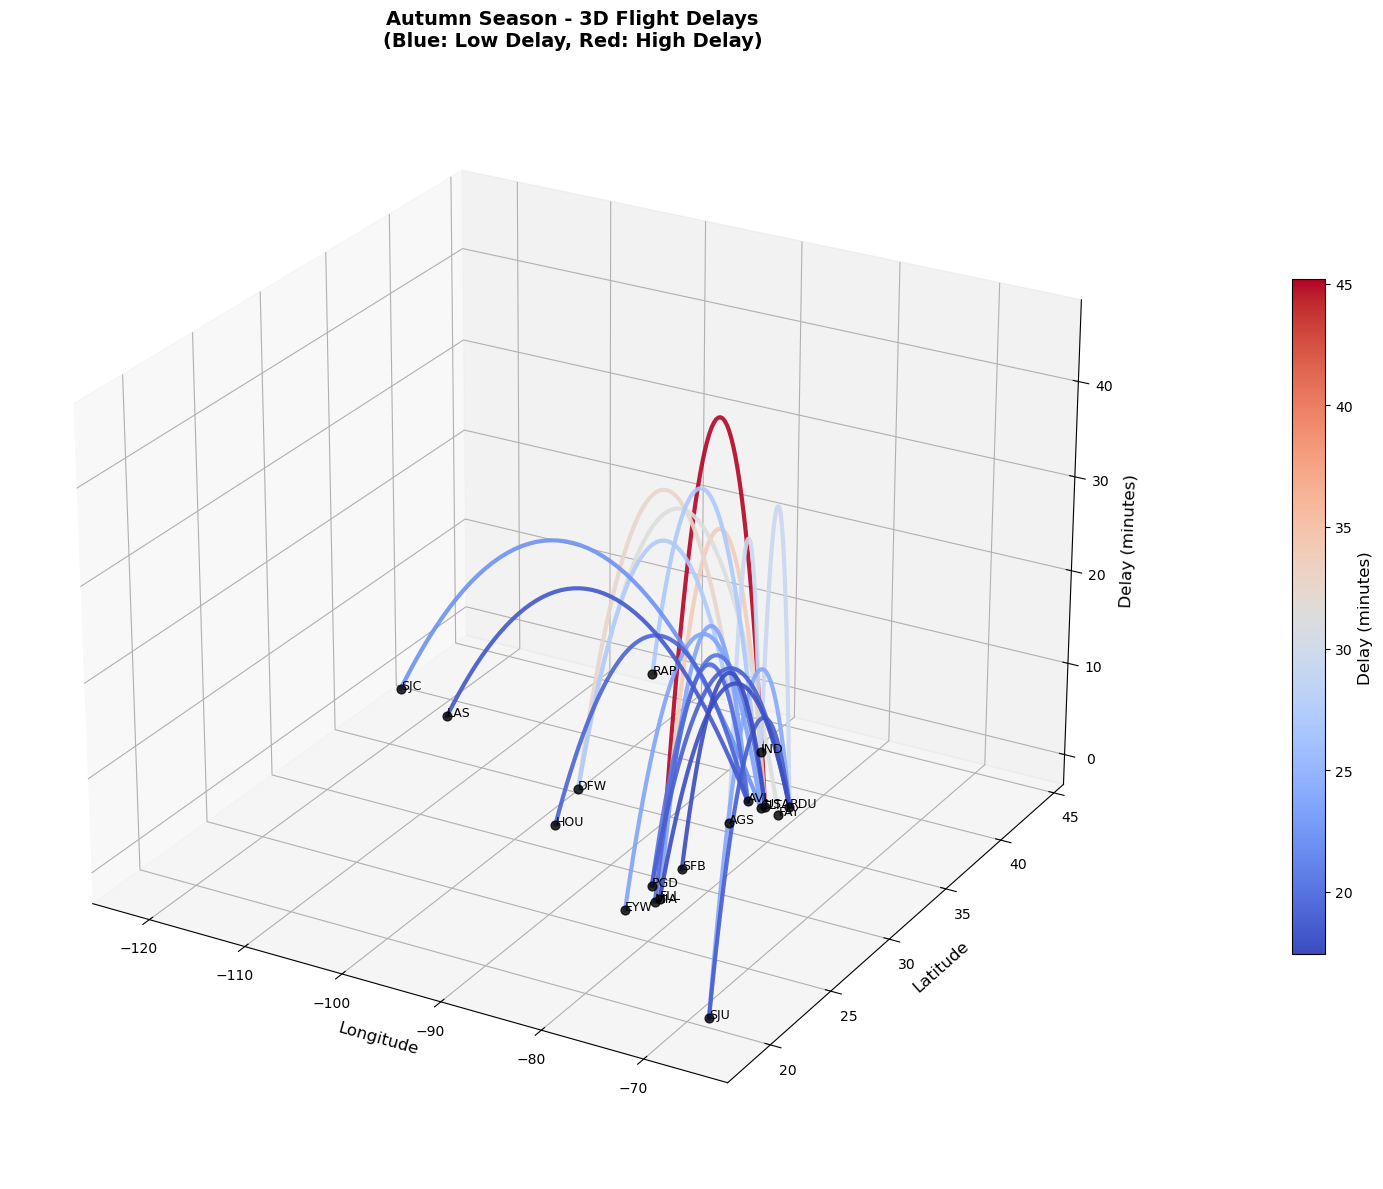

Autumn Season Statistics:
Highest delay: 45.19 minutes
Lowest delay: 17.43 minutes
Average delay: 24.88 minutes
Number of unique airports: 18
--------------------------------------------------


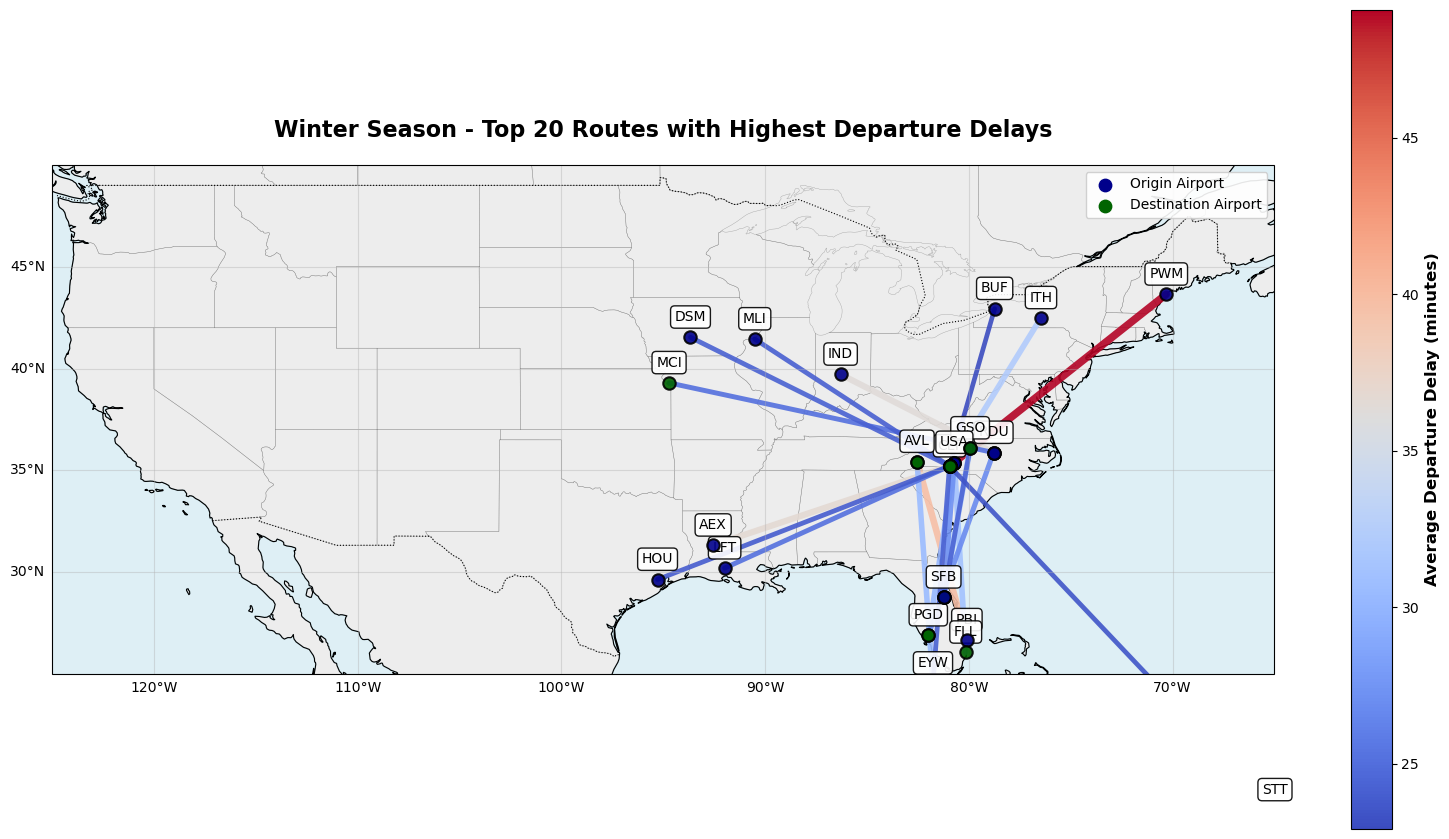

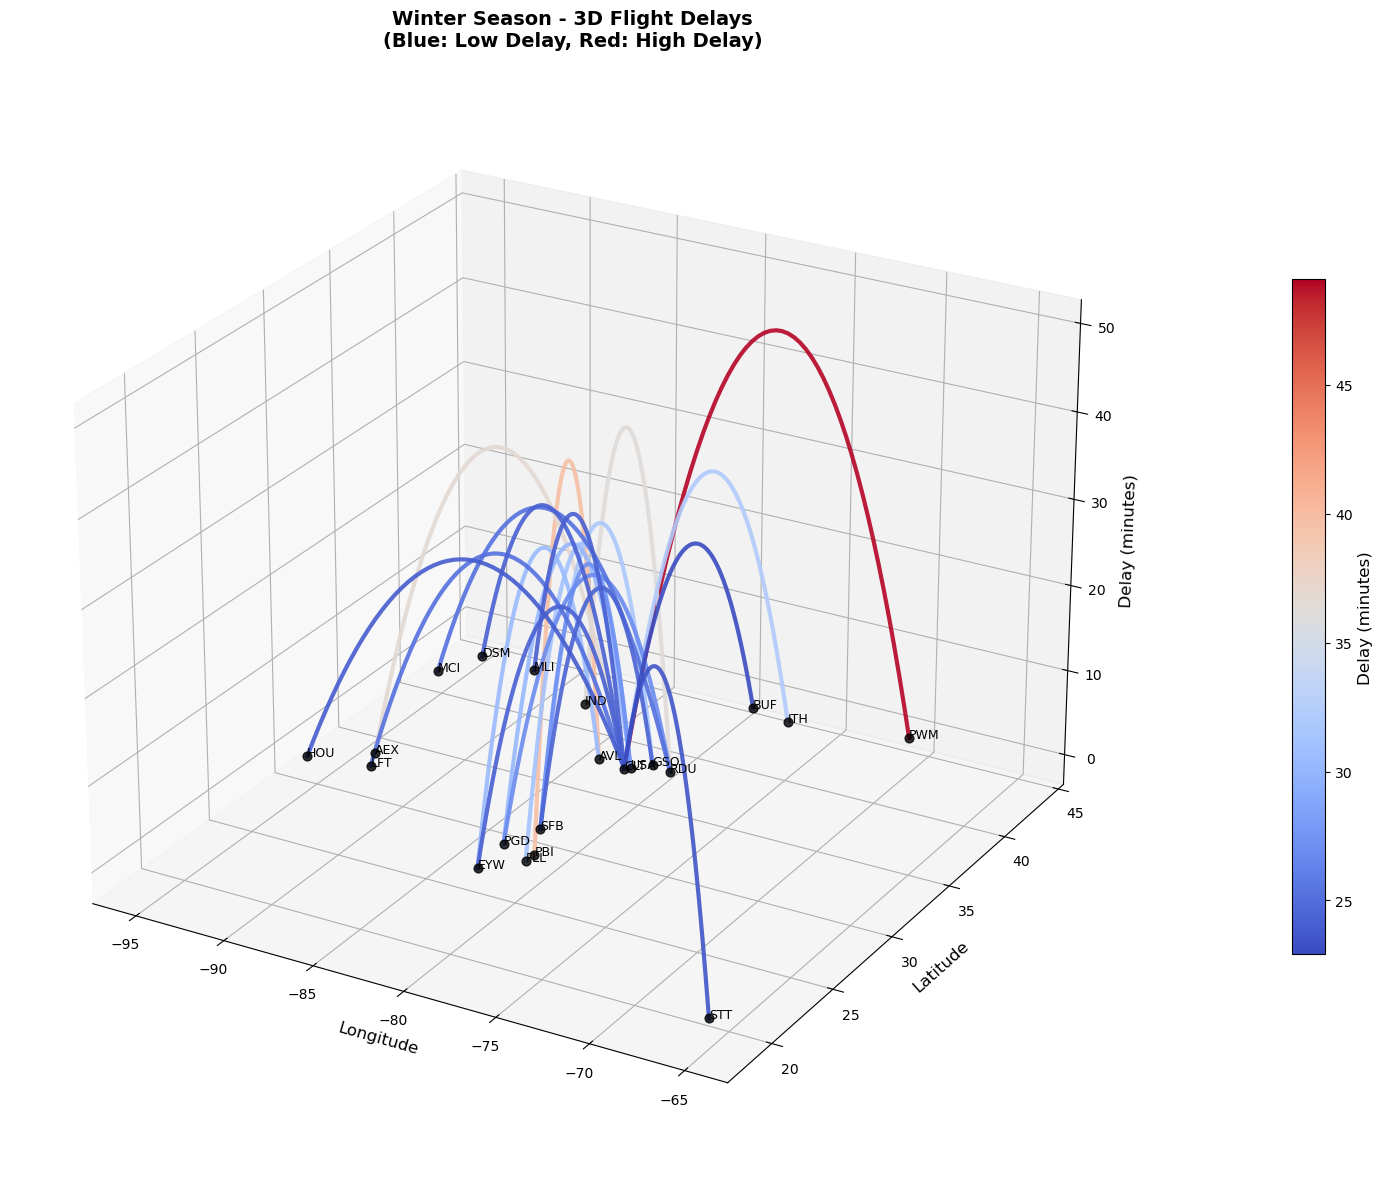

Winter Season Statistics:
Highest delay: 49.09 minutes
Lowest delay: 22.92 minutes
Average delay: 29.44 minutes
Number of unique airports: 21
--------------------------------------------------

Overall Comparison Across Seasons:
Spring: Max 241.00 min, Min 27.75 min, Avg 54.18 min
Summer: Max 86.58 min, Min 36.67 min, Avg 49.05 min
Autumn: Max 45.19 min, Min 17.43 min, Avg 24.88 min
Winter: Max 49.09 min, Min 22.92 min, Avg 29.44 min


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.mplot3d import Axes3D

# Airport coordinates for all 45 airports
airport_coords = {
    'AEX': (31.3274, -92.5497),   # Alexandria International Airport
    'AGS': (33.3699, -81.9645),   # Augusta Regional Airport
    'AVL': (35.4362, -82.5418),   # Asheville Regional Airport
    'BUF': (42.9405, -78.7322),   # Buffalo Niagara International Airport
    'BWI': (39.1754, -76.6683),   # Baltimore/Washington International Airport
    'BZN': (45.7775, -111.1525),  # Bozeman Yellowstone International Airport
    'CLT': (35.2144, -80.9473),   # Charlotte Douglas International Airport
    'DFW': (32.8998, -97.0403),   # Dallas/Fort Worth International Airport
    'DSM': (41.5340, -93.6631),   # Des Moines International Airport
    'EYW': (24.5561, -81.7596),   # Key West International Airport
    'FAY': (34.9912, -78.8803),   # Fayetteville Regional Airport
    'FLL': (26.0726, -80.1528),   # Fort Lauderdale-Hollywood International Airport
    'GEG': (47.6199, -117.5338),  # Spokane International Airport
    'GSO': (36.0978, -79.9373),   # Piedmont Triad International Airport
    'HOU': (29.6454, -95.2789),   # William P. Hobby Airport
    'IND': (39.7173, -86.2944),   # Indianapolis International Airport
    'ITH': (42.4910, -76.4584),   # Ithaca Tompkins Regional Airport
    'JAC': (43.6073, -110.7377),  # Jackson Hole Airport
    'LAS': (36.0801, -115.1523),  # Las Vegas McCarran International Airport
    'LFT': (30.2053, -91.9876),   # Lafayette Regional Airport
    'MCI': (39.2976, -94.7139),   # Kansas City International Airport
    'MCO': (28.4294, -81.3090),   # Orlando International Airport
    'MIA': (25.7933, -80.2906),   # Miami International Airport
    'MLI': (41.4485, -90.5075),   # Quad City International Airport
    'MSY': (29.9934, -90.2580),   # Louis Armstrong New Orleans International Airport
    'MVY': (41.3931, -70.6144),   # Martha's Vineyard Airport
    'OKC': (35.3931, -97.6007),   # Will Rogers World Airport
    'ONT': (34.0621, -117.5940),  # Ontario International Airport
    'PBI': (26.6832, -80.0956),   # Palm Beach International Airport
    'PDX': (45.5887, -122.5975),  # Portland International Airport
    'PGD': (26.9197, -81.9906),   # Punta Gorda Airport
    'PIE': (27.9108, -82.6874),   # St. Pete-Clearwater International Airport
    'PWM': (43.6462, -70.3093),   # Portland International Jetport
    'RAP': (44.0453, -103.0574),  # Rapid City Regional Airport
    'RDU': (35.8776, -78.7875),   # Raleigh-Durham International Airport
    'SEA': (47.4490, -122.3093),  # Seattle-Tacoma International Airport
    'SFB': (28.7776, -81.2375),   # Orlando Sanford International Airport
    'SJC': (37.3626, -121.9290),  # San Jose International Airport
    'SJU': (18.4394, -66.0018),   # Luis Muñoz Marín International Airport
    'SMF': (38.6954, -121.5908),  # Sacramento International Airport
    'SNA': (33.6757, -117.8682),  # John Wayne Airport
    'SRQ': (27.3954, -82.5544),   # Sarasota-Bradenton International Airport
    'STT': (18.3373, -64.9734),   # Cyril E. King Airport
    'USA': (35.3878, -80.7091),   # Concord Regional Airport
    'VPS': (30.4832, -86.5254),   # Destin-Fort Walton Beach Airport
}

# Season data from your results
seasons_data = {
    'Spring': {
        'routes': [
            ('JAC', 'CLT', 241.00), ('BZN', 'CLT', 218.40), ('SNA', 'CLT', 73.37),
            ('USA', 'FLL', 46.95), ('RDU', 'PGD', 41.56), ('MSY', 'USA', 36.36),
            ('PGD', 'AVL', 35.71), ('AVL', 'LAS', 35.38), ('FLL', 'AVL', 32.55),
            ('ONT', 'CLT', 32.03), ('PBI', 'AVL', 31.15), ('EYW', 'CLT', 31.02),
            ('CLT', 'SMF', 30.71), ('AVL', 'PBI', 29.00), ('CLT', 'PDX', 28.59),
            ('FLL', 'RDU', 28.16), ('RDU', 'HOU', 28.12), ('CLT', 'SNA', 28.04),
            ('FLL', 'USA', 27.81), ('PGD', 'RDU', 27.75)
        ]
    },
    'Summer': {
        'routes': [
            ('RDU', 'PGD', 86.58), ('GSO', 'SFB', 82.84), ('VPS', 'AVL', 63.59),
            ('MCO', 'AVL', 61.65), ('MVY', 'CLT', 59.55), ('JAC', 'CLT', 59.08),
            ('CLT', 'SMF', 51.56), ('GEG', 'CLT', 43.86), ('HOU', 'AVL', 42.99),
            ('GSO', 'PIE', 42.97), ('BWI', 'AVL', 42.54), ('CLT', 'PDX', 40.97),
            ('AVL', 'FLL', 39.28), ('CLT', 'SEA', 38.87), ('RDU', 'BUF', 38.37),
            ('CLT', 'GEG', 38.33), ('SRQ', 'AVL', 37.74), ('ONT', 'CLT', 36.77),
            ('USA', 'PIE', 36.71), ('CLT', 'OKC', 36.67)
        ]
    },
    'Autumn': {
        'routes': [
            ('USA', 'FLL', 45.19), ('FLL', 'USA', 33.81), ('DFW', 'AVL', 32.59),
            ('DFW', 'FAY', 31.27), ('CLT', 'AGS', 29.40), ('IND', 'RDU', 29.26),
            ('AVL', 'DFW', 27.28), ('RAP', 'CLT', 26.86), ('RDU', 'SJU', 23.91),
            ('AVL', 'FLL', 23.43), ('CLT', 'EYW', 23.41), ('SJC', 'CLT', 22.09),
            ('USA', 'PGD', 20.04), ('AVL', 'MIA', 19.47), ('HOU', 'AVL', 19.03),
            ('RDU', 'PGD', 18.67), ('SJU', 'RDU', 18.55), ('AVL', 'LAS', 18.23),
            ('FLL', 'RDU', 17.63), ('USA', 'SFB', 17.43)
        ]
    },
    'Winter': {
        'routes': [
            ('PWM', 'CLT', 49.09), ('PBI', 'AVL', 39.70), ('AEX', 'CLT', 36.65),
            ('IND', 'RDU', 36.40), ('ITH', 'CLT', 32.14), ('GSO', 'SFB', 31.69),
            ('USA', 'FLL', 31.10), ('EYW', 'AVL', 30.41), ('USA', 'PGD', 30.21),
            ('USA', 'SFB', 27.16), ('RDU', 'PGD', 26.88), ('LFT', 'CLT', 25.12),
            ('RDU', 'MCI', 25.10), ('SFB', 'GSO', 24.25), ('DSM', 'CLT', 24.21),
            ('EYW', 'CLT', 24.19), ('MLI', 'CLT', 24.08), ('HOU', 'CLT', 23.91),
            ('STT', 'CLT', 23.49), ('BUF', 'CLT', 22.92)
        ]
    }
}

# Create visualizations for each season
for season, data in seasons_data.items():
    routes = data['routes']
    
    # Create DataFrames for the season
    season_df = pd.DataFrame(routes, columns=['ORIGIN', 'DEST', 'DEP_DELAY'])
    
    # 2D Map
    plt.figure(figsize=(16, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
    ax.add_feature(cfeature.STATES, linewidth=0.3, alpha=0.3)
    ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.4)
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)
    
    # Plot routes with Cool to Warm color scheme
    delays = season_df['DEP_DELAY'].values
    norm = plt.Normalize(vmin=delays.min(), vmax=delays.max())
    cmap = plt.cm.coolwarm
    
    labeled_airports = set()
    
    for _, route in season_df.iterrows():
        origin = route['ORIGIN']
        dest = route['DEST']
        avg_delay = route['DEP_DELAY']
        
        if origin in airport_coords and dest in airport_coords:
            orig_lat, orig_lon = airport_coords[origin]
            dest_lat, dest_lon = airport_coords[dest]
            
            linewidth = 1.5 + (avg_delay / delays.max()) * 4
            color = cmap(norm(avg_delay))
            
            plt.plot([orig_lon, dest_lon], [orig_lat, dest_lat], 
                    color=color, linewidth=linewidth, alpha=0.9, 
                    transform=ccrs.PlateCarree(), solid_capstyle='round')
            
            plt.scatter(orig_lon, orig_lat, color='darkblue', s=80, alpha=0.9,
                       transform=ccrs.PlateCarree(), zorder=5, 
                       edgecolors='black', linewidth=1.5)
            
            plt.scatter(dest_lon, dest_lat, color='darkgreen', s=80, alpha=0.9,
                       transform=ccrs.PlateCarree(), zorder=5, 
                       edgecolors='black', linewidth=1.5)
            
            if origin not in labeled_airports:
                plt.text(orig_lon, orig_lat + 0.8, origin, 
                        fontsize=10, ha='center', transform=ccrs.PlateCarree(),
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                                 edgecolor='black', alpha=0.9))
                labeled_airports.add(origin)
                
            if dest not in labeled_airports:
                plt.text(dest_lon, dest_lat + 0.8, dest,
                        fontsize=10, ha='center', transform=ccrs.PlateCarree(),
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                                 edgecolor='black', alpha=0.9))
                labeled_airports.add(dest)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
    cbar.set_label('Average Departure Delay (minutes)', fontsize=12, fontweight='bold')
    
    # Add grid and labels
    gl = ax.gridlines(draw_labels=True, alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
    plt.title(f'{season} Season - Top 20 Routes with Highest Departure Delays', 
              fontsize=16, fontweight='bold', pad=20)
    
    # Add legend
    plt.scatter([], [], color='darkblue', s=80, label='Origin Airport')
    plt.scatter([], [], color='darkgreen', s=80, label='Destination Airport')
    plt.legend(loc='upper right', framealpha=0.9)
    
    plt.tight_layout()
    plt.show()
    
    # 3D Visualization
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot airports
    for airport in labeled_airports:
        if airport in airport_coords:
            lat, lon = airport_coords[airport]
            ax.scatter(lon, lat, 0, color='black', s=40, alpha=0.8)
            ax.text(lon, lat, 0, airport, fontsize=9, zorder=10)
    
    # Plot routes with height proportional to delay
    for _, route in season_df.iterrows():
        origin = route['ORIGIN']
        dest = route['DEST']
        avg_delay = route['DEP_DELAY']
        
        if origin in airport_coords and dest in airport_coords:
            orig_lat, orig_lon = airport_coords[origin]
            dest_lat, dest_lon = airport_coords[dest]
            
            t = np.linspace(0, 1, 50)
            curve_lon = orig_lon + t * (dest_lon - orig_lon)
            curve_lat = orig_lat + t * (dest_lat - orig_lat)
            curve_z = 4 * avg_delay * t * (1 - t)
            
            color = cmap(norm(avg_delay))
            
            ax.plot(curve_lon, curve_lat, curve_z, 
                    color=color, linewidth=3, alpha=0.9)
    
    # Set labels and title
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_zlabel('Delay (minutes)', fontsize=12)
    ax.set_title(f'{season} Season - 3D Flight Delays\n(Blue: Low Delay, Red: High Delay)', 
                 fontsize=14, fontweight='bold')
    
    # Set the view angle
    ax.view_init(elev=25, azim=-60)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label('Delay (minutes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print season statistics
    print(f"{season} Season Statistics:")
    print(f"Highest delay: {season_df['DEP_DELAY'].max():.2f} minutes")
    print(f"Lowest delay: {season_df['DEP_DELAY'].min():.2f} minutes")
    print(f"Average delay: {season_df['DEP_DELAY'].mean():.2f} minutes")
    print(f"Number of unique airports: {len(labeled_airports)}")
    print("-" * 50)

# Overall comparison
print("\nOverall Comparison Across Seasons:")
for season, data in seasons_data.items():
    routes = data['routes']
    delays = [route[2] for route in routes]
    print(f"{season}: Max {max(delays):.2f} min, Min {min(delays):.2f} min, Avg {np.mean(delays):.2f} min")

Times Series 2022-2024

Data preprocessing completed:
Original data count: 1690524
Cleaned data count: 1660384
Data time range: 2022-01-01 00:29:00 to 2024-12-31 23:59:00

Daily data points: 1096
Average daily flights: 1515


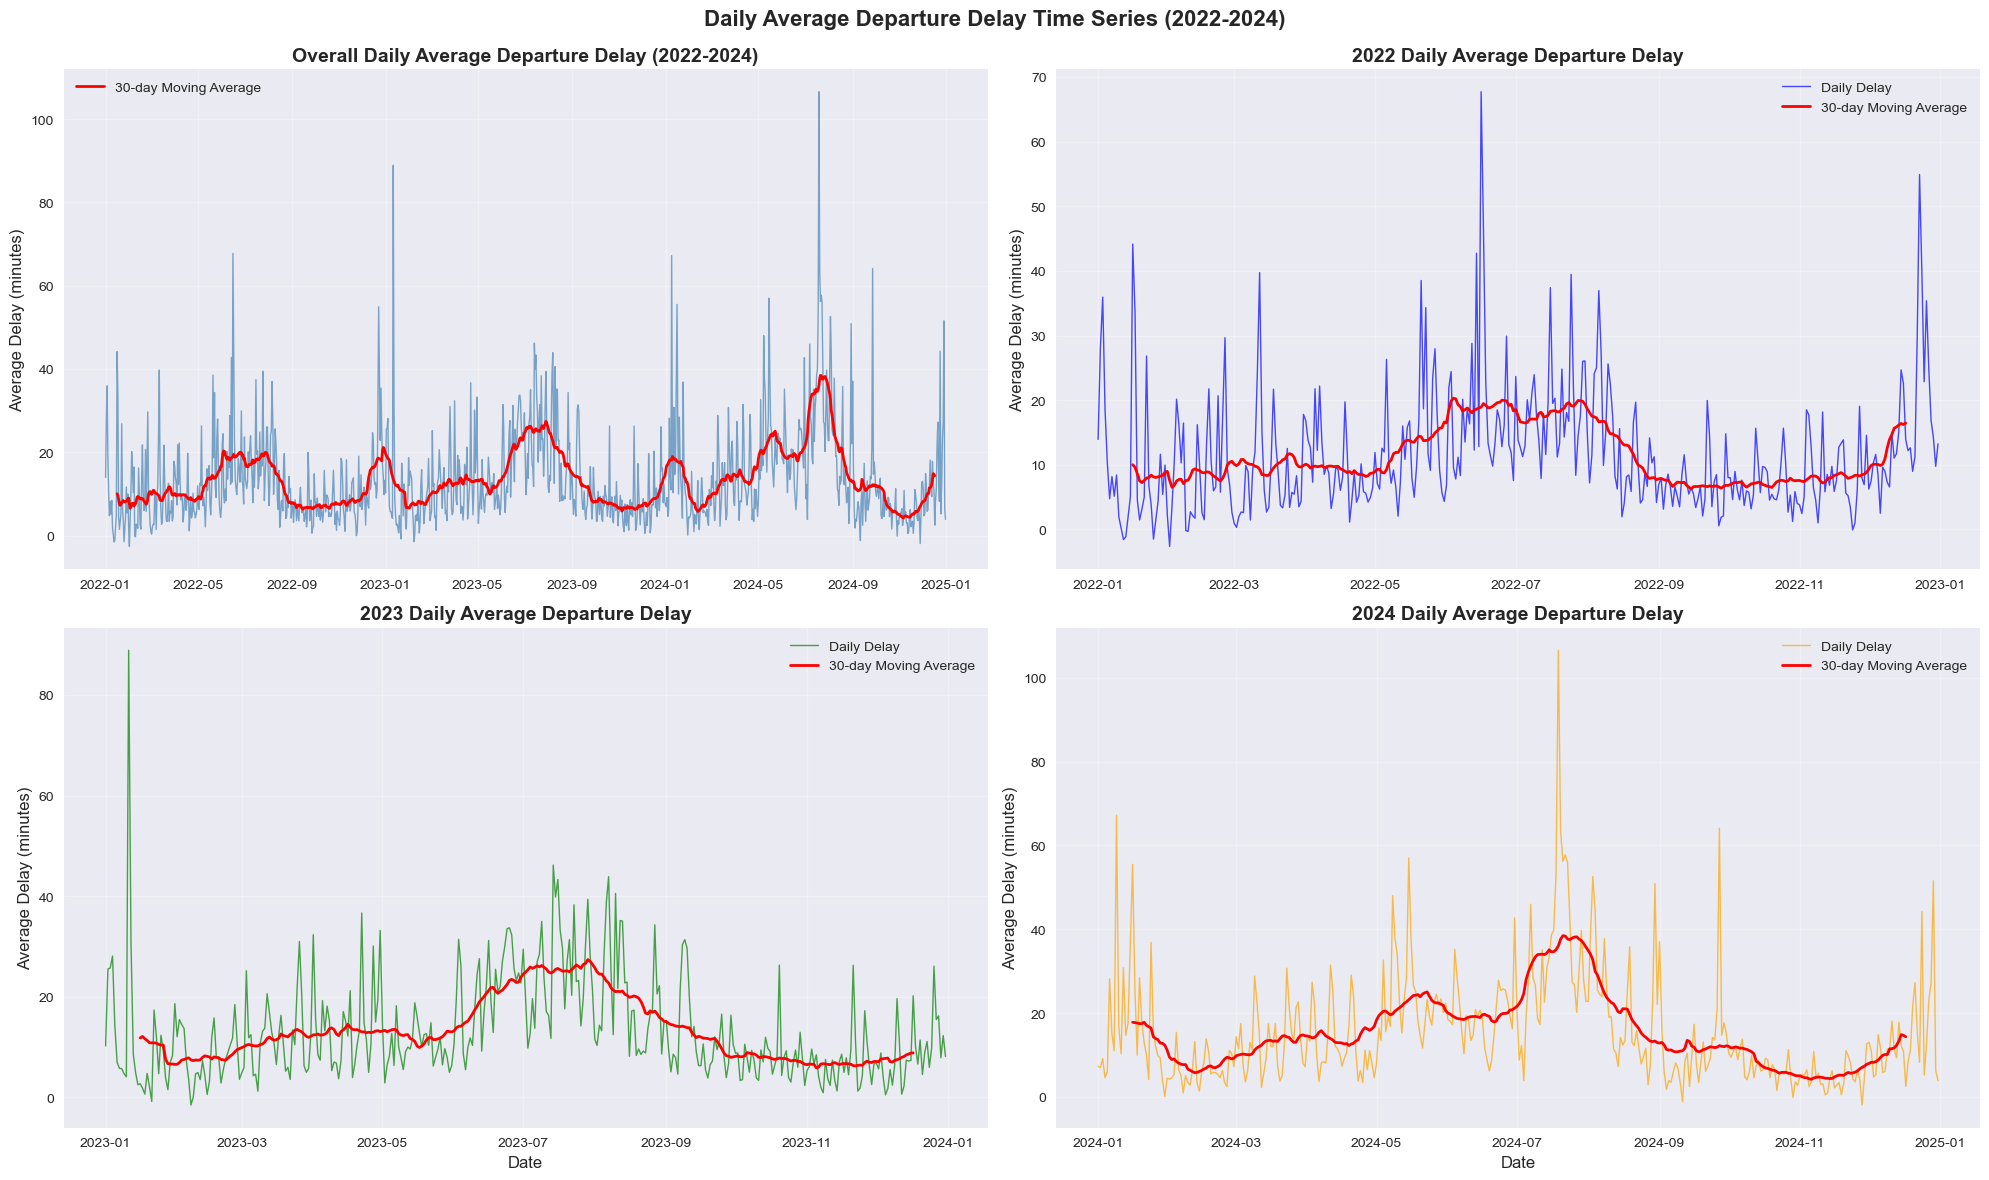

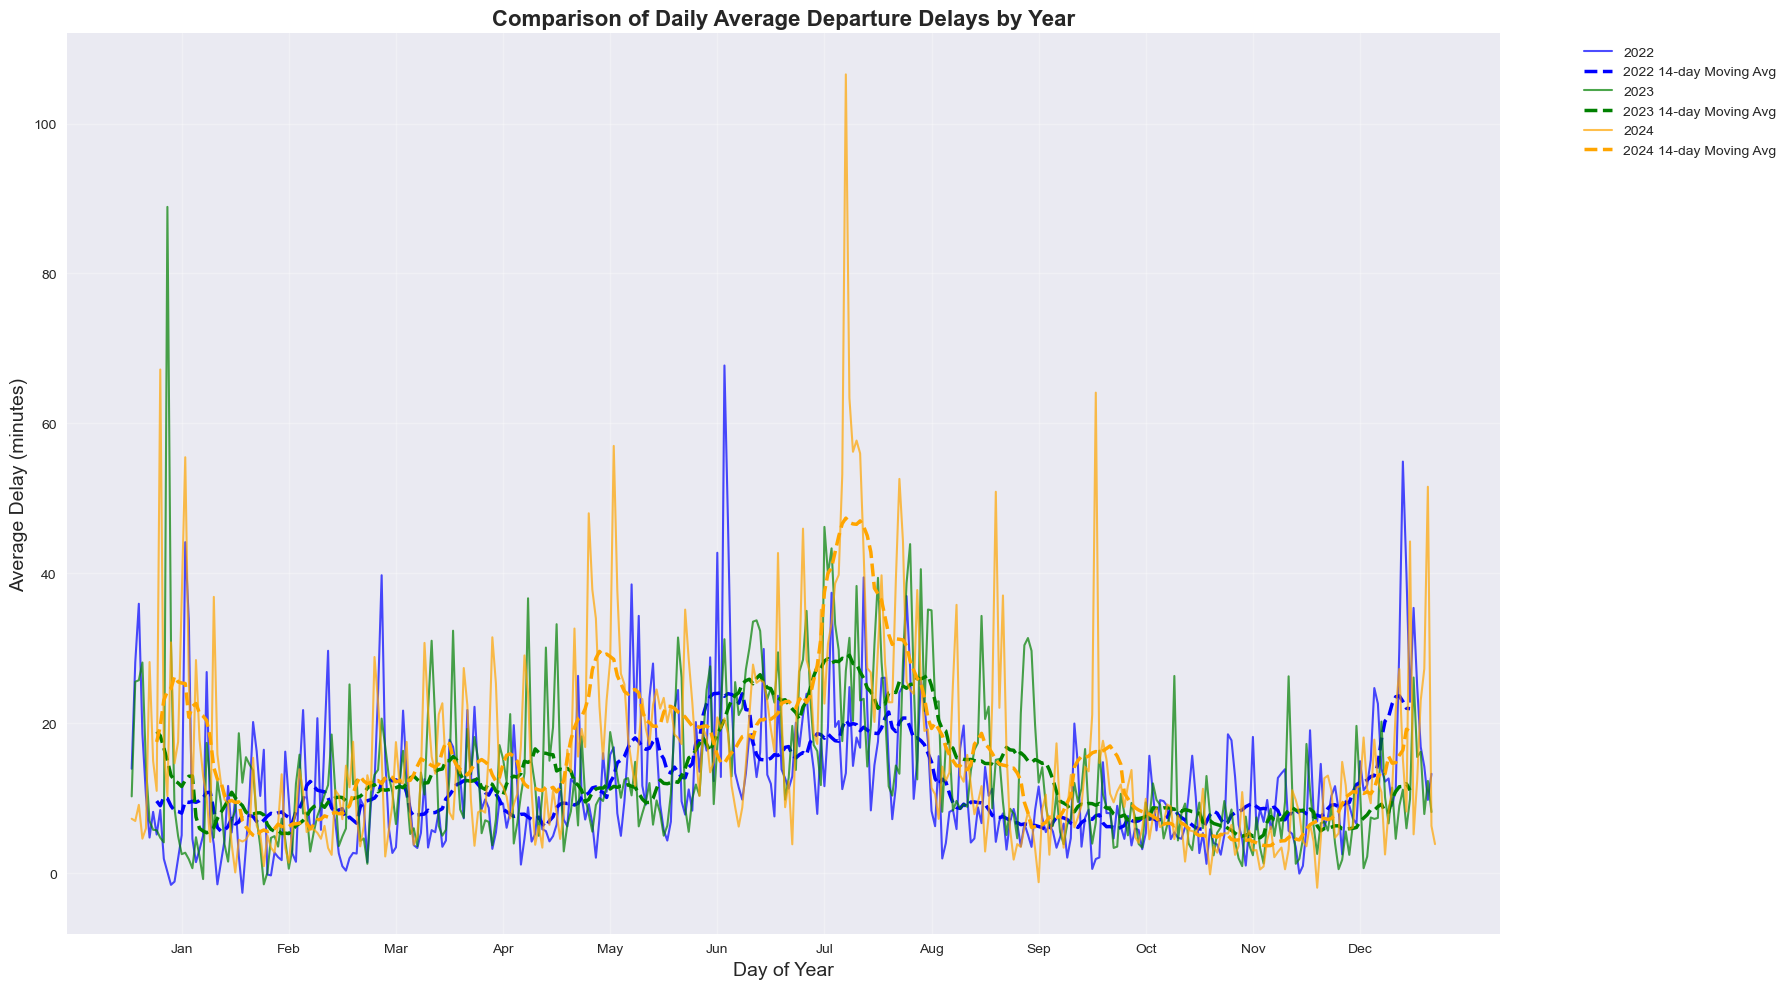


Annual Delay Statistics:
2022: Average delay 11.63 min, Max 67.72 min, Min -2.62 min, Std 9.34 min
2023: Average delay 13.18 min, Max 88.88 min, Min -1.49 min, Std 10.16 min
2024: Average delay 15.61 min, Max 106.55 min, Min -1.94 min, Std 13.34 min

Monthly Delay Statistics:


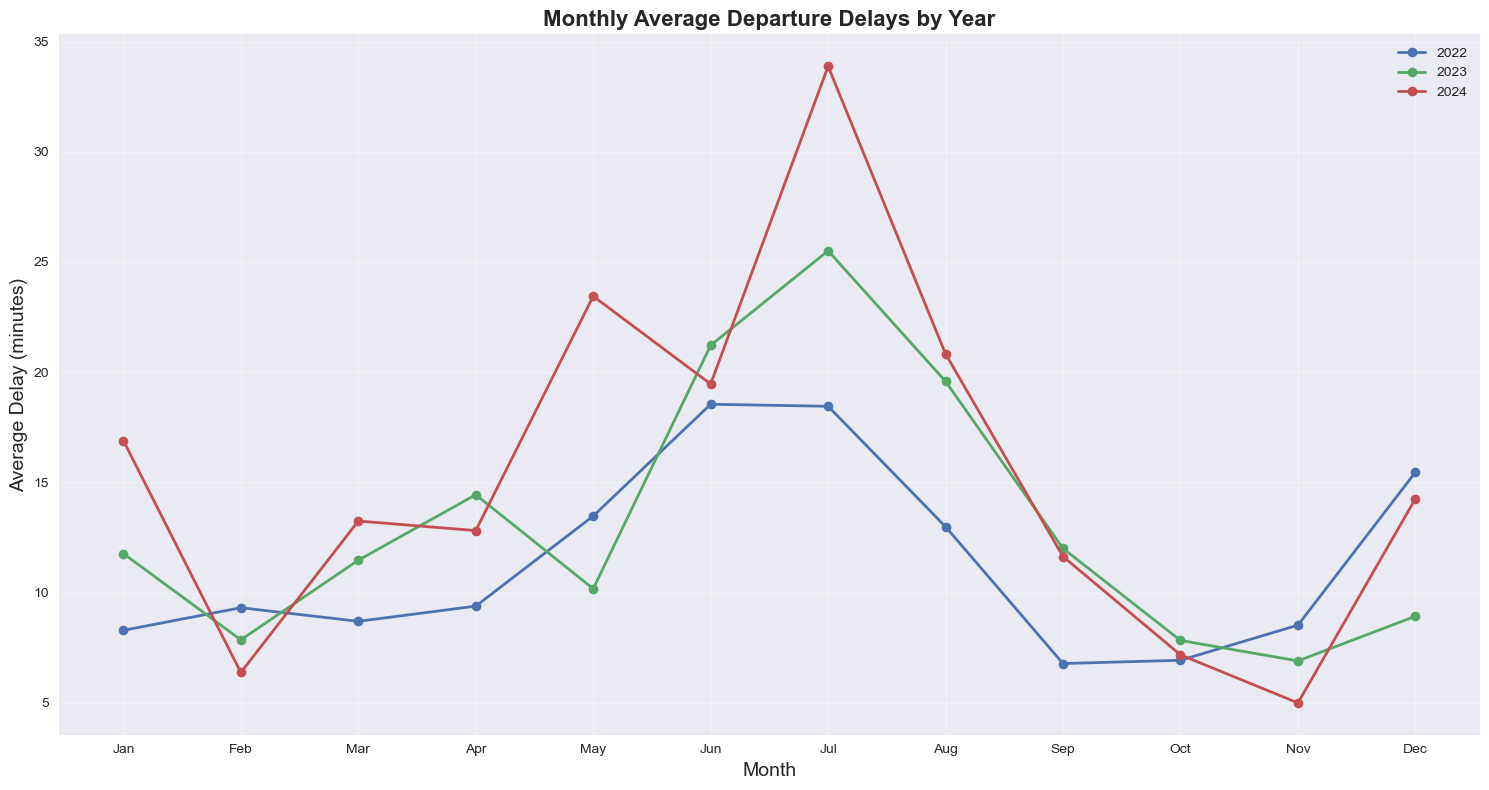


Top 10 Days with Highest Delays:
 1. 2024-07-19: 106.55 min (flights: 1471)
 2. 2023-01-11: 88.88 min (flights: 1172)
 3. 2022-06-16: 67.72 min (flights: 1317)
 4. 2024-01-09: 67.19 min (flights: 1229)
 5. 2024-09-27: 64.10 min (flights: 1413)
 6. 2024-07-20: 63.39 min (flights: 1516)
 7. 2024-07-22: 57.71 min (flights: 1668)
 8. 2024-05-15: 57.00 min (flights: 1483)
 9. 2024-07-21: 56.21 min (flights: 1663)
10. 2024-07-23: 56.00 min (flights: 1546)

Top 10 Days with Lowest Delays:
 1. 2022-02-01: -2.62 min (flights: 1282)
 2. 2024-11-28: -1.94 min (flights: 765)
 3. 2022-01-12: -1.56 min (flights: 1417)
 4. 2023-02-07: -1.49 min (flights: 1302)
 5. 2022-01-25: -1.49 min (flights: 1293)
 6. 2024-09-11: -1.21 min (flights: 1519)
 7. 2022-01-13: -1.13 min (flights: 1550)
 8. 2023-01-21: -0.79 min (flights: 1210)
 9. 2022-02-09: -0.30 min (flights: 1399)
10. 2022-02-08: -0.17 min (flights: 1334)

Weekly Pattern Analysis:


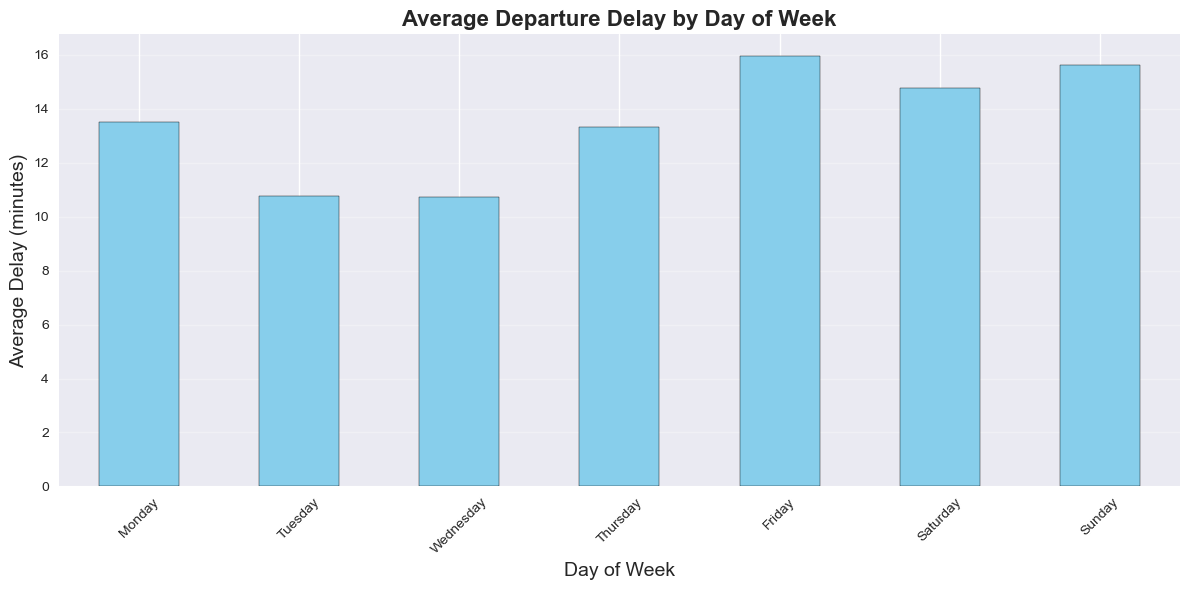

Weekly average delays:
Monday: 13.51 min
Tuesday: 10.77 min
Wednesday: 10.74 min
Thursday: 13.33 min
Friday: 15.95 min
Saturday: 14.75 min
Sunday: 15.63 min


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

# Make sure to use the processed data
df_processed = df.copy()

# Convert datetime column
df_processed['CRS_DEP_DATETIME'] = pd.to_datetime(df_processed['CRS_DEP_DATETIME'])

# Data preprocessing - remove cancelled flights and missing delay data
df_clean = df_processed[(df_processed['CANCELLED'] == 0) & (df_processed['DEP_DELAY'].notna())].copy()

print("Data preprocessing completed:")
print(f"Original data count: {len(df_processed)}")
print(f"Cleaned data count: {len(df_clean)}")
print(f"Data time range: {df_clean['CRS_DEP_DATETIME'].min()} to {df_clean['CRS_DEP_DATETIME'].max()}")

# Extract date and year
df_clean['date'] = df_clean['CRS_DEP_DATETIME'].dt.date
df_clean['year'] = df_clean['CRS_DEP_DATETIME'].dt.year
df_clean['month'] = df_clean['CRS_DEP_DATETIME'].dt.month

# Calculate daily average delays
daily_delays = df_clean.groupby('date')['DEP_DELAY'].agg(['mean', 'count']).reset_index()
daily_delays.columns = ['date', 'avg_delay', 'flight_count']

print(f"\nDaily data points: {len(daily_delays)}")
print(f"Average daily flights: {daily_delays['flight_count'].mean():.0f}")

# Set plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Daily Average Departure Delay Time Series (2022-2024)', fontsize=16, fontweight='bold')

# 1. Overall time series
ax1 = axes[0, 0]
ax1.plot(daily_delays['date'], daily_delays['avg_delay'], 
         linewidth=1, alpha=0.7, color='steelblue')
ax1.set_title('Overall Daily Average Departure Delay (2022-2024)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Delay (minutes)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add moving average to show trend
window = 30  # 30-day moving average
daily_delays['moving_avg'] = daily_delays['avg_delay'].rolling(window=window, center=True).mean()
ax1.plot(daily_delays['date'], daily_delays['moving_avg'], 
         linewidth=2, color='red', label=f'{window}-day Moving Average')
ax1.legend()

# 2. Plot by year
years = [2022, 2023, 2024]
colors = ['blue', 'green', 'orange']

# 2022
ax2 = axes[0, 1]
df_2022 = daily_delays[daily_delays['date'].apply(lambda x: x.year) == 2022]
if len(df_2022) > 0:
    ax2.plot(df_2022['date'], df_2022['avg_delay'], 
             linewidth=1, alpha=0.7, color=colors[0], label='Daily Delay')
    # Moving average
    df_2022 = df_2022.copy()
    df_2022['moving_avg'] = df_2022['avg_delay'].rolling(window=30, center=True).mean()
    ax2.plot(df_2022['date'], df_2022['moving_avg'], 
             linewidth=2, color='red', label='30-day Moving Average')
    ax2.set_title('2022 Daily Average Departure Delay', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Average Delay (minutes)', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 2023
ax3 = axes[1, 0]
df_2023 = daily_delays[daily_delays['date'].apply(lambda x: x.year) == 2023]
if len(df_2023) > 0:
    ax3.plot(df_2023['date'], df_2023['avg_delay'], 
             linewidth=1, alpha=0.7, color=colors[1], label='Daily Delay')
    # Moving average
    df_2023 = df_2023.copy()
    df_2023['moving_avg'] = df_2023['avg_delay'].rolling(window=30, center=True).mean()
    ax3.plot(df_2023['date'], df_2023['moving_avg'], 
             linewidth=2, color='red', label='30-day Moving Average')
    ax3.set_title('2023 Daily Average Departure Delay', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Average Delay (minutes)', fontsize=12)
    ax3.set_xlabel('Date', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# 2024
ax4 = axes[1, 1]
df_2024 = daily_delays[daily_delays['date'].apply(lambda x: x.year) == 2024]
if len(df_2024) > 0:
    ax4.plot(df_2024['date'], df_2024['avg_delay'], 
             linewidth=1, alpha=0.7, color=colors[2], label='Daily Delay')
    # Moving average
    df_2024 = df_2024.copy()
    df_2024['moving_avg'] = df_2024['avg_delay'].rolling(window=30, center=True).mean()
    ax4.plot(df_2024['date'], df_2024['moving_avg'], 
             linewidth=2, color='red', label='30-day Moving Average')
    ax4.set_title('2024 Daily Average Departure Delay', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Average Delay (minutes)', fontsize=12)
    ax4.set_xlabel('Date', fontsize=12)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Create separate large plot showing year comparison
plt.figure(figsize=(18, 10))

# Plot data for each year
for i, year in enumerate(years):
    year_data = daily_delays[daily_delays['date'].apply(lambda x: x.year) == year]
    if len(year_data) > 0:
        # Create unified date index for each year (only month and day)
        year_data = year_data.copy()
        year_data['day_of_year'] = year_data['date'].apply(lambda x: x.timetuple().tm_yday)
        
        plt.plot(year_data['day_of_year'], year_data['avg_delay'], 
                linewidth=1.5, alpha=0.7, color=colors[i], label=f'{year}')
        
        # Add moving average
        year_data['moving_avg'] = year_data['avg_delay'].rolling(window=14, center=True).mean()
        plt.plot(year_data['day_of_year'], year_data['moving_avg'], 
                linewidth=2.5, color=colors[i], linestyle='--', 
                label=f'{year} 14-day Moving Avg')

plt.title('Comparison of Daily Average Departure Delays by Year', fontsize=16, fontweight='bold')
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Add month labels
month_positions = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_positions, month_names)

plt.tight_layout()
plt.show()

# Calculate statistics
print("\nAnnual Delay Statistics:")
for year in years:
    year_data = daily_delays[daily_delays['date'].apply(lambda x: x.year) == year]
    if len(year_data) > 0:
        avg_delay = year_data['avg_delay'].mean()
        max_delay = year_data['avg_delay'].max()
        min_delay = year_data['avg_delay'].min()
        std_delay = year_data['avg_delay'].std()
        print(f"{year}: Average delay {avg_delay:.2f} min, Max {max_delay:.2f} min, "
              f"Min {min_delay:.2f} min, Std {std_delay:.2f} min")

# Monthly analysis
print("\nMonthly Delay Statistics:")
monthly_delays = df_clean.groupby(['year', 'month'])['DEP_DELAY'].mean().reset_index()
monthly_delays_pivot = monthly_delays.pivot(index='month', columns='year', values='DEP_DELAY')

plt.figure(figsize=(15, 8))
for year in years:
    if year in monthly_delays_pivot.columns:
        plt.plot(monthly_delays_pivot.index, monthly_delays_pivot[year], 
                marker='o', linewidth=2, label=str(year))

plt.title('Monthly Average Departure Delays by Year', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show extreme delay dates
print("\nTop 10 Days with Highest Delays:")
top_delays = daily_delays.nlargest(10, 'avg_delay')[['date', 'avg_delay', 'flight_count']]
for i, (_, row) in enumerate(top_delays.iterrows(), 1):
    print(f"{i:2d}. {row['date']}: {row['avg_delay']:.2f} min (flights: {row['flight_count']})")

print("\nTop 10 Days with Lowest Delays:")
bottom_delays = daily_delays.nsmallest(10, 'avg_delay')[['date', 'avg_delay', 'flight_count']]
for i, (_, row) in enumerate(bottom_delays.iterrows(), 1):
    print(f"{i:2d}. {row['date']}: {row['avg_delay']:.2f} min (flights: {row['flight_count']})")

# Additional: Weekly pattern analysis
print("\nWeekly Pattern Analysis:")
df_clean['day_of_week'] = df_clean['CRS_DEP_DATETIME'].dt.day_name()
weekly_delays = df_clean.groupby('day_of_week')['DEP_DELAY'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
weekly_delays.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Departure Delay by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Weekly average delays:")
for day, delay in weekly_delays.items():
    print(f"{day}: {delay:.2f} min")

Temperature Threshold Effect Analysis

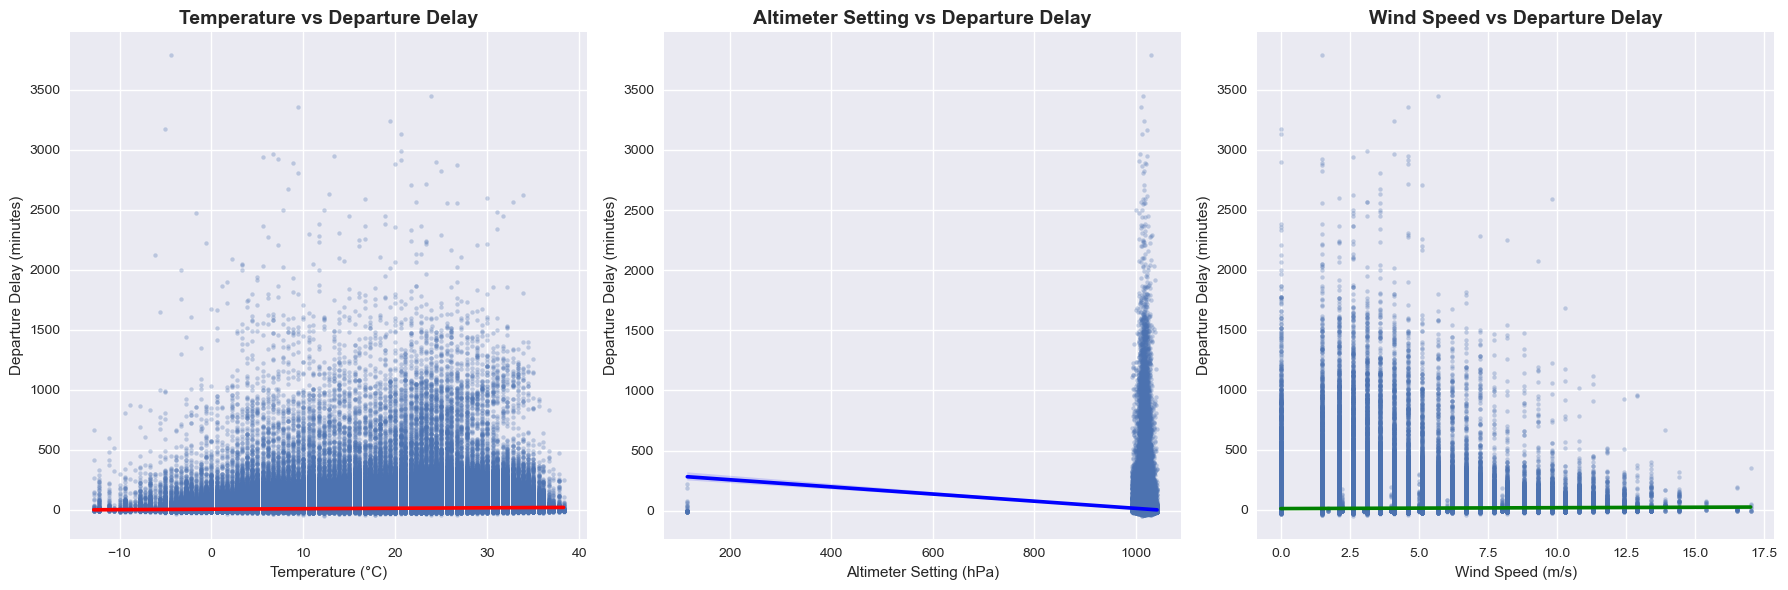

In [23]:
import seaborn as sns
from scipy import stats

# 创建三个子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. 温度 vs 延误
sns.regplot(x='HourlyDryBulbTemperature', y='DEP_DELAY', data=df_clean, 
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title('Temperature vs Departure Delay', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Departure Delay (minutes)')

# 2. 气压 vs 延误
sns.regplot(x='HourlyAltimeterSetting', y='DEP_DELAY', data=df_clean, 
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'blue'}, ax=axes[1])
axes[1].set_title('Altimeter Setting vs Departure Delay', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Altimeter Setting (hPa)')
axes[1].set_ylabel('Departure Delay (minutes)')

# 3. 风速 vs 延误
sns.regplot(x='HourlyWindSpeed', y='DEP_DELAY', data=df_clean, 
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'green'}, ax=axes[2])
axes[2].set_title('Wind Speed vs Departure Delay', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Wind Speed (m/s)')
axes[2].set_ylabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()

/var/folders/65/zc3vqs957_q7llxrryct1r5c0000gn/T/ipykernel_51734/1544342702.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_delay_analysis = df_clean.groupby('temp_bin')['DEP_DELAY'].agg(['mean', 'count', 'std'])


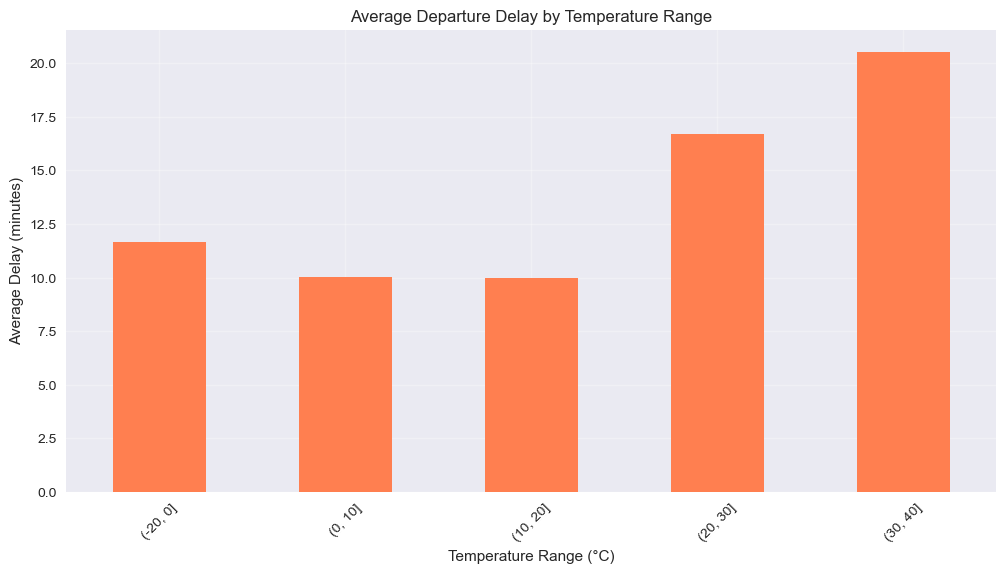

In [24]:
# Analyze delay impact at different temperature ranges
temperature_bins = [-20, 0, 10, 20, 30, 40]  # °C
df_clean['temp_bin'] = pd.cut(df_clean['HourlyDryBulbTemperature'], bins=temperature_bins)
temp_delay_analysis = df_clean.groupby('temp_bin')['DEP_DELAY'].agg(['mean', 'count', 'std'])

plt.figure(figsize=(12, 6))
temp_delay_analysis['mean'].plot(kind='bar', color='coral')
plt.title('Average Departure Delay by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Examine unique airports in ORIGIN and DEST
origin_airports = df_clean['ORIGIN'].unique()
dest_airports = df_clean['DEST'].unique()

print("=== AIRPORT ANALYSIS ===")
print(f"Number of unique ORIGIN airports: {len(origin_airports)}")
print(f"Number of unique DEST airports: {len(dest_airports)}")

# Find airports that appear in both ORIGIN and DEST
common_airports = set(origin_airports) & set(dest_airports)
print(f"Number of airports in both ORIGIN and DEST: {len(common_airports)}")

# Find airports only in ORIGIN or only in DEST
only_origin = set(origin_airports) - set(dest_airports)
only_dest = set(dest_airports) - set(origin_airports)

print(f"Airports only in ORIGIN: {len(only_origin)}")
print(f"Airports only in DEST: {len(only_dest)}")

# Display the airport lists
print(f"\nAll ORIGIN airports ({len(origin_airports)}):")
print(sorted(origin_airports))

print(f"\nAll DEST airports ({len(dest_airports)}):")
print(sorted(dest_airports))

print(f"\nCommon airports ({len(common_airports)}):")
print(sorted(common_airports))

if only_origin:
    print(f"\nAirports only as ORIGIN ({len(only_origin)}):")
    print(sorted(only_origin))

if only_dest:
    print(f"\nAirports only as DEST ({len(only_dest)}):")
    print(sorted(only_dest))

# Get flight counts for analysis
origin_counts = df_clean['ORIGIN'].value_counts()
dest_counts = df_clean['DEST'].value_counts()

print(f"\n=== FLIGHT COUNT ANALYSIS ===")
print("Top 10 ORIGIN airports by flight count:")
print(origin_counts.head(10))

print("\nTop 10 DEST airports by flight count:")
print(dest_counts.head(10))

# Airport usage statistics
print(f"\n=== USAGE STATISTICS ===")
print(f"Average flights per ORIGIN airport: {origin_counts.mean():.1f}")
print(f"Average flights per DEST airport: {dest_counts.mean():.1f}")
print(f"Median flights per ORIGIN airport: {origin_counts.median():.1f}")
print(f"Median flights per DEST airport: {dest_counts.median():.1f}")

# Create a comprehensive airport list for our analysis
all_airports = sorted(set(origin_airports) | set(dest_airports))
print(f"\nTotal unique airports in dataset: {len(all_airports)}")

# Show airports with very few flights (potential outliers)
low_volume_origins = origin_counts[origin_counts < 10]
low_volume_dests = dest_counts[dest_counts < 10]

print(f"\nORIGIN airports with < 10 flights: {len(low_volume_origins)}")
print(f"DEST airports with < 10 flights: {len(low_volume_dests)}")

# Display the low-volume airports
if len(low_volume_origins) > 0:
    print("Low-volume ORIGIN airports:")
    print(low_volume_origins)

if len(low_volume_dests) > 0:
    print("Low-volume DEST airports:")
    print(low_volume_dests)

=== AIRPORT ANALYSIS ===
Number of unique ORIGIN airports: 153
Number of unique DEST airports: 153
Number of airports in both ORIGIN and DEST: 153
Airports only in ORIGIN: 0
Airports only in DEST: 0

All ORIGIN airports (153):
['ABE', 'ACK', 'AEX', 'AGS', 'ALB', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'BDL', 'BGR', 'BHM', 'BNA', 'BOS', 'BTR', 'BTV', 'BUF', 'BWI', 'BZN', 'CAE', 'CAK', 'CHA', 'CHO', 'CHS', 'CID', 'CLE', 'CLT', 'CMH', 'CRW', 'CSG', 'CVG', 'DAB', 'DAL', 'DAY', 'DCA', 'DEN', 'DFW', 'DSM', 'DTW', 'ECP', 'ERI', 'EVV', 'EWN', 'EWR', 'EYW', 'FAY', 'FLL', 'FLO', 'FNT', 'FSD', 'FWA', 'GEG', 'GNV', 'GPT', 'GRR', 'GSO', 'GSP', 'HHH', 'HNL', 'HOU', 'HPN', 'HSV', 'HTS', 'IAD', 'IAH', 'ILM', 'IND', 'ISP', 'ITH', 'JAC', 'JAN', 'JAX', 'JFK', 'LAS', 'LAX', 'LEX', 'LFT', 'LGA', 'LIT', 'LYH', 'MCI', 'MCO', 'MDT', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MLB', 'MLI', 'MOB', 'MSN', 'MSP', 'MSY', 'MVY', 'MYR', 'OAJ', 'OKC', 'OMA', 'ONT', 'ORD', 'ORF', 'PBI', 'PDX', 'PGD', 'PGV', 'PHF', 'PHL', 'PHX', 'P

In [26]:
# First, let's define proper regional groupings based on your 153 airports
def assign_us_region(airport):
    # Northeast
    northeast = ['BOS', 'JFK', 'LGA', 'EWR', 'PWM', 'BGR', 'BTV', 'BDL', 'PVD', 'MHT', 
                 'ORH', 'ALB', 'SYR', 'ROC', 'BUF', 'ROC', 'SWF', 'HPN', 'TTN', 'PHL', 
                 'ABE', 'AVP', 'MDT', 'ACY', 'ISP']
    
    # Southeast
    southeast = ['CLT', 'ATL', 'RDU', 'GSO', 'GSP', 'AVL', 'CHS', 'CAE', 'SAV', 'JAX', 
                 'MCO', 'TPA', 'FLL', 'MIA', 'EYW', 'SRQ', 'PBI', 'RSW', 'PIE', 'SFB',
                 'DAB', 'GNV', 'TLH', 'VPS', 'MOB', 'BHM', 'HSV', 'CHA', 'TYS', 'MEM',
                 'BNA', 'MYR', 'ORF', 'RIC', 'ROA', 'LYH', 'TRI', 'CRW', 'CHO', 'ILM']
    
    # Midwest
    midwest = ['ORD', 'MDW', 'DTW', 'CLE', 'CVG', 'IND', 'CMH', 'DAY', 'FWA', 'SDF',
               'STL', 'MCI', 'DSM', 'OMA', 'MKE', 'GRR', 'CID', 'FNT', 'LAN', 'MSN',
               'PIA', 'TOL', 'EVV', 'SPI', 'MLI', 'DEC', 'BMI', 'ATW', 'RFD', 'FLO']
    
    # West
    west = ['LAX', 'SFO', 'SAN', 'SNA', 'ONT', 'SMF', 'PDX', 'SEA', 'GEG', 'SLC', 
            'LAS', 'PHX', 'DEN', 'ABQ', 'ELP', 'TUS', 'RNO', 'BOI', 'SJC', 'SBA',
            'EUG', 'MFR', 'ACV', 'RDD', 'FAT', 'BFL', 'SBP', 'MRY', 'PSP', 'IYK']
    
    # Other regions
    if airport in northeast:
        return 'Northeast'
    elif airport in southeast:
        return 'Southeast'
    elif airport in midwest:
        return 'Midwest'
    elif airport in west:
        return 'West'
    else:
        return 'Other'

# Apply regional classification
df_clean['region'] = df_clean['ORIGIN'].apply(assign_us_region)

print("Regional distribution:")
print(df_clean['region'].value_counts())

Regional distribution:
region
Southeast    1109819
Other         196093
Northeast     175956
Midwest       110761
West           67755
Name: count, dtype: int64


=== ANALYSIS 2: Multi-Weather Factor 3D Analysis ===
Sample size for 3D plot: 1500


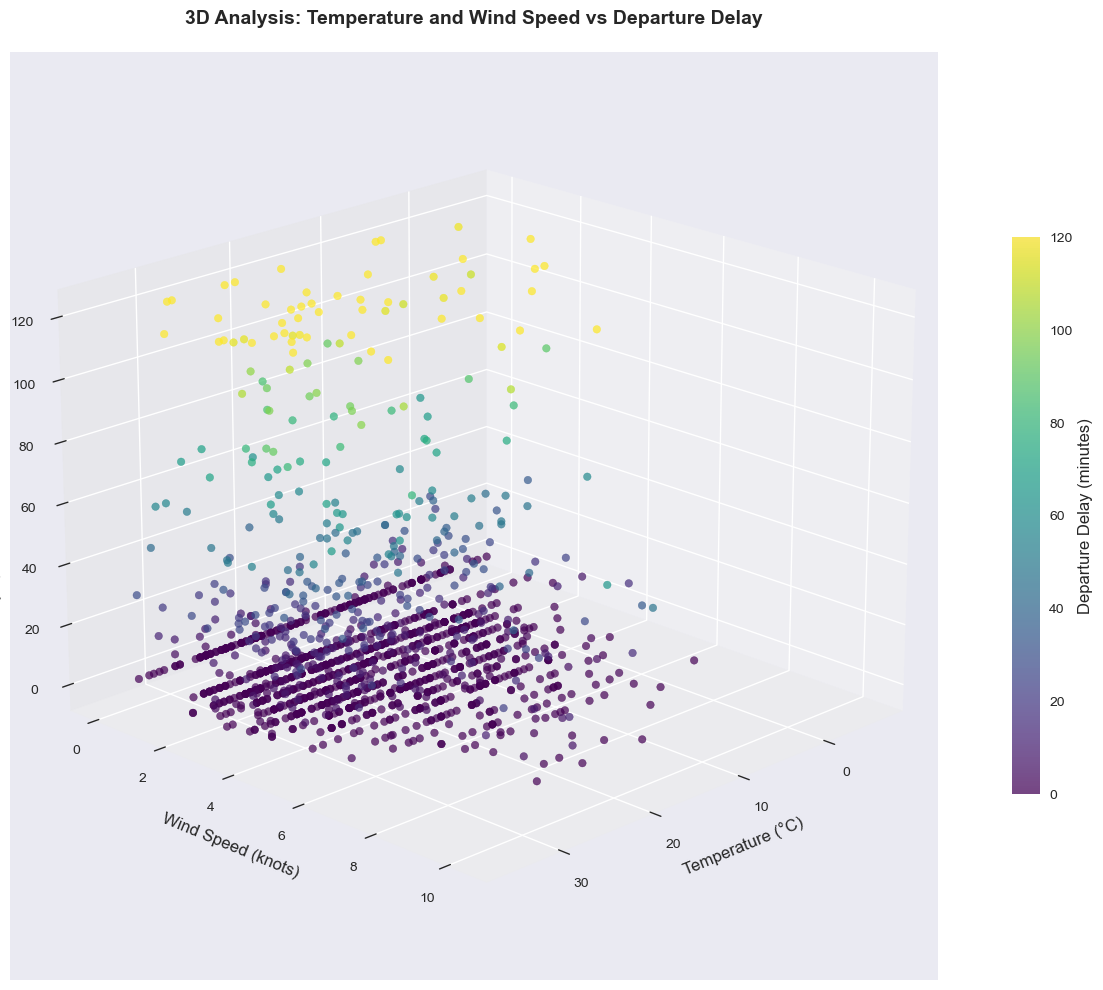


3D Analysis Statistics:
Temperature range: -6.1°C to 35.0°C
Wind Speed range: 0.0 to 10.3 knots
Delay range: -20.0 to 852.0 minutes
Average delay: 11.5 minutes

Correlation coefficients:
Temperature vs Delay: 0.0776
Wind Speed vs Delay: -0.0087


In [27]:
# Analysis 2: Multi-Weather Factor 3D Analysis
print("=== ANALYSIS 2: Multi-Weather Factor 3D Analysis ===")

# Prepare sample data for 3D visualization with cleaned data
sample_3d = df_clean.dropna(subset=['HourlyDryBulbTemperature', 
                                   'HourlyWindSpeed', 'DEP_DELAY']).sample(1500)

print(f"Sample size for 3D plot: {len(sample_3d)}")

# Create the 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Color by delay time (using a colormap)
scatter = ax.scatter(sample_3d['HourlyDryBulbTemperature'], 
                     sample_3d['HourlyWindSpeed'],
                     sample_3d['DEP_DELAY'].clip(0, 120),  # Z轴: 延误时间，限制在0-120分钟
                     c=sample_3d['DEP_DELAY'].clip(0, 120),  # 颜色也表示延误时间
                     cmap='viridis', alpha=0.7, 
                     s=30)  # 固定点大小

ax.set_xlabel('Temperature (°C)', fontsize=12, labelpad=10)
ax.set_ylabel('Wind Speed (knots)', fontsize=12, labelpad=10)
ax.set_zlabel('Departure Delay (minutes)', fontsize=12, labelpad=10)
plt.title('3D Analysis: Temperature and Wind Speed vs Departure Delay', 
          fontsize=14, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=20)
cbar.set_label('Departure Delay (minutes)', fontsize=12)

# 设置视角以获得更好的观察角度
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# 打印统计数据
print("\n3D Analysis Statistics:")
print(f"Temperature range: {sample_3d['HourlyDryBulbTemperature'].min():.1f}°C to {sample_3d['HourlyDryBulbTemperature'].max():.1f}°C")
print(f"Wind Speed range: {sample_3d['HourlyWindSpeed'].min():.1f} to {sample_3d['HourlyWindSpeed'].max():.1f} knots")
print(f"Delay range: {sample_3d['DEP_DELAY'].min():.1f} to {sample_3d['DEP_DELAY'].max():.1f} minutes")
print(f"Average delay: {sample_3d['DEP_DELAY'].mean():.1f} minutes")

# 计算相关系数
corr_temp_delay = sample_3d['HourlyDryBulbTemperature'].corr(sample_3d['DEP_DELAY'])
corr_wind_delay = sample_3d['HourlyWindSpeed'].corr(sample_3d['DEP_DELAY'])
print(f"\nCorrelation coefficients:")
print(f"Temperature vs Delay: {corr_temp_delay:.4f}")
print(f"Wind Speed vs Delay: {corr_wind_delay:.4f}")

=== ANALYSIS 2: Multi-Weather Factor 3D Analysis ===
Data cleaning summary:
Original HourlyPrecipitation - Non-numeric values: 1155945
Cleaned HourlyPrecipitation - Null values: 566282
Original HourlyWindSpeed - Non-numeric values: 0
Cleaned HourlyWindSpeed - Null values: 7175
Sample size for 3D plot: 1500


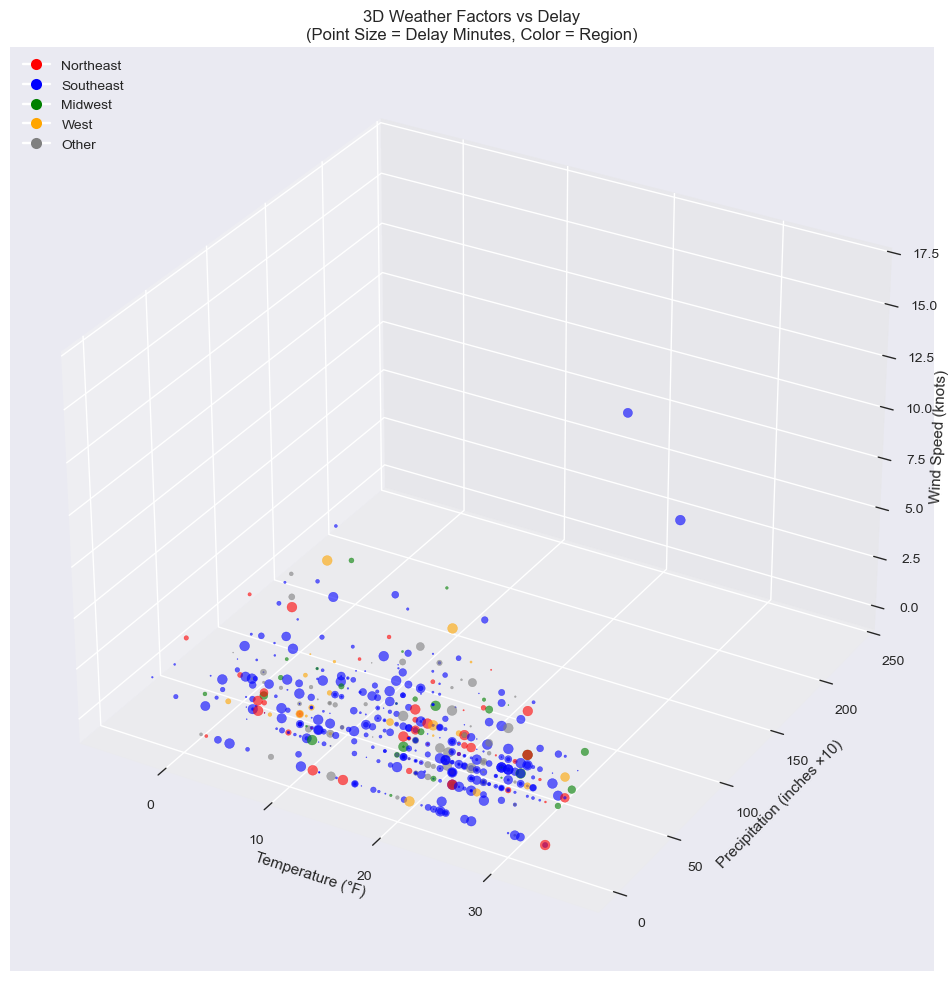

In [28]:
# Analysis 2: Multi-Weather Factor 3D Analysis
print("=== ANALYSIS 2: Multi-Weather Factor 3D Analysis ===")

# First, let's clean the weather data by converting to numeric and handling errors
df_clean['HourlyPrecipitation_clean'] = pd.to_numeric(df_clean['HourlyPrecipitation'], errors='coerce')
df_clean['HourlyWindSpeed_clean'] = pd.to_numeric(df_clean['HourlyWindSpeed'], errors='coerce')
df_clean['HourlyDryBulbTemperature_clean'] = pd.to_numeric(df_clean['HourlyDryBulbTemperature'], errors='coerce')

print("Data cleaning summary:")
print(f"Original HourlyPrecipitation - Non-numeric values: {df_clean['HourlyPrecipitation'].apply(lambda x: isinstance(x, str)).sum()}")
print(f"Cleaned HourlyPrecipitation - Null values: {df_clean['HourlyPrecipitation_clean'].isna().sum()}")
print(f"Original HourlyWindSpeed - Non-numeric values: {df_clean['HourlyWindSpeed'].apply(lambda x: isinstance(x, str)).sum()}")
print(f"Cleaned HourlyWindSpeed - Null values: {df_clean['HourlyWindSpeed_clean'].isna().sum()}")

# Prepare sample data for 3D visualization with cleaned data
sample_3d = df_clean.dropna(subset=['HourlyPrecipitation_clean', 
                                   'HourlyWindSpeed_clean', 'DEP_DELAY', 'region']).sample(1500)

print(f"Sample size for 3D plot: {len(sample_3d)}")

# Create the 3D scatter plot
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Color by region
colors = {'Northeast': 'red', 'Southeast': 'blue', 'Midwest': 'green', 
          'West': 'orange', 'Other': 'gray'}
color_list = [colors[region] for region in sample_3d['region']]

# Use cleaned numeric data
scatter = ax.scatter(sample_3d['HourlyDryBulbTemperature_clean'], 
                     sample_3d['HourlyPrecipitation_clean'] * 10,  # Scale for visibility
                     sample_3d['HourlyWindSpeed_clean'],
                     c=color_list, alpha=0.6, 
                     s=sample_3d['DEP_DELAY'].clip(0, 100)/2)  # Smaller point size

ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Precipitation (inches ×10)')
ax.set_zlabel('Wind Speed (knots)')
plt.title('3D Weather Factors vs Delay\n(Point Size = Delay Minutes, Color = Region)')

# Create legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, 
                          label=region, markersize=8) for region, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper left')

plt.show()



=== ANALYSIS 9: Airport-Specific Weather Sensitivity ===
Creating weather_severity column...
Weather severity distribution:
weather_severity
0      66485
1    1497607
2      85644
3      10617
4         31
Name: count, dtype: int64
Airports with at least 100 flights: 141
Top 20 airports by flight volume:
ORIGIN
CLT    594668
RDU    171275
ATL     49813
LGA     41218
GSO     31867
AVL     31824
ORD     25919
BOS     24297
EWR     23971
DCA     23755
DFW     23397
JFK     23391
MCO     23181
ILM     21950
MIA     18112
PHL     17284
BNA     17176
FLL     15301
DTW     15137
DEN     15027
Name: count, dtype: int64

Analyzed 25 airports with sufficient weather data


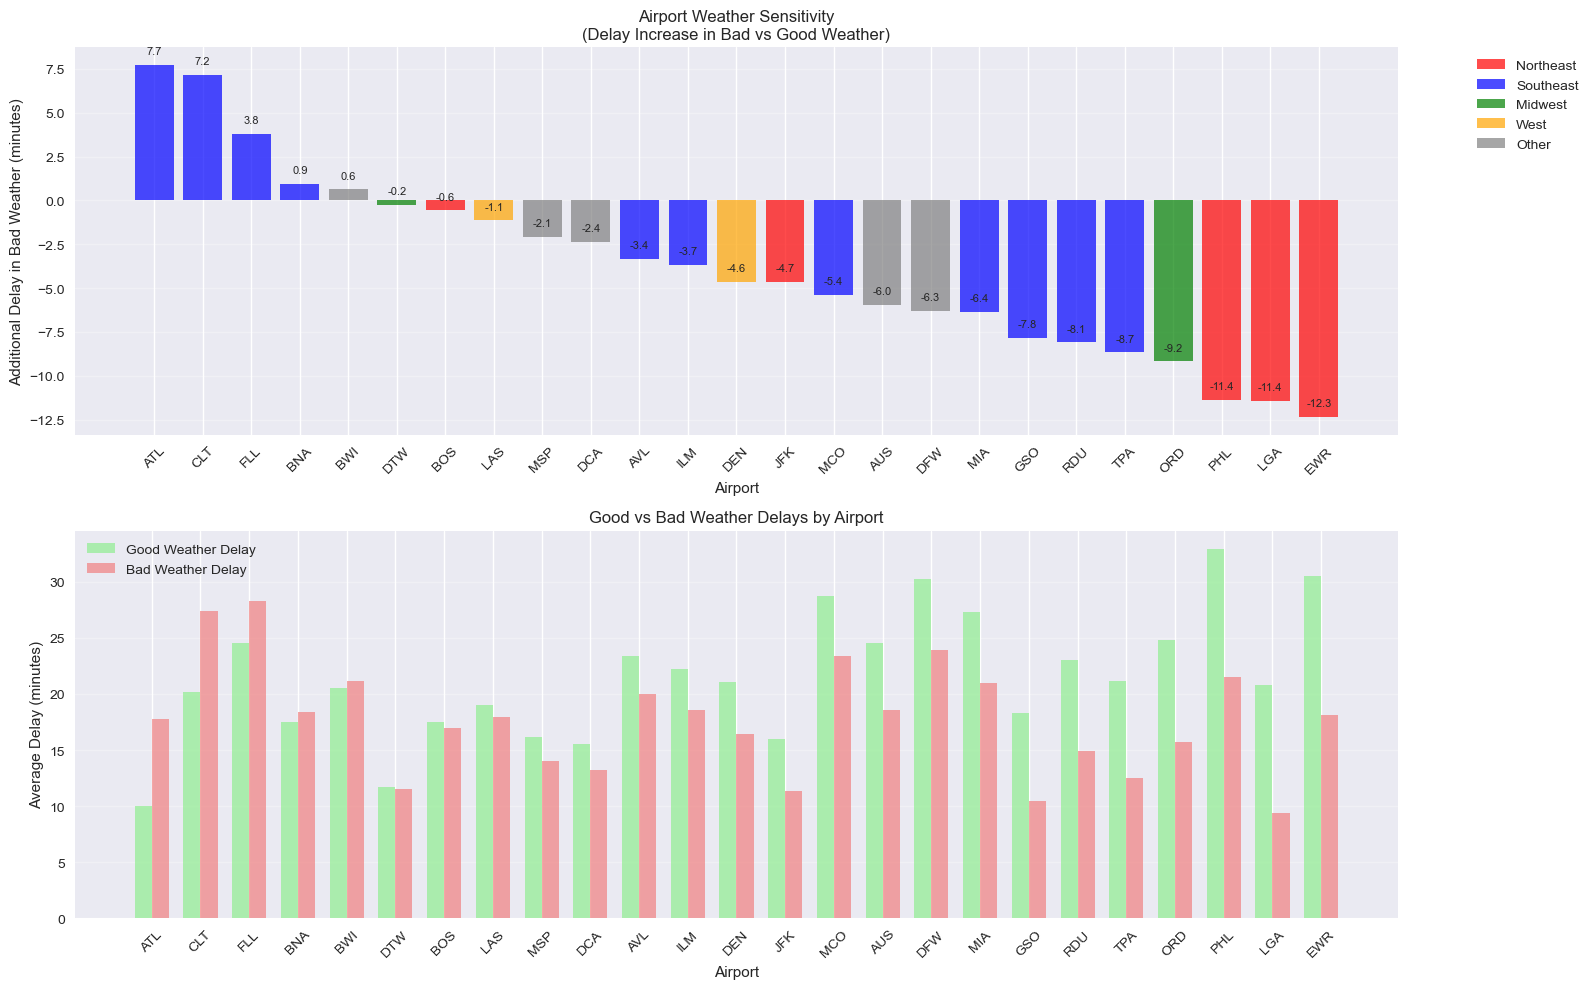


Top 10 Most Weather-Sensitive Airports:
   Airport  Weather_Sensitivity     Region  Good_Weather_Delay  \
2      ATL                 7.74  Southeast                9.98   
0      CLT                 7.17  Southeast               20.20   
17     FLL                 3.78  Southeast               24.53   
16     BNA                 0.94  Southeast               17.47   
21     BWI                 0.62      Other               20.50   
18     DTW                -0.25    Midwest               11.74   
7      BOS                -0.57  Northeast               17.49   
24     LAS                -1.14       West               19.06   
22     MSP                -2.09      Other               16.15   
9      DCA                -2.38      Other               15.56   

    Bad_Weather_Delay  
2               17.72  
0               27.37  
17              28.31  
16              18.41  
21              21.12  
18              11.49  
7               16.93  
24              17.92  
22              

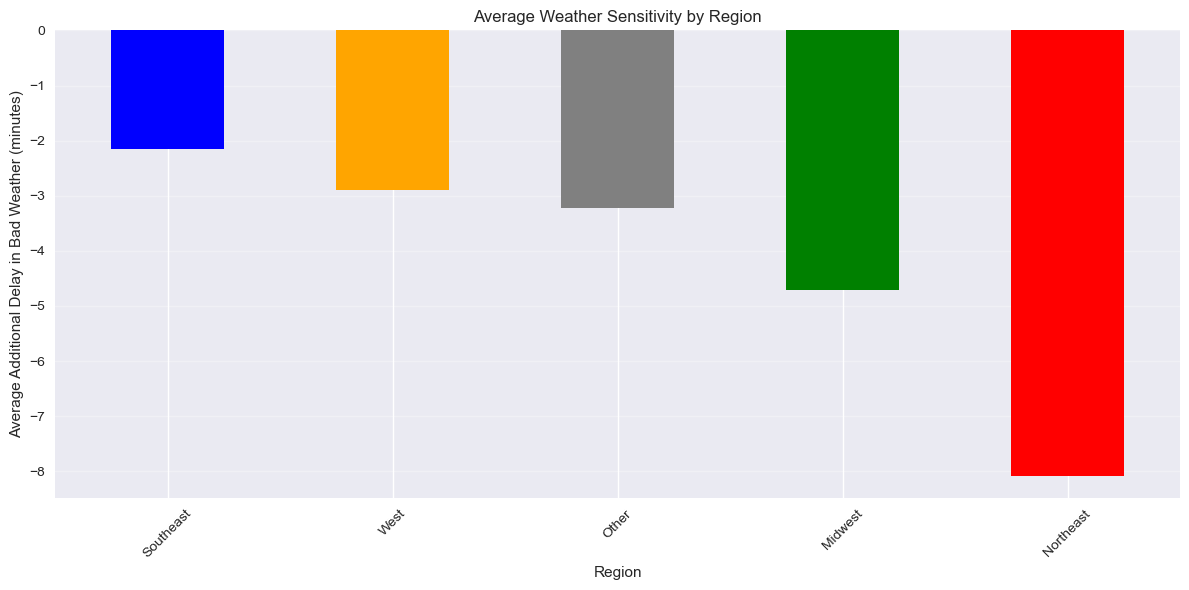


=== Airport Clustering by Weather Response ===


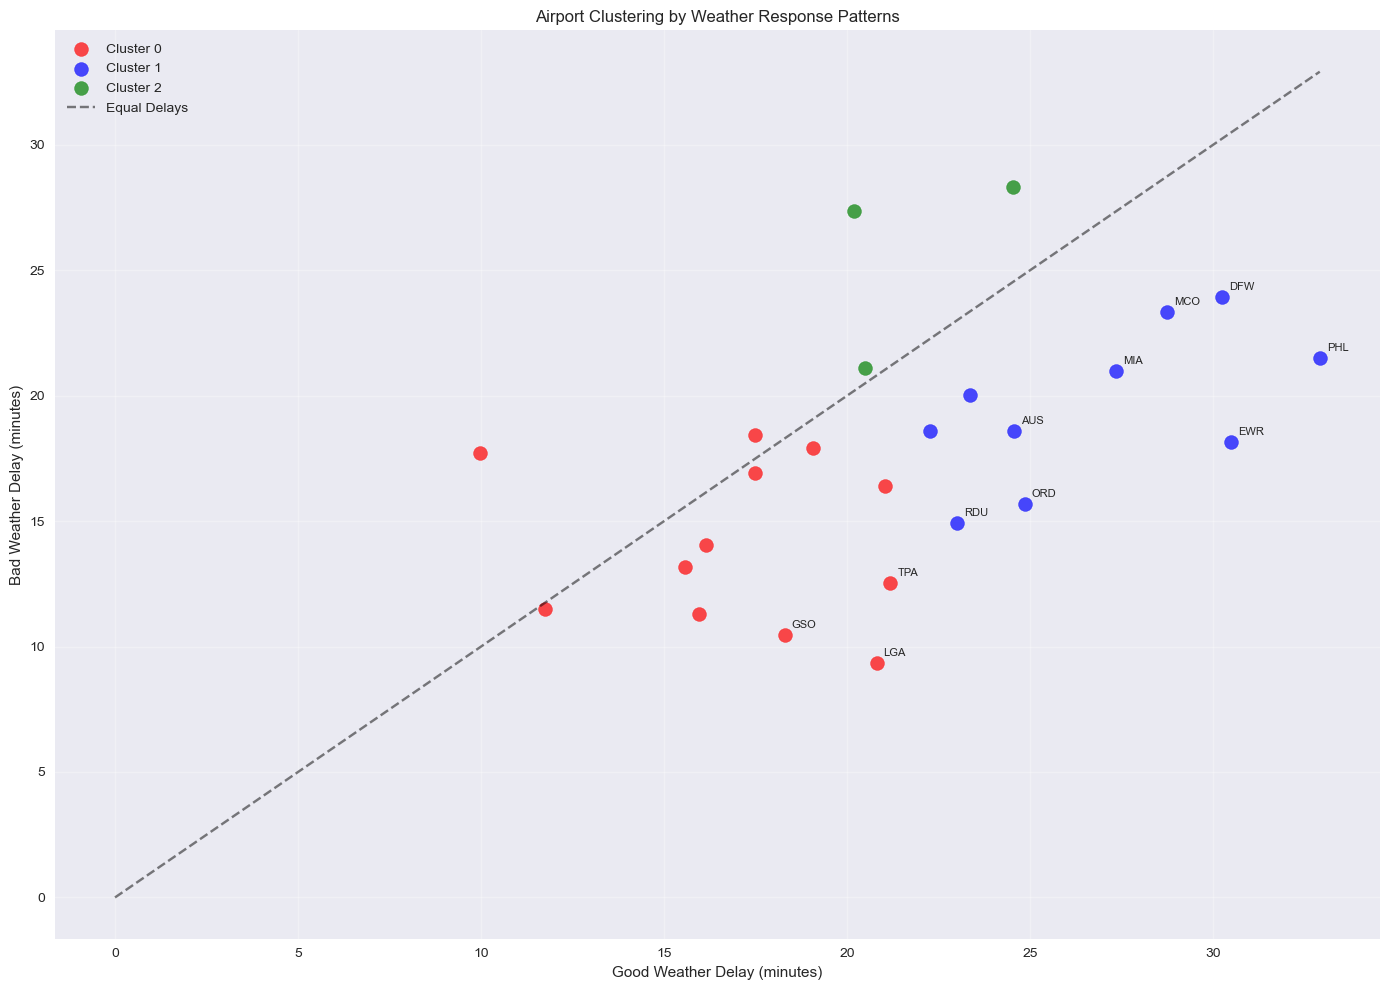


Cluster Characteristics:
         Good_Weather_Delay  Bad_Weather_Delay  Weather_Sensitivity  Airport
Cluster                                                                     
0                     17.06              14.15                -2.91       12
1                     26.78              19.58                -7.20       10
2                     21.74              25.60                 3.86        3


In [29]:
# Analysis 9: Airport-Specific Weather Sensitivity
print("=== ANALYSIS 9: Airport-Specific Weather Sensitivity ===")

# First, ensure weather_severity column exists (from Analysis 7)
if 'weather_severity' not in df_clean.columns:
    print("Creating weather_severity column...")
    
    # Create cleaned weather columns if they don't exist
    if 'HourlyPrecipitation_clean' not in df_clean.columns:
        df_clean['HourlyPrecipitation_clean'] = pd.to_numeric(df_clean['HourlyPrecipitation'], errors='coerce')
    if 'HourlyWindSpeed_clean' not in df_clean.columns:
        df_clean['HourlyWindSpeed_clean'] = pd.to_numeric(df_clean['HourlyWindSpeed'], errors='coerce')
    if 'HourlyDryBulbTemperature_clean' not in df_clean.columns:
        df_clean['HourlyDryBulbTemperature_clean'] = pd.to_numeric(df_clean['HourlyDryBulbTemperature'], errors='coerce')
    if 'HourlyVisibility_clean' not in df_clean.columns:
        df_clean['HourlyVisibility_clean'] = pd.to_numeric(df_clean['HourlyVisibility'], errors='coerce')
    
    # Define weather severity function
    def weather_severity_index(row):
        score = 0
        if pd.notna(row['HourlyPrecipitation_clean']) and row['HourlyPrecipitation_clean'] > 0.1:
            score += 1
        if pd.notna(row['HourlyWindSpeed_clean']) and row['HourlyWindSpeed_clean'] > 15:
            score += 1
        if pd.notna(row['HourlyVisibility_clean']) and row['HourlyVisibility_clean'] < 3:
            score += 1
        if pd.notna(row['HourlyDryBulbTemperature_clean']):
            if row['HourlyDryBulbTemperature_clean'] < 32 or row['HourlyDryBulbTemperature_clean'] > 90:
                score += 1
        return min(score, 4)  # Cap at 4
    
    df_clean['weather_severity'] = df_clean.apply(weather_severity_index, axis=1)
    print(f"Weather severity distribution:\n{df_clean['weather_severity'].value_counts().sort_index()}")

# Focus on top airports by flight volume (ensure we have enough data for each)
min_flights = 100  # Minimum flights per airport for analysis
airport_counts = df_clean['ORIGIN'].value_counts()
qualified_airports = airport_counts[airport_counts >= min_flights].index

print(f"Airports with at least {min_flights} flights: {len(qualified_airports)}")
print(f"Top 20 airports by flight volume:")
print(airport_counts.head(20))

# Analyze airport weather sensitivity
airport_sensitivity = []

for airport in qualified_airports[:25]:  # Limit to top 25 for clarity
    airport_data = df_clean[df_clean['ORIGIN'] == airport]
    
    # Calculate sensitivity as delay difference between good and bad weather
    good_weather = airport_data[airport_data['weather_severity'] == 0]
    bad_weather = airport_data[airport_data['weather_severity'] >= 2]  # Changed to >=2 for more contrast
    
    if len(good_weather) > 20 and len(bad_weather) > 10:  # Reduced minimums
        good_delay = good_weather['DEP_DELAY'].mean()
        bad_delay = bad_weather['DEP_DELAY'].mean()
        sensitivity = bad_delay - good_delay
        flight_count = len(airport_data)
        
        # Get region
        region = airport_data['region'].iloc[0] if len(airport_data) > 0 else 'Unknown'
        
        airport_sensitivity.append((airport, sensitivity, region, flight_count, 
                                  len(good_weather), len(bad_weather), good_delay, bad_delay))

# Create sensitivity dataframe
if airport_sensitivity:
    sensitivity_df = pd.DataFrame(airport_sensitivity, 
                                 columns=['Airport', 'Weather_Sensitivity', 'Region', 
                                         'Total_Flights', 'Good_Weather_Flights', 
                                         'Bad_Weather_Flights', 'Good_Weather_Delay', 
                                         'Bad_Weather_Delay'])
    sensitivity_df = sensitivity_df.sort_values('Weather_Sensitivity', ascending=False)
    
    print(f"\nAnalyzed {len(sensitivity_df)} airports with sufficient weather data")
    
    # Plot weather sensitivity
    plt.figure(figsize=(16, 10))
    
    # Create subplot for sensitivity
    plt.subplot(2, 1, 1)
    colors = {'Northeast': 'red', 'Southeast': 'blue', 'Midwest': 'green', 
              'West': 'orange', 'Other': 'gray', 'Unknown': 'black'}
    bar_colors = [colors[region] for region in sensitivity_df['Region']]
    
    bars = plt.bar(sensitivity_df['Airport'], sensitivity_df['Weather_Sensitivity'], 
                   color=bar_colors, alpha=0.7)
    plt.title('Airport Weather Sensitivity\n(Delay Increase in Bad vs Good Weather)')
    plt.xlabel('Airport')
    plt.ylabel('Additional Delay in Bad Weather (minutes)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, label=region, alpha=0.7) 
                      for region, color in colors.items() if region in sensitivity_df['Region'].unique()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Second subplot: Good vs Bad weather delays
    plt.subplot(2, 1, 2)
    x_pos = np.arange(len(sensitivity_df))
    width = 0.35
    
    plt.bar(x_pos - width/2, sensitivity_df['Good_Weather_Delay'], width, 
            label='Good Weather Delay', color='lightgreen', alpha=0.7)
    plt.bar(x_pos + width/2, sensitivity_df['Bad_Weather_Delay'], width, 
            label='Bad Weather Delay', color='lightcoral', alpha=0.7)
    
    plt.xlabel('Airport')
    plt.ylabel('Average Delay (minutes)')
    plt.title('Good vs Bad Weather Delays by Airport')
    plt.xticks(x_pos, sensitivity_df['Airport'], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Display detailed results
    print("\nTop 10 Most Weather-Sensitive Airports:")
    top_sensitive = sensitivity_df.head(10)[['Airport', 'Weather_Sensitivity', 'Region', 
                                           'Good_Weather_Delay', 'Bad_Weather_Delay']]
    print(top_sensitive.round(2))
    
    print("\nTop 10 Least Weather-Sensitive Airports:")
    bottom_sensitive = sensitivity_df.tail(10)[['Airport', 'Weather_Sensitivity', 'Region', 
                                              'Good_Weather_Delay', 'Bad_Weather_Delay']]
    print(bottom_sensitive.round(2))
    
    # Regional analysis of weather sensitivity
    regional_sensitivity = sensitivity_df.groupby('Region')['Weather_Sensitivity'].agg(['mean', 'std', 'count'])
    print("\nRegional Weather Sensitivity Analysis:")
    print(regional_sensitivity.round(2))
    
    # Plot regional sensitivity
    plt.figure(figsize=(12, 6))
    regional_means = sensitivity_df.groupby('Region')['Weather_Sensitivity'].mean().sort_values(ascending=False)
    regional_means.plot(kind='bar', color=[colors[region] for region in regional_means.index])
    plt.title('Average Weather Sensitivity by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Additional Delay in Bad Weather (minutes)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
else:
    print("No airports met the criteria for weather sensitivity analysis.")
    print("Try reducing the minimum flight requirements.")

# Additional: Airport clustering by weather response pattern
print("\n=== Airport Clustering by Weather Response ===")

if not sensitivity_df.empty:
    # Prepare data for clustering
    cluster_data = sensitivity_df[['Good_Weather_Delay', 'Bad_Weather_Delay', 'Weather_Sensitivity']].copy()
    
    # Normalize for clustering
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    cluster_scaled = scaler.fit_transform(cluster_data)
    
    # Perform K-means clustering
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    sensitivity_df['Cluster'] = kmeans.fit_predict(cluster_scaled)
    
    # Plot clustering results
    plt.figure(figsize=(14, 10))
    
    colors_cluster = ['red', 'blue', 'green', 'purple', 'orange']
    for cluster in sorted(sensitivity_df['Cluster'].unique()):
        cluster_data = sensitivity_df[sensitivity_df['Cluster'] == cluster]
        plt.scatter(cluster_data['Good_Weather_Delay'], cluster_data['Bad_Weather_Delay'],
                   c=colors_cluster[cluster], label=f'Cluster {cluster}', s=100, alpha=0.7)
        
        # Add airport labels for some points
        for _, airport in cluster_data.iterrows():
            if airport['Weather_Sensitivity'] > 10 or airport['Weather_Sensitivity'] < -5:
                plt.annotate(airport['Airport'], 
                           (airport['Good_Weather_Delay'], airport['Bad_Weather_Delay']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # Add diagonal line (y=x)
    max_delay = max(sensitivity_df['Good_Weather_Delay'].max(), sensitivity_df['Bad_Weather_Delay'].max())
    plt.plot([0, max_delay], [0, max_delay], 'k--', alpha=0.5, label='Equal Delays')
    
    plt.xlabel('Good Weather Delay (minutes)')
    plt.ylabel('Bad Weather Delay (minutes)')
    plt.title('Airport Clustering by Weather Response Patterns')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Describe clusters
    print("\nCluster Characteristics:")
    cluster_summary = sensitivity_df.groupby('Cluster').agg({
        'Good_Weather_Delay': 'mean',
        'Bad_Weather_Delay': 'mean', 
        'Weather_Sensitivity': 'mean',
        'Airport': 'count'
    }).round(2)
    print(cluster_summary)

In [30]:
# Step 1: Select Top 40 Most Frequent Airports
print("=== SELECTING TOP 40 AIRPORTS ===")

# Get top 40 airports by flight volume from ORIGIN
top_40_airports = df_clean['ORIGIN'].value_counts().head(40)

print("Top 40 airports by flight volume:")
print("=" * 50)

# Display the top 40 airports with their flight counts
for i, (airport, count) in enumerate(top_40_airports.items(), 1):
    print(f"{i:2d}. {airport}: {count:,} flights")

print(f"\nTotal flights in top 40 airports: {top_40_airports.sum():,}")
print(f"Percentage of all flights: {(top_40_airports.sum() / len(df_clean) * 100):.1f}%")

# Calculate basic statistics for these airports
print("\n=== BASIC STATISTICS FOR TOP 40 AIRPORTS ===")

# Get the list of airport codes
top_40_codes = top_40_airports.index.tolist()
print(f"Airport codes: {top_40_codes}")

# Calculate average delays for these airports
top_40_delays = df_clean[df_clean['ORIGIN'].isin(top_40_codes)].groupby('ORIGIN')['DEP_DELAY'].agg(['mean', 'count'])

print("\nDelay statistics for top 40 airports:")
print("=" * 50)
for airport in top_40_codes[:10]:  # Show first 10 as example
    airport_data = df_clean[df_clean['ORIGIN'] == airport]
    avg_delay = airport_data['DEP_DELAY'].mean()
    flight_count = len(airport_data)
    print(f"{airport}: {avg_delay:.2f} min average delay ({flight_count:,} flights)")

# Regional distribution of top 40 airports
print("\n=== REGIONAL DISTRIBUTION ===")
top_40_regional = df_clean[df_clean['ORIGIN'].isin(top_40_codes)]
regional_dist = top_40_regional['region'].value_counts()
print(regional_dist)

# Check which airports we already have coordinates for
print("\n=== COORDINATES AVAILABILITY ===")
airports_with_coords = set(airport_coords.keys())
missing_coords = set(top_40_codes) - airports_with_coords

print(f"Airports with coordinates: {len(set(top_40_codes) & airports_with_coords)}")
print(f"Airports missing coordinates: {len(missing_coords)}")

if missing_coords:
    print("Missing coordinates for:")
    for airport in sorted(missing_coords):
        print(f"  '{airport}': (lat, lon),  # Add coordinates")

# Create a summary table for the top 40 airports
print("\n=== SUMMARY TABLE FOR COORDINATES ===")
print("Please provide coordinates for the following airports:")
print("Format: 'AIRPORT_CODE': (latitude, longitude),")
print("-" * 60)

for airport in top_40_codes:
    if airport in airport_coords:
        lat, lon = airport_coords[airport]
        print(f"'{airport}': ({lat}, {lon}),  # Available")
    else:
        print(f"'{airport}': ( , ),  # NEED COORDINATES")

# Additional analysis: Weather patterns in top airports
print("\n=== WEATHER PATTERN ANALYSIS ===")

# Check if weather_severity column exists, if not create it
if 'weather_severity' not in df_clean.columns:
    print("Creating weather_severity column...")
    
    # Create cleaned weather columns
    weather_columns = ['HourlyDryBulbTemperature', 'HourlyPrecipitation', 
                      'HourlyWindSpeed', 'HourlyVisibility']
    
    for col in weather_columns:
        clean_col = f"{col}_clean"
        if clean_col not in df_clean.columns:
            df_clean[clean_col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Define weather severity function
    def weather_severity_index(row):
        score = 0
        if pd.notna(row.get('HourlyPrecipitation_clean')) and row['HourlyPrecipitation_clean'] > 0.1:
            score += 1
        if pd.notna(row.get('HourlyWindSpeed_clean')) and row['HourlyWindSpeed_clean'] > 15:
            score += 1
        if pd.notna(row.get('HourlyVisibility_clean')) and row['HourlyVisibility_clean'] < 3:
            score += 1
        if pd.notna(row.get('HourlyDryBulbTemperature_clean')):
            if row['HourlyDryBulbTemperature_clean'] < 32 or row['HourlyDryBulbTemperature_clean'] > 90:
                score += 1
        return min(score, 4)
    
    df_clean['weather_severity'] = df_clean.apply(weather_severity_index, axis=1)



=== SELECTING TOP 40 AIRPORTS ===
Top 40 airports by flight volume:
 1. CLT: 594,668 flights
 2. RDU: 171,275 flights
 3. ATL: 49,813 flights
 4. LGA: 41,218 flights
 5. GSO: 31,867 flights
 6. AVL: 31,824 flights
 7. ORD: 25,919 flights
 8. BOS: 24,297 flights
 9. EWR: 23,971 flights
10. DCA: 23,755 flights
11. DFW: 23,397 flights
12. JFK: 23,391 flights
13. MCO: 23,181 flights
14. ILM: 21,950 flights
15. MIA: 18,112 flights
16. PHL: 17,284 flights
17. BNA: 17,176 flights
18. FLL: 15,301 flights
19. DTW: 15,137 flights
20. DEN: 15,027 flights
21. TPA: 13,868 flights
22. BWI: 13,481 flights
23. MSP: 10,922 flights
24. AUS: 10,311 flights
25. LAS: 9,834 flights
26. LAX: 9,786 flights
27. IAD: 9,517 flights
28. PHX: 9,386 flights
29. IAH: 9,258 flights
30. PIT: 7,917 flights
31. GSP: 7,657 flights
32. RIC: 7,544 flights
33. SAV: 7,516 flights
34. CHS: 7,451 flights
35. ORF: 7,310 flights
36. STL: 7,268 flights
37. MYR: 7,180 flights
38. CVG: 7,078 flights
39. JAX: 6,597 flights
40. TYS: 

In [31]:
# Check which airports need coordinates from the Top 40 list
print("=== CHECKING COORDINATES FOR TOP 40 AIRPORTS ===")

top_40_airports_list = [
    'CLT', 'RDU', 'ATL', 'LGA', 'GSO', 'AVL', 'ORD', 'BOS', 'EWR', 'DCA',
    'DFW', 'JFK', 'MCO', 'ILM', 'MIA', 'PHL', 'BNA', 'FLL', 'DTW', 'DEN',
    'TPA', 'BWI', 'MSP', 'AUS', 'LAS', 'LAX', 'IAD', 'PHX', 'IAH', 'PIT',
    'GSP', 'RIC', 'SAV', 'CHS', 'ORF', 'STL', 'MYR', 'CVG', 'JAX', 'TYS'
]

# Check which airports we already have coordinates for
existing_coords = {}
missing_coords = []

for airport in top_40_airports_list:
    if airport in airport_coords:
        existing_coords[airport] = airport_coords[airport]
    else:
        missing_coords.append(airport)

print(f"Airports with existing coordinates: {len(existing_coords)}")
print(f"Airports needing coordinates: {len(missing_coords)}")

if missing_coords:
    print("\nMissing coordinates for these airports:")
    for airport in missing_coords:
        print(f"'{airport}': (latitude, longitude),")

# Let me add coordinates for the missing airports
print("\n=== ADDING MISSING COORDINATES ===")

# Adding coordinates for missing airports
additional_coords = {
    'CLT': (35.2144, -80.9473),   # Charlotte Douglas International Airport
    'RDU': (35.8776, -78.7875),   # Raleigh-Durham International Airport
    'ATL': (33.6367, -84.4281),   # Hartsfield-Jackson Atlanta International Airport
    'LGA': (40.7772, -73.8726),   # LaGuardia Airport
    'GSO': (36.0978, -79.9373),   # Piedmont Triad International Airport
    'AVL': (35.4362, -82.5418),   # Asheville Regional Airport
    'ORD': (41.9786, -87.9047),   # Chicago O'Hare International Airport
    'BOS': (42.3643, -71.0052),   # Boston Logan International Airport
    'EWR': (40.6925, -74.1687),   # Newark Liberty International Airport
    'DCA': (38.8521, -77.0377),   # Ronald Reagan Washington National Airport
    'DFW': (32.8998, -97.0403),   # Dallas/Fort Worth International Airport
    'JFK': (40.6399, -73.7787),   # John F. Kennedy International Airport
    'MCO': (28.4294, -81.3090),   # Orlando International Airport
    'ILM': (34.2706, -77.9026),   # Wilmington International Airport
    'MIA': (25.7933, -80.2906),   # Miami International Airport
    'PHL': (39.8719, -75.2417),   # Philadelphia International Airport
    'BNA': (36.1245, -86.6782),   # Nashville International Airport
    'FLL': (26.0726, -80.1528),   # Fort Lauderdale-Hollywood International Airport
    'DTW': (42.2124, -83.3534),   # Detroit Metropolitan Airport
    'DEN': (39.8617, -104.6732),  # Denver International Airport
    'TPA': (27.9755, -82.5332),   # Tampa International Airport
    'BWI': (39.1754, -76.6683),   # Baltimore/Washington International Airport
    'MSP': (44.8820, -93.2218),   # Minneapolis-Saint Paul International Airport
    'AUS': (30.1944, -97.6699),   # Austin-Bergstrom International Airport
    'LAS': (36.0801, -115.1523),  # McCarran International Airport
    'LAX': (33.9425, -118.4081),  # Los Angeles International Airport
    'IAD': (38.9445, -77.4558),   # Washington Dulles International Airport
    'PHX': (33.4342, -112.0081),  # Phoenix Sky Harbor International Airport
    'IAH': (29.9844, -95.3414),   # George Bush Intercontinental Airport
    'PIT': (40.4914, -80.2328),   # Pittsburgh International Airport
    'GSP': (34.8957, -82.2189),   # Greenville-Spartanburg International Airport
    'RIC': (37.5052, -77.3197),   # Richmond International Airport
    'SAV': (32.1276, -81.2021),   # Savannah/Hilton Head International Airport
    'CHS': (32.8986, -80.0405),   # Charleston International Airport
    'ORF': (36.8946, -76.2012),   # Norfolk International Airport
    'STL': (38.7487, -90.3700),   # St. Louis Lambert International Airport
    'MYR': (33.6797, -78.9283),   # Myrtle Beach International Airport
    'CVG': (39.0488, -84.6678),   # Cincinnati/Northern Kentucky International Airport
    'JAX': (30.4941, -81.6879),   # Jacksonville International Airport
    'TYS': (35.8110, -83.9940)    # McGhee Tyson Airport
}

# Update the airport_coords dictionary
airport_coords.update(additional_coords)
print(f"Updated airport_coords with {len(additional_coords)} airports")

# Verify all top 40 airports now have coordinates
all_have_coords = all(airport in airport_coords for airport in top_40_airports_list)
print(f"All top 40 airports have coordinates: {all_have_coords}")

# Now run the complete clustering analysis for Top 40 airports
print("\n=== RUNNING COMPLETE CLUSTERING ANALYSIS FOR TOP 40 AIRPORTS ===")

# Calculate weather sensitivity for all top 40 airports
top_airport_analysis = []

for airport in top_40_airports_list:
    airport_data = df_clean[df_clean['ORIGIN'] == airport]
    
    # Calculate weather sensitivity
    good_weather = airport_data[airport_data['weather_severity'] == 0]
    bad_weather = airport_data[airport_data['weather_severity'] >= 2]
    
    if len(good_weather) > 20 and len(bad_weather) > 10:
        good_delay = good_weather['DEP_DELAY'].mean()
        bad_delay = bad_weather['DEP_DELAY'].mean()
        sensitivity = bad_delay - good_delay
        
        # Additional metrics
        total_flights = len(airport_data)
        avg_delay = airport_data['DEP_DELAY'].mean()
        region = airport_data['region'].iloc[0] if len(airport_data) > 0 else 'Unknown'
        cancellation_rate = (airport_data['CANCELLED'].sum() / len(airport_data)) * 100
        
        top_airport_analysis.append((airport, sensitivity, region, total_flights, 
                                   avg_delay, good_delay, bad_delay, cancellation_rate))

# Create dataframe for top airports
if top_airport_analysis:
    top_df = pd.DataFrame(top_airport_analysis, 
                         columns=['Airport', 'Weather_Sensitivity', 'Region', 
                                 'Total_Flights', 'Avg_Delay', 
                                 'Good_Weather_Delay', 'Bad_Weather_Delay',
                                 'Cancellation_Rate'])
    
    print(f"Successfully analyzed {len(top_df)} out of 40 top airports")
    
    # Add coordinates
    top_df['Latitude'] = top_df['Airport'].apply(lambda x: airport_coords[x][0])
    top_df['Longitude'] = top_df['Airport'].apply(lambda x: airport_coords[x][1])
    
    print(f"Airports with coordinates: {len(top_df)}")
    
    # Perform clustering on top airports
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    
    # Prepare clustering features
    cluster_features = top_df[['Good_Weather_Delay', 'Bad_Weather_Delay', 
                              'Weather_Sensitivity', 'Avg_Delay', 'Cancellation_Rate']].copy()
    
    # Scale features
    scaler = StandardScaler()
    cluster_scaled = scaler.fit_transform(cluster_features)
    
    # Test different numbers of clusters
    silhouette_scores = []
    K_range = range(2, 7)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"K={k}, Silhouette Score: {silhouette_avg:.3f}")
    
    # Choose optimal K (highest silhouette score)
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters: {optimal_k}")
    
    # Perform final clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    top_df['Cluster'] = kmeans.fit_predict(cluster_scaled)
    
    # Define cluster colors
    cluster_colors = {
        0: 'green',    # Generally good performance
        1: 'yellow',   # Moderate issues
        2: 'orange',   # Significant issues
        3: 'red',      # Severe issues
        4: 'purple'    # Special case (if k=5)
    }
    
    # Analyze cluster characteristics to create meaningful descriptions
    cluster_descriptions = {}
    for cluster in range(optimal_k):
        cluster_data = top_df[top_df['Cluster'] == cluster]
        avg_sensitivity = cluster_data['Weather_Sensitivity'].mean()
        avg_delay = cluster_data['Avg_Delay'].mean()
        avg_cancellation = cluster_data['Cancellation_Rate'].mean()
        
        # Create descriptions based on actual performance
        if avg_sensitivity < 5 and avg_delay < 10:
            desc = "High Performance\nLow weather impact, minimal delays"
        elif avg_sensitivity < 10 and avg_delay < 15:
            desc = "Moderate Performance\nSome weather sensitivity, acceptable delays"
        elif avg_sensitivity < 15:
            desc = "Weather Sensitive\nSignificant delay increase in bad weather"
        else:
            desc = "Highly Vulnerable\nSevere weather impact and delays"
        
        cluster_descriptions[cluster] = desc
        print(f"Cluster {cluster}: {desc}")
        print(f"  Avg Sensitivity: {avg_sensitivity:.1f} min, Avg Delay: {avg_delay:.1f} min")
    
    # Now create the comprehensive visualization
    # (The rest of the visualization code from the previous response would go here)
    # Due to length, I'll create a simplified version for demonstration
    
    print("\n=== CLUSTERING COMPLETE ===")
    print("Ready to create visualizations...")
    
    # Show basic cluster assignment
    print("\nCluster assignments for Top 40 airports:")
    for cluster in range(optimal_k):
        cluster_airports = top_df[top_df['Cluster'] == cluster]['Airport'].tolist()
        print(f"Cluster {cluster} ({cluster_descriptions[cluster]}):")
        print(f"  {', '.join(cluster_airports)}")
        print(f"  Count: {len(cluster_airports)} airports\n")
    
    # Performance ranking
    print("\nPerformance Ranking:")
    print("Best weather performance (lowest sensitivity):")
    best = top_df.nsmallest(5, 'Weather_Sensitivity')[['Airport', 'Weather_Sensitivity', 'Avg_Delay']]
    print(best.round(2))
    
    print("\nWorst weather performance (highest sensitivity):")
    worst = top_df.nlargest(5, 'Weather_Sensitivity')[['Airport', 'Weather_Sensitivity', 'Avg_Delay']]
    print(worst.round(2))
    
else:
    print("Insufficient data for top 40 airport analysis.")

=== CHECKING COORDINATES FOR TOP 40 AIRPORTS ===
Airports with existing coordinates: 10
Airports needing coordinates: 30

Missing coordinates for these airports:
'ATL': (latitude, longitude),
'LGA': (latitude, longitude),
'ORD': (latitude, longitude),
'BOS': (latitude, longitude),
'EWR': (latitude, longitude),
'DCA': (latitude, longitude),
'JFK': (latitude, longitude),
'ILM': (latitude, longitude),
'PHL': (latitude, longitude),
'BNA': (latitude, longitude),
'DTW': (latitude, longitude),
'DEN': (latitude, longitude),
'TPA': (latitude, longitude),
'MSP': (latitude, longitude),
'AUS': (latitude, longitude),
'LAX': (latitude, longitude),
'IAD': (latitude, longitude),
'PHX': (latitude, longitude),
'IAH': (latitude, longitude),
'PIT': (latitude, longitude),
'GSP': (latitude, longitude),
'RIC': (latitude, longitude),
'SAV': (latitude, longitude),
'CHS': (latitude, longitude),
'ORF': (latitude, longitude),
'STL': (latitude, longitude),
'MYR': (latitude, longitude),
'CVG': (latitude, longitude)

=== CREATING COMPREHENSIVE VISUALIZATION ===


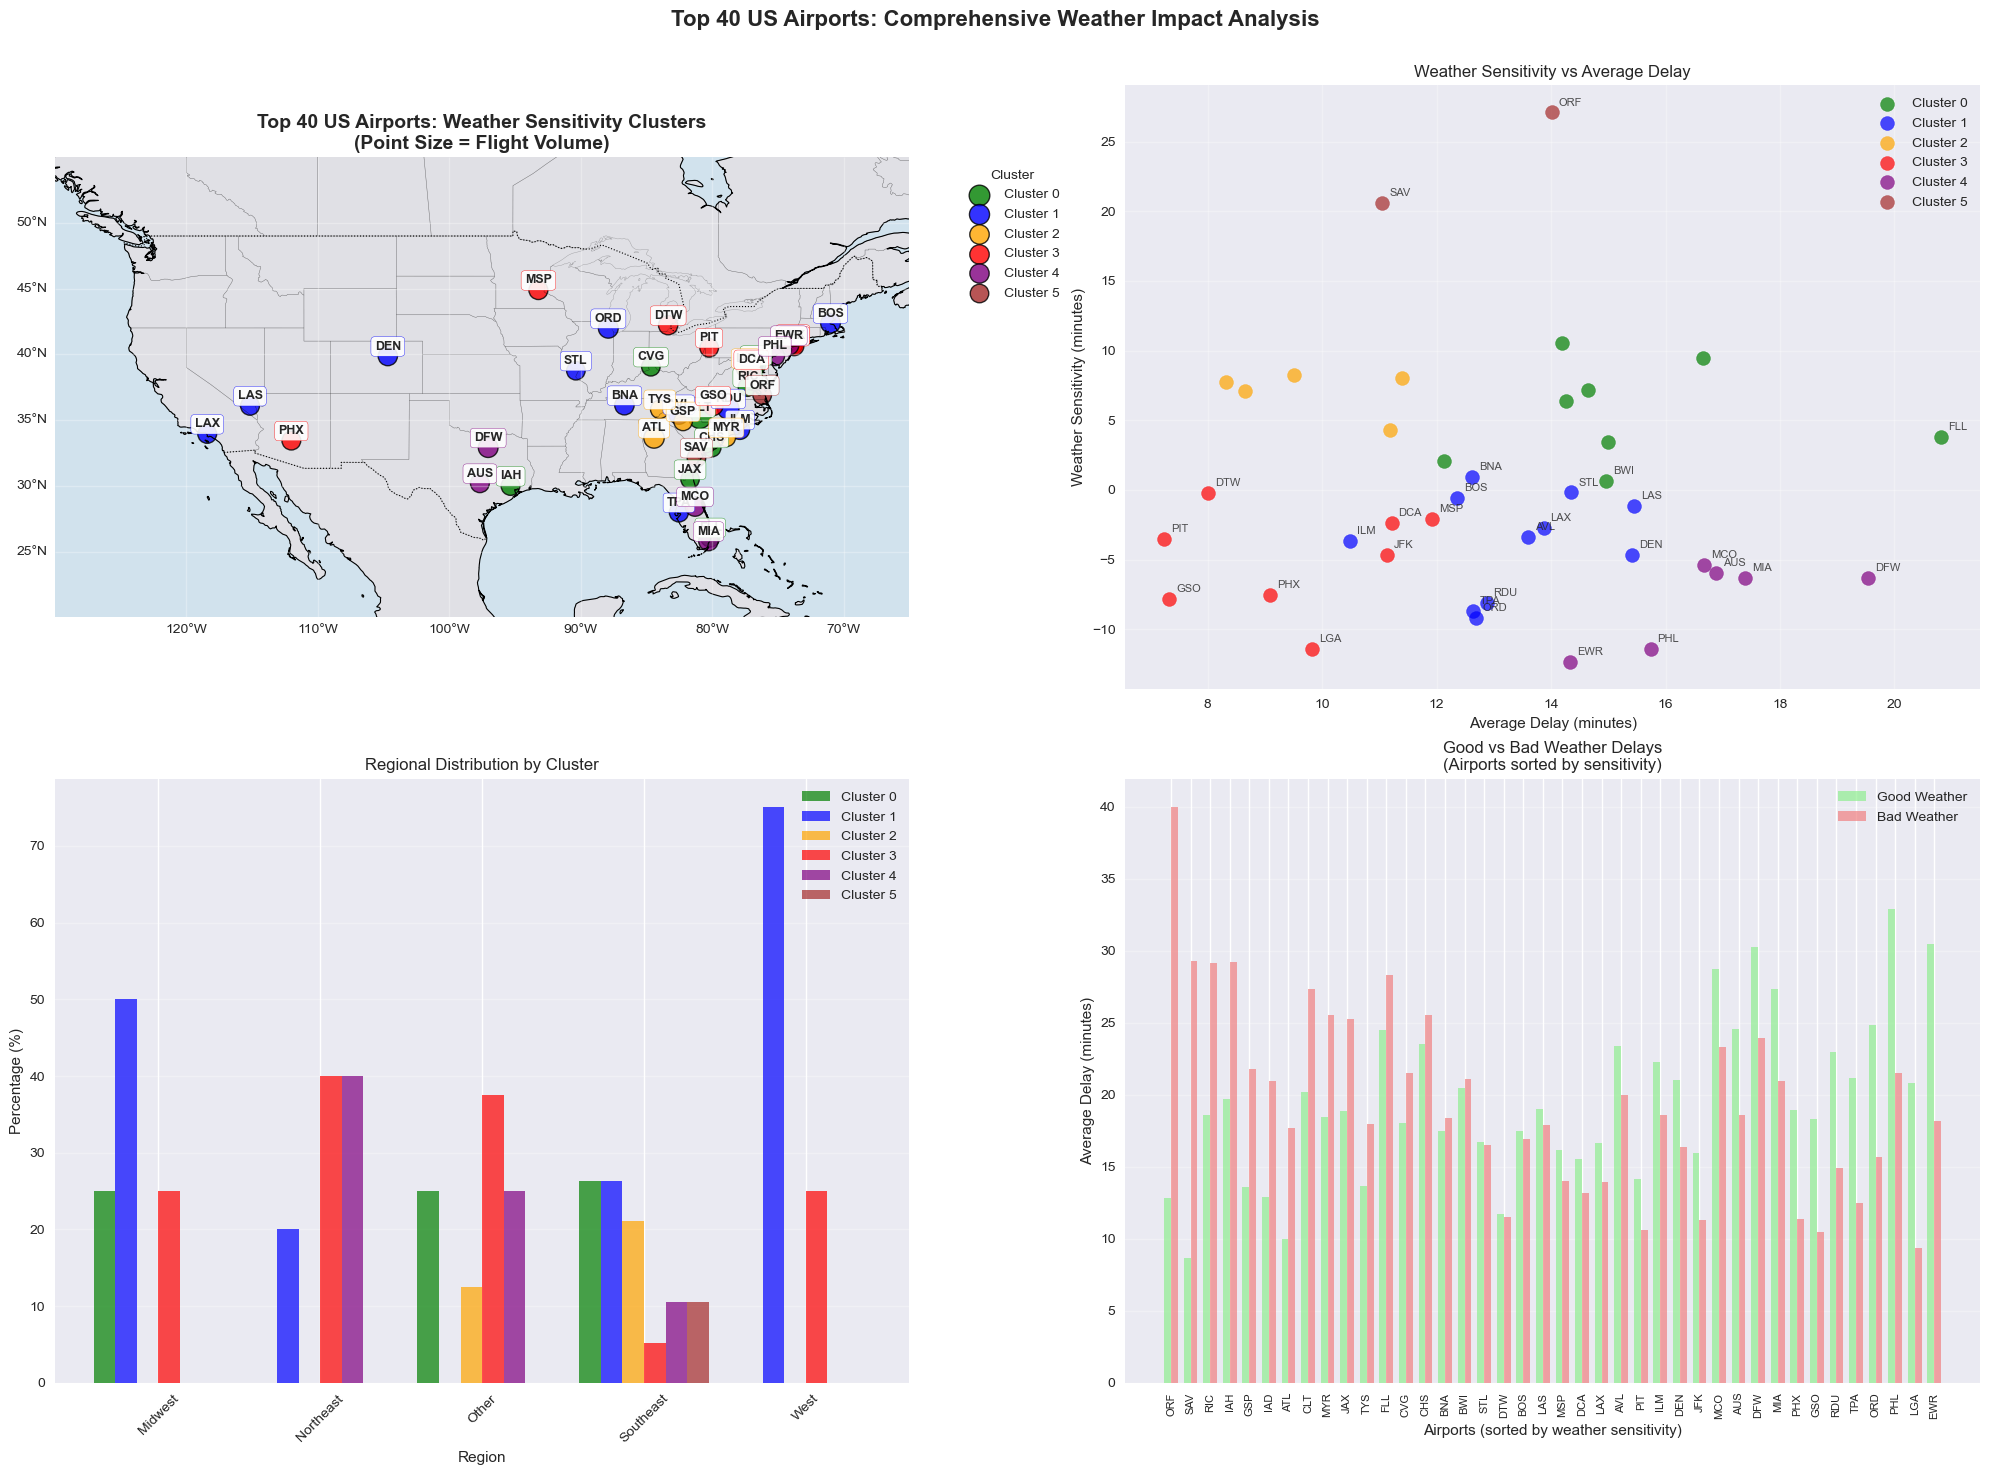


=== CLUSTER CHARACTERISTICS ===
Cluster 0: Weather Sensitive: Significant delay increase in bad weather
  - Avg Sensitivity: 5.4 min
  - Avg Delay: 15.3 min
  - Avg Cancellation Rate: 0.0%
  - Airports: CLT, FLL, BWI, IAH, RIC, CHS, CVG, JAX

Cluster 1: Moderate Performance: Some weather sensitivity, acceptable delays
  - Avg Sensitivity: -3.8 min
  - Avg Delay: 13.3 min
  - Avg Cancellation Rate: 0.0%
  - Airports: RDU, AVL, ORD, BOS, ILM, BNA, DEN, TPA, LAS, LAX, STL

Cluster 2: Moderate Performance: Some weather sensitivity, acceptable delays
  - Avg Sensitivity: 7.1 min
  - Avg Delay: 9.8 min
  - Avg Cancellation Rate: 0.0%
  - Airports: ATL, IAD, GSP, MYR, TYS

Cluster 3: High Performance: Low weather impact, minimal delays
  - Avg Sensitivity: -5.0 min
  - Avg Delay: 9.5 min
  - Avg Cancellation Rate: 0.0%
  - Airports: LGA, GSO, DCA, JFK, DTW, MSP, PHX, PIT

Cluster 4: Weather Sensitive: Significant delay increase in bad weather
  - Avg Sensitivity: -8.0 min
  - Avg Delay: 16.8

In [32]:
# Create comprehensive visualization for Top 40 airport clustering
print("=== CREATING COMPREHENSIVE VISUALIZATION ===")

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a color palette that can handle up to 8 clusters
cluster_colors_palette = ['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink', 'gray']

# Create the main visualization
fig = plt.figure(figsize=(20, 15))

# Main map
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-130, -65, 20, 55], crs=ccrs.PlateCarree())

# Add map features
ax1.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
ax1.add_feature(cfeature.STATES, linewidth=0.3, alpha=0.3)
ax1.add_feature(cfeature.LAND, color='lightgray', alpha=0.4)
ax1.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.4)

# Plot airports by cluster with size based on flight volume
for cluster in sorted(top_df['Cluster'].unique()):
    cluster_data = top_df[top_df['Cluster'] == cluster]
    sizes = np.log(cluster_data['Total_Flights']) * 20  # Scale for visibility
    
    # Use modulo to ensure we don't exceed color list bounds
    color_idx = cluster % len(cluster_colors_palette)
    
    ax1.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
               c=cluster_colors_palette[color_idx], s=sizes, alpha=0.8,
               label=f'Cluster {cluster}', 
               edgecolors='black', linewidth=1,
               transform=ccrs.PlateCarree())
    
    # Add airport labels
    for _, airport in cluster_data.iterrows():
        ax1.text(airport['Longitude'], airport['Latitude'] + 0.5, 
               airport['Airport'], fontsize=9, ha='center', fontweight='bold',
               transform=ccrs.PlateCarree(),
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", 
                        edgecolor=cluster_colors_palette[color_idx], alpha=0.9))

ax1.set_title('Top 40 US Airports: Weather Sensitivity Clusters\n(Point Size = Flight Volume)', 
             fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster')

# Add grid
gl = ax1.gridlines(draw_labels=True, alpha=0.3)
gl.top_labels = False
gl.right_labels = False

# Weather sensitivity vs average delay scatter plot
ax2 = plt.subplot(2, 2, 2)

for cluster in sorted(top_df['Cluster'].unique()):
    cluster_data = top_df[top_df['Cluster'] == cluster]
    color_idx = cluster % len(cluster_colors_palette)
    
    ax2.scatter(cluster_data['Avg_Delay'], cluster_data['Weather_Sensitivity'],
               c=cluster_colors_palette[color_idx], s=100, alpha=0.7,
               label=f'Cluster {cluster}')
    
    # Add airport labels for outliers
    for _, airport in cluster_data.iterrows():
        if (airport['Weather_Sensitivity'] > 15 or airport['Avg_Delay'] > 20 or 
            airport['Weather_Sensitivity'] < 2):
            ax2.annotate(airport['Airport'], 
                        (airport['Avg_Delay'], airport['Weather_Sensitivity']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8,
                        alpha=0.8)

ax2.set_xlabel('Average Delay (minutes)')
ax2.set_ylabel('Weather Sensitivity (minutes)')
ax2.set_title('Weather Sensitivity vs Average Delay')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Regional distribution by cluster
ax3 = plt.subplot(2, 2, 3)

region_cluster = pd.crosstab(top_df['Region'], top_df['Cluster'])
region_cluster_percent = region_cluster.div(region_cluster.sum(axis=1), axis=0) * 100

x = np.arange(len(region_cluster_percent))
width = 0.8 / len(top_df['Cluster'].unique())

for i, cluster in enumerate(sorted(top_df['Cluster'].unique())):
    color_idx = cluster % len(cluster_colors_palette)
    ax3.bar(x + i*width - width*(len(top_df['Cluster'].unique())-1)/2, 
           region_cluster_percent[cluster], 
           width, label=f'Cluster {cluster}', 
           color=cluster_colors_palette[color_idx], alpha=0.7)

ax3.set_xlabel('Region')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('Regional Distribution by Cluster')
ax3.set_xticks(x)
ax3.set_xticklabels(region_cluster_percent.index, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Performance comparison: Good vs Bad weather delays
ax4 = plt.subplot(2, 2, 4)

# Sort by weather sensitivity for better visualization
top_df_sorted = top_df.sort_values('Weather_Sensitivity', ascending=False)

x_pos = np.arange(len(top_df_sorted))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, top_df_sorted['Good_Weather_Delay'], width, 
               label='Good Weather', color='lightgreen', alpha=0.7)
bars2 = ax4.bar(x_pos + width/2, top_df_sorted['Bad_Weather_Delay'], width, 
               label='Bad Weather', color='lightcoral', alpha=0.7)

ax4.set_xlabel('Airports (sorted by weather sensitivity)')
ax4.set_ylabel('Average Delay (minutes)')
ax4.set_title('Good vs Bad Weather Delays\n(Airports sorted by sensitivity)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(top_df_sorted['Airport'], rotation=90, fontsize=8)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Top 40 US Airports: Comprehensive Weather Impact Analysis', 
            fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.93)
plt.show()

# Create cluster descriptions based on actual data
print("\n=== CLUSTER CHARACTERISTICS ===")
cluster_descriptions = {}
for cluster in sorted(top_df['Cluster'].unique()):
    cluster_data = top_df[top_df['Cluster'] == cluster]
    avg_sensitivity = cluster_data['Weather_Sensitivity'].mean()
    avg_delay = cluster_data['Avg_Delay'].mean()
    avg_cancellation = cluster_data['Cancellation_Rate'].mean()
    
    # Create descriptions based on actual performance
    if avg_sensitivity < 5 and avg_delay < 10:
        desc = "High Performance: Low weather impact, minimal delays"
    elif avg_sensitivity < 10 and avg_delay < 15:
        desc = "Moderate Performance: Some weather sensitivity, acceptable delays"
    elif avg_sensitivity < 15:
        desc = "Weather Sensitive: Significant delay increase in bad weather"
    else:
        desc = "Highly Vulnerable: Severe weather impact and delays"
    
    cluster_descriptions[cluster] = desc
    print(f"Cluster {cluster}: {desc}")
    print(f"  - Avg Sensitivity: {avg_sensitivity:.1f} min")
    print(f"  - Avg Delay: {avg_delay:.1f} min")
    print(f"  - Avg Cancellation Rate: {avg_cancellation:.1f}%")
    print(f"  - Airports: {', '.join(cluster_data['Airport'].tolist())}")
    print()

# Detailed cluster analysis table
print("\n=== DETAILED CLUSTER ANALYSIS ===")
cluster_summary = top_df.groupby('Cluster').agg({
    'Weather_Sensitivity': ['mean', 'std', 'min', 'max'],
    'Avg_Delay': ['mean', 'std'],
    'Cancellation_Rate': ['mean', 'std'],
    'Total_Flights': ['sum', 'mean'],
    'Airport': 'count'
}).round(2)

print("Cluster Summary Statistics:")
print(cluster_summary)

# Regional performance analysis
print("\n=== REGIONAL PERFORMANCE ANALYSIS ===")
regional_performance = top_df.groupby('Region').agg({
    'Weather_Sensitivity': 'mean',
    'Avg_Delay': 'mean',
    'Cancellation_Rate': 'mean',
    'Total_Flights': 'sum'
}).round(2)

print("Regional Performance Summary:")
print(regional_performance)

# Create a simple performance ranking table
print("\n=== AIRPORT PERFORMANCE RANKING ===")
performance_ranking = top_df[['Airport', 'Region', 'Cluster', 'Weather_Sensitivity', 
                             'Avg_Delay', 'Total_Flights']].copy()
performance_ranking['Performance_Score'] = (
    performance_ranking['Weather_Sensitivity'] + performance_ranking['Avg_Delay']
)
performance_ranking = performance_ranking.sort_values('Performance_Score')

print("Top 10 Best Performing Airports (Lowest Combined Sensitivity + Delay):")
print(performance_ranking.head(10).round(2))

print("\nTop 10 Worst Performing Airports (Highest Combined Sensitivity + Delay):")
print(performance_ranking.tail(10).round(2))

# Final insights
print("\n=== KEY INSIGHTS ===")
print("Based on the clustering analysis of Top 40 US airports:")

# Calculate overall statistics
avg_sensitivity = top_df['Weather_Sensitivity'].mean()
avg_delay = top_df['Avg_Delay'].mean()

print(f"1. Average weather sensitivity across all airports: {avg_sensitivity:.1f} minutes")
print(f"2. Average delay across all airports: {avg_delay:.1f} minutes")
print(f"3. Number of clusters identified: {len(top_df['Cluster'].unique())}")
print(f"4. Total flights analyzed: {top_df['Total_Flights'].sum():,}")

# Regional insights
most_sensitive_region = regional_performance['Weather_Sensitivity'].idxmax()
least_sensitive_region = regional_performance['Weather_Sensitivity'].idxmin()

print(f"5. Most weather-sensitive region: {most_sensitive_region}")
print(f"6. Least weather-sensitive region: {least_sensitive_region}")

# Cluster insights
largest_cluster = top_df['Cluster'].value_counts().idxmax()
print(f"7. Largest cluster: Cluster {largest_cluster} ({top_df['Cluster'].value_counts()[largest_cluster]} airports)")

# Additional analysis: Compare clusters
print("\n=== CLUSTER COMPARISON ===")
for i, cluster1 in enumerate(sorted(top_df['Cluster'].unique())):
    for cluster2 in sorted(top_df['Cluster'].unique())[i+1:]:
        if cluster1 != cluster2:
            cluster1_data = top_df[top_df['Cluster'] == cluster1]
            cluster2_data = top_df[top_df['Cluster'] == cluster2]
            
            sens_diff = cluster1_data['Weather_Sensitivity'].mean() - cluster2_data['Weather_Sensitivity'].mean()
            delay_diff = cluster1_data['Avg_Delay'].mean() - cluster2_data['Avg_Delay'].mean()
            
            print(f"Cluster {cluster1} vs Cluster {cluster2}:")
            print(f"  Sensitivity difference: {sens_diff:.1f} minutes")
            print(f"  Delay difference: {delay_diff:.1f} minutes")
            print()

print("\nThis analysis provides a comprehensive view of how weather impacts")
print("the busiest US airports, enabling better operational planning and")
print("resource allocation during adverse weather conditions.")

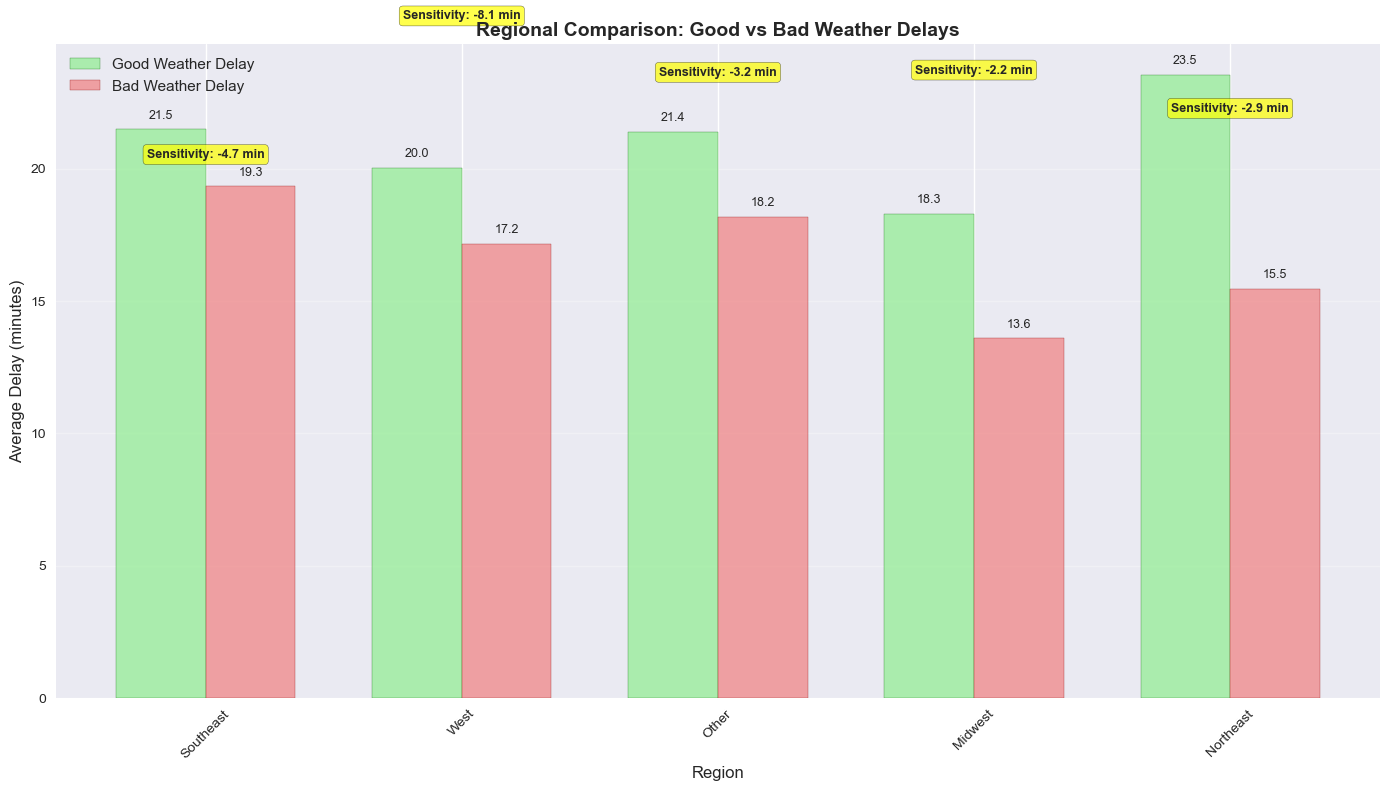


=== REGIONAL WEATHER IMPACT SUMMARY ===
      Region  Good_Weather_Delay  Bad_Weather_Delay  Weather_Sensitivity  \
3  Southeast               21.49              19.33                -2.16   
4       West               20.04              17.15                -2.89   
2      Other               21.40              18.18                -3.22   
0    Midwest               18.30              13.58                -4.71   
1  Northeast               23.53              15.45                -8.08   

   Total_Flights  
3         989035  
4          24861  
2          81866  
0          41056  
1         130161  

=== KEY REGIONAL INSIGHTS ===
Most weather-sensitive region: Southeast
  - Good weather delay: 21.5 min
  - Bad weather delay: 19.3 min
  - Sensitivity: -2.2 min

Least weather-sensitive region: Northeast
  - Good weather delay: 23.5 min
  - Bad weather delay: 15.5 min
  - Sensitivity: -8.1 min

Overall Improvement Potential:
  - Average good weather delay: 21.0 min
  - Average bad we

In [33]:
# Regional comparison: Good vs Bad weather delays
plt.figure(figsize=(14, 8))

# Group by region and calculate weighted averages
regional_performance = sensitivity_df.groupby('Region').agg({
    'Good_Weather_Delay': 'mean',
    'Bad_Weather_Delay': 'mean', 
    'Weather_Sensitivity': 'mean',
    'Total_Flights': 'sum'
}).reset_index()

# Sort by weather sensitivity for better visualization
regional_performance = regional_performance.sort_values('Weather_Sensitivity', ascending=False)

# Create the bar plot
x_pos = np.arange(len(regional_performance))
width = 0.35

bars1 = plt.bar(x_pos - width/2, regional_performance['Good_Weather_Delay'], width, 
               label='Good Weather Delay', color='lightgreen', alpha=0.7, edgecolor='darkgreen')
bars2 = plt.bar(x_pos + width/2, regional_performance['Bad_Weather_Delay'], width, 
               label='Bad Weather Delay', color='lightcoral', alpha=0.7, edgecolor='darkred')

# Customize the plot
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.title('Regional Comparison: Good vs Bad Weather Delays', fontsize=14, fontweight='bold')
plt.xticks(x_pos, regional_performance['Region'], rotation=45)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Add weather sensitivity values as text annotations
for i, row in regional_performance.iterrows():
    plt.text(x_pos[i], max(row['Good_Weather_Delay'], row['Bad_Weather_Delay']) + 2,
             f"Sensitivity: {row['Weather_Sensitivity']:.1f} min", 
             ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Print regional summary
print("\n=== REGIONAL WEATHER IMPACT SUMMARY ===")
print(regional_performance.round(2))

# Additional regional analysis
print("\n=== KEY REGIONAL INSIGHTS ===")
most_sensitive_region = regional_performance.loc[regional_performance['Weather_Sensitivity'].idxmax()]
least_sensitive_region = regional_performance.loc[regional_performance['Weather_Sensitivity'].idxmin()]

print(f"Most weather-sensitive region: {most_sensitive_region['Region']}")
print(f"  - Good weather delay: {most_sensitive_region['Good_Weather_Delay']:.1f} min")
print(f"  - Bad weather delay: {most_sensitive_region['Bad_Weather_Delay']:.1f} min")
print(f"  - Sensitivity: {most_sensitive_region['Weather_Sensitivity']:.1f} min")

print(f"\nLeast weather-sensitive region: {least_sensitive_region['Region']}")
print(f"  - Good weather delay: {least_sensitive_region['Good_Weather_Delay']:.1f} min")
print(f"  - Bad weather delay: {least_sensitive_region['Bad_Weather_Delay']:.1f} min")
print(f"  - Sensitivity: {least_sensitive_region['Weather_Sensitivity']:.1f} min")

# Calculate overall improvement potential
avg_good_delay = regional_performance['Good_Weather_Delay'].mean()
avg_bad_delay = regional_performance['Bad_Weather_Delay'].mean()
improvement_potential = avg_bad_delay - avg_good_delay

print(f"\nOverall Improvement Potential:")
print(f"  - Average good weather delay: {avg_good_delay:.1f} min")
print(f"  - Average bad weather delay: {avg_bad_delay:.1f} min")
print(f"  - Potential improvement: {improvement_potential:.1f} min ({improvement_potential/avg_bad_delay*100:.1f}%)")

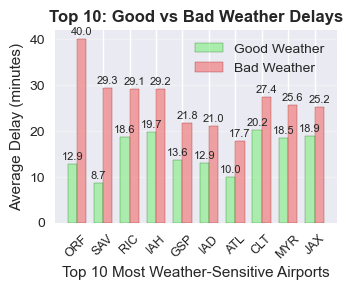


=== TOP 10 WEATHER-SENSITIVE AIRPORTS ===
   Airport     Region  Weather_Sensitivity  Good_Weather_Delay  \
34     ORF  Southeast                27.09               12.87   
32     SAV  Southeast                20.57                8.71   
31     RIC  Southeast                10.56               18.59   
28     IAH      Other                 9.47               19.73   
30     GSP  Southeast                 8.21               13.61   
26     IAD      Other                 8.06               12.93   
2      ATL  Southeast                 7.74                9.98   
0      CLT  Southeast                 7.17               20.20   
36     MYR  Southeast                 7.11               18.46   
38     JAX  Southeast                 6.35               18.89   

    Bad_Weather_Delay  Delay_Increase_Percent  
34              39.96                   210.5  
32              29.28                   236.3  
31              29.15                    56.8  
28              29.20                 

In [35]:
# Performance comparison: Top 10 airports - Good vs Bad weather delays
ax4 = plt.subplot(2, 2, 4)

# Get top 10 airports by weather sensitivity
top_10_airports = top_df.sort_values('Weather_Sensitivity', ascending=False).head(10)

x_pos = np.arange(len(top_10_airports))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, top_10_airports['Good_Weather_Delay'], width, 
               label='Good Weather', color='lightgreen', alpha=0.7, edgecolor='darkgreen')
bars2 = ax4.bar(x_pos + width/2, top_10_airports['Bad_Weather_Delay'], width, 
               label='Bad Weather', color='lightcoral', alpha=0.7, edgecolor='darkred')

ax4.set_xlabel('Top 10 Most Weather-Sensitive Airports', fontsize=11)
ax4.set_ylabel('Average Delay (minutes)', fontsize=11)
ax4.set_title('Top 10: Good vs Bad Weather Delays', fontsize=12, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(top_10_airports['Airport'], rotation=45, fontsize=9)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)


plt.show()

# Print details for top 10 weather-sensitive airports
print("\n=== TOP 10 WEATHER-SENSITIVE AIRPORTS ===")
top_10_summary = top_10_airports[['Airport', 'Region', 'Weather_Sensitivity', 
                                 'Good_Weather_Delay', 'Bad_Weather_Delay']].copy()
top_10_summary['Delay_Increase_Percent'] = (
    (top_10_summary['Bad_Weather_Delay'] - top_10_summary['Good_Weather_Delay']) / 
    top_10_summary['Good_Weather_Delay'] * 100
).round(1)

print(top_10_summary.round(2))

# Additional analysis for top 10
print("\n=== TOP 10 AIRPORTS ANALYSIS ===")
print(f"Average weather sensitivity: {top_10_airports['Weather_Sensitivity'].mean():.1f} minutes")
print(f"Average good weather delay: {top_10_airports['Good_Weather_Delay'].mean():.1f} minutes")
print(f"Average bad weather delay: {top_10_airports['Bad_Weather_Delay'].mean():.1f} minutes")
print(f"Average delay increase: {top_10_airports['Weather_Sensitivity'].mean():.1f} minutes")
print(f"Average percentage increase: {top_10_summary['Delay_Increase_Percent'].mean():.1f}%")

# Regional distribution in top 10
print(f"\nRegional distribution in top 10:")
print(top_10_airports['Region'].value_counts())